In [1]:
name = "Fluo-N2DL-HeLa"
data_dir = "./data"

import cellulus
from cellulus.utils.misc import extract_data
extract_data(
  zip_url="https://github.com/funkelab/cellulus/releases/download/v0.0.1-tag/Fluo-N2DL-HeLa.zip",
  data_dir=data_dir,
  project_name=name,
)

Directory already exists at the location ./data/Fluo-N2DL-HeLa


In [2]:
import numpy as np, zarr, tifffile, os
from tqdm import tqdm
from glob import glob
from csbdeep.utils import normalize

container_path = zarr.open(name+".zarr")
dataset_name = 'train/raw'
image_filenames = sorted(glob(os.path.join(data_dir, name, "images/*.tif")))[:10]
print(f"Number of raw images is {len(image_filenames)}")
image_list = []

for i in tqdm(range(len(image_filenames))):
  im = normalize(tifffile.imread(image_filenames[i]).astype(np.float32), pmin =1, pmax= 99.8, axis = (0,1))
  image_list.append(im[np.newaxis, ...])

image_list = np.asarray(image_list) # adds an extra 'batch ' dim
container_path[dataset_name] = image_list
container_path[dataset_name].attrs["resolution"] = (1, 1)
container_path[dataset_name].attrs["axis_names"] = ("s", "c", "y", "x")

Number of raw images is 10


  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 93.16it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 92.50it/s]

In [3]:
train_data_config = {'container_path': name+'.zarr',
                     'dataset_name': dataset_name
                    }

In [4]:
num_fmaps = 24
fmap_inc_factor = 3

model_config= {'num_fmaps': num_fmaps,
               'fmap_inc_factor': fmap_inc_factor,
               }

In [5]:
train_config = {'train_data_config': train_data_config,
                'max_iterations': 5_000,
                'save_model_every': 100,
                'device': 'mps'
               }

In [6]:
from cellulus.configs.experiment_config import ExperimentConfig
experiment_config = ExperimentConfig(model_config = model_config,
                                     train_config = train_config)

ExperimentConfig(model_config=ModelConfig(num_fmaps=24, fmap_inc_factor=3, features_in_last_layer=64, downsampling_factors=[[2, 2]], checkpoint=None, initialize=True), experiment_name='2023-10-12', object_size=26.0, train_config=TrainConfig(train_data_config=DatasetConfig(container_path=PosixPath('Fluo-N2DL-HeLa.zarr'), dataset_name='train/raw'), validate_data_config=None, crop_size=[252, 252], batch_size=8, max_iterations=5000, initial_learning_rate=4e-05, density=0.1, kappa=10.0, temperature=10.0, regularizer_weight=1e-05, reduce_mean=True, save_model_every=100, save_snapshot_every=1000, num_workers=8, control_point_spacing=64, control_point_jitter=2.0, device='mps'), inference_config=None)
Created logger with keys: ['train']


0it [00:00, ?it/s]

1it [00:02,  2.99s/it]

===> train loss: 0.900415
Checkpoint saved at iteration 0
Snapshot saved at iteration 0


2it [00:03,  1.34s/it]

===> train loss: 0.901705
===> train loss: 0.901849


3it [00:03,  1.23it/s]

4it [00:03,  1.76it/s]

===> train loss: 0.901957
===> train loss: 0.901187


5it [00:03,  2.32it/s]

6it [00:03,  2.86it/s]

===> train loss: 0.901329
===> train loss: 0.902299


7it [00:04,  3.35it/s]

8it [00:04,  3.85it/s]

===> train loss: 0.901291
===> train loss: 0.901728


9it [00:04,  4.22it/s]

10it [00:04,  4.53it/s]

===> train loss: 0.901873
===> train loss: 0.901878


11it [00:04,  4.76it/s]

12it [00:05,  4.98it/s]

===> train loss: 0.901971
===> train loss: 0.900978


13it [00:05,  5.13it/s]

14it [00:05,  5.21it/s]

===> train loss: 0.901330
===> train loss: 0.902110


15it [00:05,  5.28it/s]

16it [00:05,  5.32it/s]

===> train loss: 0.901652
===> train loss: 0.901381


17it [00:05,  5.33it/s]

18it [00:06,  5.35it/s]

===> train loss: 0.902047
===> train loss: 0.901678


19it [00:06,  5.36it/s]

20it [00:06,  5.38it/s]

===> train loss: 0.902122
===> train loss: 0.901764


21it [00:06,  5.31it/s]

22it [00:06,  5.31it/s]

===> train loss: 0.902205
===> train loss: 0.901219


23it [00:07,  5.31it/s]

24it [00:07,  5.36it/s]

===> train loss: 0.900778
===> train loss: 0.901275


25it [00:07,  5.45it/s]

26it [00:07,  5.48it/s]

===> train loss: 0.901731
===> train loss: 0.901435


27it [00:07,  5.46it/s]

28it [00:08,  5.25it/s]

===> train loss: 0.901890
===> train loss: 0.901784


29it [00:08,  5.30it/s]

30it [00:08,  5.33it/s]

===> train loss: 0.901208
===> train loss: 0.901683


31it [00:08,  5.34it/s]

32it [00:08,  5.34it/s]

===> train loss: 0.901786
===> train loss: 0.901921


33it [00:08,  5.35it/s]

34it [00:09,  5.35it/s]

===> train loss: 0.901234
===> train loss: 0.901449


35it [00:09,  5.33it/s]

36it [00:09,  5.35it/s]

===> train loss: 0.900858
===> train loss: 0.902963


37it [00:09,  5.37it/s]

38it [00:09,  5.39it/s]

===> train loss: 0.901795
===> train loss: 0.901786


39it [00:10,  5.42it/s]

40it [00:10,  5.42it/s]

===> train loss: 0.901628
===> train loss: 0.901591


41it [00:10,  5.49it/s]

42it [00:10,  5.61it/s]

===> train loss: 0.901821
===> train loss: 0.901551


43it [00:10,  5.66it/s]

44it [00:10,  5.72it/s]

===> train loss: 0.901724
===> train loss: 0.901672


45it [00:11,  5.72it/s]

46it [00:11,  5.78it/s]

===> train loss: 0.900810
===> train loss: 0.901429


47it [00:11,  5.72it/s]

48it [00:11,  5.69it/s]

===> train loss: 0.901619
===> train loss: 0.902465


49it [00:11,  5.73it/s]

50it [00:11,  5.78it/s]

===> train loss: 0.902145
===> train loss: 0.901141


51it [00:12,  5.75it/s]

52it [00:12,  5.73it/s]

===> train loss: 0.901828
===> train loss: 0.901622


53it [00:12,  5.69it/s]

54it [00:12,  5.71it/s]

===> train loss: 0.900610
===> train loss: 0.901060


55it [00:12,  5.73it/s]

56it [00:13,  5.75it/s]

===> train loss: 0.900715
===> train loss: 0.901322


57it [00:13,  5.75it/s]

58it [00:13,  5.63it/s]

===> train loss: 0.901322
===> train loss: 0.900722


59it [00:13,  5.59it/s]

60it [00:13,  5.61it/s]

===> train loss: 0.901229
===> train loss: 0.900813


61it [00:13,  5.64it/s]

62it [00:14,  5.59it/s]

===> train loss: 0.900972
===> train loss: 0.900711


63it [00:14,  5.54it/s]

64it [00:14,  5.51it/s]

===> train loss: 0.902322
===> train loss: 0.900795


65it [00:14,  5.53it/s]

66it [00:14,  5.54it/s]

===> train loss: 0.901069
===> train loss: 0.901734


67it [00:15,  5.52it/s]

68it [00:15,  5.49it/s]

===> train loss: 0.900434
===> train loss: 0.900307


69it [00:15,  5.48it/s]

70it [00:15,  5.51it/s]

===> train loss: 0.900677
===> train loss: 0.900735


71it [00:15,  5.54it/s]

72it [00:15,  5.48it/s]

===> train loss: 0.900127
===> train loss: 0.900815


73it [00:16,  5.47it/s]

74it [00:16,  5.46it/s]

===> train loss: 0.901685
===> train loss: 0.901380


75it [00:16,  5.43it/s]

76it [00:16,  5.42it/s]

===> train loss: 0.901108
===> train loss: 0.901336


77it [00:16,  5.41it/s]

78it [00:17,  5.37it/s]

===> train loss: 0.900551
===> train loss: 0.900738


79it [00:17,  5.37it/s]

80it [00:17,  5.40it/s]

===> train loss: 0.900508
===> train loss: 0.899598


81it [00:17,  5.36it/s]

82it [00:17,  5.37it/s]

===> train loss: 0.900788
===> train loss: 0.899798


83it [00:17,  5.40it/s]

84it [00:18,  5.45it/s]

===> train loss: 0.900764
===> train loss: 0.899848


85it [00:18,  5.41it/s]

86it [00:18,  5.44it/s]

===> train loss: 0.900635
===> train loss: 0.899804


87it [00:18,  5.42it/s]

88it [00:18,  5.46it/s]

===> train loss: 0.900013
===> train loss: 0.900157


89it [00:19,  5.47it/s]

90it [00:19,  5.55it/s]

===> train loss: 0.900140
===> train loss: 0.900206


91it [00:19,  5.59it/s]

92it [00:19,  5.56it/s]

===> train loss: 0.901857
===> train loss: 0.899915


93it [00:19,  5.54it/s]

94it [00:19,  5.49it/s]

===> train loss: 0.899922
===> train loss: 0.900699


95it [00:20,  5.46it/s]

96it [00:20,  4.85it/s]

===> train loss: 0.900739


97it [00:20,  4.93it/s]

===> train loss: 0.900966
===> train loss: 0.900429


98it [00:20,  5.07it/s]

99it [00:20,  5.22it/s]

===> train loss: 0.899795
===> train loss: 0.899904


100it [00:21,  5.29it/s]

101it [00:21,  4.99it/s]

===> train loss: 0.899642
Checkpoint saved at iteration 100


102it [00:21,  5.11it/s]

===> train loss: 0.899586
===> train loss: 0.900031


103it [00:21,  5.24it/s]

104it [00:21,  5.34it/s]

===> train loss: 0.900291
===> train loss: 0.900584


105it [00:22,  5.42it/s]

106it [00:22,  5.48it/s]

===> train loss: 0.899529
===> train loss: 0.899844


107it [00:22,  5.52it/s]

108it [00:22,  5.49it/s]

===> train loss: 0.899306
===> train loss: 0.900415


109it [00:22,  5.52it/s]

110it [00:22,  5.55it/s]

===> train loss: 0.899739
===> train loss: 0.900219


111it [00:23,  5.47it/s]

112it [00:23,  5.49it/s]

===> train loss: 0.900326
===> train loss: 0.899088


113it [00:23,  5.40it/s]

114it [00:23,  5.41it/s]

===> train loss: 0.900467
===> train loss: 0.899430


115it [00:23,  5.43it/s]

116it [00:24,  5.46it/s]

===> train loss: 0.899963
===> train loss: 0.900242


117it [00:24,  5.41it/s]

118it [00:24,  5.35it/s]

===> train loss: 0.898911
===> train loss: 0.899518


119it [00:24,  5.38it/s]

120it [00:24,  5.41it/s]

===> train loss: 0.899326
===> train loss: 0.899604


121it [00:25,  5.37it/s]

122it [00:25,  5.35it/s]

===> train loss: 0.899564
===> train loss: 0.900086


123it [00:25,  5.40it/s]

124it [00:25,  5.35it/s]

===> train loss: 0.901877
===> train loss: 0.900678


125it [00:25,  5.40it/s]

126it [00:25,  5.39it/s]

===> train loss: 0.901166
===> train loss: 0.899369


127it [00:26,  5.32it/s]

128it [00:26,  5.31it/s]

===> train loss: 0.899769
===> train loss: 0.899884


129it [00:26,  5.26it/s]

130it [00:26,  5.34it/s]

===> train loss: 0.899788
===> train loss: 0.899460


131it [00:26,  5.35it/s]

132it [00:27,  5.39it/s]

===> train loss: 0.898638
===> train loss: 0.898823


133it [00:27,  5.41it/s]

134it [00:27,  5.42it/s]

===> train loss: 0.900840
===> train loss: 0.899467


135it [00:27,  5.48it/s]

136it [00:27,  5.52it/s]

===> train loss: 0.898322
===> train loss: 0.899858


137it [00:27,  5.51it/s]

138it [00:28,  5.55it/s]

===> train loss: 0.897955
===> train loss: 0.897544


139it [00:28,  5.54it/s]

140it [00:28,  5.58it/s]

===> train loss: 0.899765
===> train loss: 0.899761


141it [00:28,  5.56it/s]

142it [00:28,  5.54it/s]

===> train loss: 0.900952
===> train loss: 0.900080


143it [00:29,  5.51it/s]

144it [00:29,  5.49it/s]

===> train loss: 0.900119
===> train loss: 0.898147


145it [00:29,  5.51it/s]

146it [00:29,  5.49it/s]

===> train loss: 0.899244
===> train loss: 0.898718


147it [00:29,  5.54it/s]

148it [00:29,  5.53it/s]

===> train loss: 0.899802
===> train loss: 0.898527


149it [00:30,  5.48it/s]

150it [00:30,  5.48it/s]

===> train loss: 0.899922
===> train loss: 0.897543


151it [00:30,  5.46it/s]

152it [00:30,  5.47it/s]

===> train loss: 0.899390
===> train loss: 0.897905


153it [00:30,  5.46it/s]

154it [00:31,  5.45it/s]

===> train loss: 0.897839
===> train loss: 0.897542


155it [00:31,  5.45it/s]

156it [00:31,  5.50it/s]

===> train loss: 0.898906
===> train loss: 0.897846


157it [00:31,  5.46it/s]

158it [00:31,  5.51it/s]

===> train loss: 0.898633
===> train loss: 0.899112


159it [00:31,  5.49it/s]

160it [00:32,  5.48it/s]

===> train loss: 0.898185
===> train loss: 0.896376


161it [00:32,  5.44it/s]

162it [00:32,  5.41it/s]

===> train loss: 0.898715
===> train loss: 0.898235


163it [00:32,  5.47it/s]

164it [00:32,  5.43it/s]

===> train loss: 0.897403
===> train loss: 0.896692


165it [00:33,  5.45it/s]

166it [00:33,  5.46it/s]

===> train loss: 0.898945
===> train loss: 0.897891


167it [00:33,  5.45it/s]

168it [00:33,  5.43it/s]

===> train loss: 0.898918
===> train loss: 0.895819


169it [00:33,  5.48it/s]

170it [00:34,  5.44it/s]

===> train loss: 0.897047
===> train loss: 0.897572


171it [00:34,  5.47it/s]

172it [00:34,  5.47it/s]

===> train loss: 0.894128
===> train loss: 0.897527


173it [00:34,  5.46it/s]

174it [00:34,  5.51it/s]

===> train loss: 0.898597
===> train loss: 0.897113


175it [00:34,  5.52it/s]

176it [00:35,  5.56it/s]

===> train loss: 0.898141
===> train loss: 0.897557


177it [00:35,  5.58it/s]

178it [00:35,  5.61it/s]

===> train loss: 0.897949
===> train loss: 0.896764


179it [00:35,  5.54it/s]

180it [00:35,  5.58it/s]

===> train loss: 0.899336
===> train loss: 0.896111


181it [00:35,  5.60it/s]

182it [00:36,  5.55it/s]

===> train loss: 0.896077
===> train loss: 0.896175


183it [00:36,  5.59it/s]

184it [00:36,  5.54it/s]

===> train loss: 0.896273
===> train loss: 0.895510


185it [00:36,  5.59it/s]

186it [00:36,  5.63it/s]

===> train loss: 0.896521
===> train loss: 0.897121


187it [00:37,  5.64it/s]

188it [00:37,  5.62it/s]

===> train loss: 0.893756
===> train loss: 0.894704


189it [00:37,  5.56it/s]

190it [00:37,  5.58it/s]

===> train loss: 0.896967
===> train loss: 0.895406


191it [00:37,  5.60it/s]

192it [00:37,  5.62it/s]

===> train loss: 0.893785
===> train loss: 0.896403


193it [00:38,  5.64it/s]

194it [00:38,  5.59it/s]

===> train loss: 0.894526
===> train loss: 0.895676


195it [00:38,  5.59it/s]

196it [00:38,  5.62it/s]

===> train loss: 0.893451
===> train loss: 0.895466


197it [00:38,  5.52it/s]

198it [00:39,  5.55it/s]

===> train loss: 0.895931
===> train loss: 0.894184


199it [00:39,  5.57it/s]

200it [00:39,  5.52it/s]

===> train loss: 0.893643
===> train loss: 0.891356


201it [00:39,  5.13it/s]

202it [00:39,  5.24it/s]

Checkpoint saved at iteration 200
===> train loss: 0.893782


203it [00:39,  5.34it/s]

===> train loss: 0.892482
===> train loss: 0.893203


204it [00:40,  5.39it/s]

205it [00:40,  5.39it/s]

===> train loss: 0.894254
===> train loss: 0.895477


206it [00:40,  5.35it/s]

207it [00:40,  5.33it/s]

===> train loss: 0.892087
===> train loss: 0.895924


208it [00:40,  5.39it/s]

209it [00:41,  5.37it/s]

===> train loss: 0.894593
===> train loss: 0.891602


210it [00:41,  5.03it/s]

211it [00:41,  5.18it/s]

===> train loss: 0.893533
===> train loss: 0.891215


212it [00:41,  5.26it/s]

213it [00:41,  5.35it/s]

===> train loss: 0.894046
===> train loss: 0.891242


214it [00:42,  5.37it/s]

215it [00:42,  5.43it/s]

===> train loss: 0.896600
===> train loss: 0.892348


216it [00:42,  5.43it/s]

217it [00:42,  5.49it/s]

===> train loss: 0.893227
===> train loss: 0.893422


218it [00:42,  5.47it/s]

219it [00:42,  5.48it/s]

===> train loss: 0.889621
===> train loss: 0.892214


220it [00:43,  5.46it/s]

221it [00:43,  5.46it/s]

===> train loss: 0.890906
===> train loss: 0.891616


222it [00:43,  5.48it/s]

223it [00:43,  5.55it/s]

===> train loss: 0.889769
===> train loss: 0.891294


224it [00:43,  5.56it/s]

225it [00:44,  5.57it/s]

===> train loss: 0.891176
===> train loss: 0.892813


226it [00:44,  5.54it/s]

227it [00:44,  5.52it/s]

===> train loss: 0.893068
===> train loss: 0.890137


228it [00:44,  5.54it/s]

229it [00:44,  5.54it/s]

===> train loss: 0.891099
===> train loss: 0.888423


230it [00:44,  5.58it/s]

231it [00:45,  5.54it/s]

===> train loss: 0.888488
===> train loss: 0.889441


232it [00:45,  5.50it/s]

233it [00:45,  5.49it/s]

===> train loss: 0.891066
===> train loss: 0.889709


234it [00:45,  5.47it/s]

235it [00:45,  5.47it/s]

===> train loss: 0.889487
===> train loss: 0.890610


236it [00:46,  5.47it/s]

237it [00:46,  5.55it/s]

===> train loss: 0.887626
===> train loss: 0.885030


238it [00:46,  5.50it/s]

239it [00:46,  5.56it/s]

===> train loss: 0.883819
===> train loss: 0.884195


240it [00:46,  5.47it/s]

241it [00:46,  5.52it/s]

===> train loss: 0.883987
===> train loss: 0.883338


242it [00:47,  5.45it/s]

243it [00:47,  5.43it/s]

===> train loss: 0.885450
===> train loss: 0.882051


244it [00:47,  5.48it/s]

245it [00:47,  5.50it/s]

===> train loss: 0.878612
===> train loss: 0.880520


246it [00:47,  5.51it/s]

247it [00:48,  5.55it/s]

===> train loss: 0.881751
===> train loss: 0.879645


248it [00:48,  5.54it/s]

249it [00:48,  5.55it/s]

===> train loss: 0.881018
===> train loss: 0.878460


250it [00:48,  5.55it/s]

251it [00:48,  5.57it/s]

===> train loss: 0.878109
===> train loss: 0.877256


252it [00:48,  5.55it/s]

253it [00:49,  5.50it/s]

===> train loss: 0.875250
===> train loss: 0.878379


254it [00:49,  5.48it/s]

255it [00:49,  5.47it/s]

===> train loss: 0.875752
===> train loss: 0.877833


256it [00:49,  5.46it/s]

257it [00:49,  5.52it/s]

===> train loss: 0.874270
===> train loss: 0.876179


258it [00:50,  5.59it/s]

259it [00:50,  5.64it/s]

===> train loss: 0.876462
===> train loss: 0.871833


260it [00:50,  5.64it/s]

261it [00:50,  5.62it/s]

===> train loss: 0.875128
===> train loss: 0.872924


262it [00:50,  5.68it/s]

263it [00:50,  5.70it/s]

===> train loss: 0.870882
===> train loss: 0.873110


264it [00:51,  5.60it/s]

265it [00:51,  5.59it/s]

===> train loss: 0.865840
===> train loss: 0.873274


266it [00:51,  5.58it/s]

267it [00:51,  5.59it/s]

===> train loss: 0.874935
===> train loss: 0.876035


268it [00:51,  5.61it/s]

269it [00:51,  5.62it/s]

===> train loss: 0.871991
===> train loss: 0.873366


270it [00:52,  5.62it/s]

271it [00:52,  5.62it/s]

===> train loss: 0.872528
===> train loss: 0.871311


272it [00:52,  5.56it/s]

273it [00:52,  5.60it/s]

===> train loss: 0.868714
===> train loss: 0.873464


274it [00:52,  5.56it/s]

275it [00:53,  5.52it/s]

===> train loss: 0.875600
===> train loss: 0.871960


276it [00:53,  5.55it/s]

277it [00:53,  5.59it/s]

===> train loss: 0.871218
===> train loss: 0.869678


278it [00:53,  5.55it/s]

279it [00:53,  5.54it/s]

===> train loss: 0.876275
===> train loss: 0.874243


280it [00:53,  5.51it/s]

281it [00:54,  5.52it/s]

===> train loss: 0.870680
===> train loss: 0.870150


282it [00:54,  5.42it/s]

283it [00:54,  5.47it/s]

===> train loss: 0.868680
===> train loss: 0.873633


284it [00:54,  5.52it/s]

285it [00:54,  5.58it/s]

===> train loss: 0.872423
===> train loss: 0.875659


286it [00:55,  5.57it/s]

287it [00:55,  5.52it/s]

===> train loss: 0.873575
===> train loss: 0.874323


288it [00:55,  5.50it/s]

289it [00:55,  5.50it/s]

===> train loss: 0.869380
===> train loss: 0.869367


290it [00:55,  5.48it/s]

291it [00:55,  5.46it/s]

===> train loss: 0.876838
===> train loss: 0.870356


292it [00:56,  5.43it/s]

293it [00:56,  5.40it/s]

===> train loss: 0.875327
===> train loss: 0.873917


294it [00:56,  5.46it/s]

295it [00:56,  5.49it/s]

===> train loss: 0.870510
===> train loss: 0.872400


296it [00:56,  5.51it/s]

297it [00:57,  5.53it/s]

===> train loss: 0.871332
===> train loss: 0.875322


298it [00:57,  5.54it/s]

299it [00:57,  5.55it/s]

===> train loss: 0.868500
===> train loss: 0.869414


300it [00:57,  5.54it/s]

301it [00:57,  5.08it/s]

===> train loss: 0.871215
Checkpoint saved at iteration 300


302it [00:58,  5.15it/s]

===> train loss: 0.869761
===> train loss: 0.866721


303it [00:58,  5.17it/s]

304it [00:58,  5.24it/s]

===> train loss: 0.875353
===> train loss: 0.872259


305it [00:58,  5.31it/s]

306it [00:58,  5.34it/s]

===> train loss: 0.866724
===> train loss: 0.865662


307it [00:58,  5.36it/s]

308it [00:59,  5.35it/s]

===> train loss: 0.867297
===> train loss: 0.874333


309it [00:59,  5.35it/s]

310it [00:59,  5.37it/s]

===> train loss: 0.869957
===> train loss: 0.871875


311it [00:59,  5.41it/s]

312it [00:59,  5.46it/s]

===> train loss: 0.873787
===> train loss: 0.869215


313it [01:00,  5.51it/s]

314it [01:00,  5.51it/s]

===> train loss: 0.865566
===> train loss: 0.872409


315it [01:00,  5.54it/s]

316it [01:00,  5.51it/s]

===> train loss: 0.870351
===> train loss: 0.873189


317it [01:00,  5.51it/s]

318it [01:00,  5.48it/s]

===> train loss: 0.870758
===> train loss: 0.870114


319it [01:01,  5.47it/s]

320it [01:01,  5.46it/s]

===> train loss: 0.871780
===> train loss: 0.871153


321it [01:01,  5.34it/s]

322it [01:01,  5.42it/s]

===> train loss: 0.873786
===> train loss: 0.872354


323it [01:01,  5.34it/s]

324it [01:02,  5.38it/s]

===> train loss: 0.867749
===> train loss: 0.867672


325it [01:02,  5.42it/s]

326it [01:02,  5.39it/s]

===> train loss: 0.869423
===> train loss: 0.871413


327it [01:02,  5.37it/s]

328it [01:02,  4.82it/s]

===> train loss: 0.870418


329it [01:03,  4.96it/s]

===> train loss: 0.866538
===> train loss: 0.869421


330it [01:03,  5.08it/s]

331it [01:03,  5.20it/s]

===> train loss: 0.868332
===> train loss: 0.868310


332it [01:03,  5.23it/s]

333it [01:03,  5.34it/s]

===> train loss: 0.869288
===> train loss: 0.866844


334it [01:03,  5.41it/s]

335it [01:04,  5.44it/s]

===> train loss: 0.870301
===> train loss: 0.868652


336it [01:04,  5.40it/s]

337it [01:04,  5.42it/s]

===> train loss: 0.870868
===> train loss: 0.868330


338it [01:04,  5.42it/s]

339it [01:04,  5.43it/s]

===> train loss: 0.867201
===> train loss: 0.869883


340it [01:05,  5.45it/s]

341it [01:05,  5.43it/s]

===> train loss: 0.870780
===> train loss: 0.870474


342it [01:05,  5.46it/s]

343it [01:05,  5.49it/s]

===> train loss: 0.869914
===> train loss: 0.867268


344it [01:05,  5.47it/s]

345it [01:06,  5.50it/s]

===> train loss: 0.866055
===> train loss: 0.871744


346it [01:06,  5.47it/s]

347it [01:06,  5.49it/s]

===> train loss: 0.867826
===> train loss: 0.871540


348it [01:06,  5.48it/s]

349it [01:06,  5.45it/s]

===> train loss: 0.862839
===> train loss: 0.871005


350it [01:06,  5.46it/s]

351it [01:07,  5.48it/s]

===> train loss: 0.871996
===> train loss: 0.867905


352it [01:07,  5.49it/s]

353it [01:07,  5.37it/s]

===> train loss: 0.866318
===> train loss: 0.866029


354it [01:07,  5.41it/s]

355it [01:07,  5.44it/s]

===> train loss: 0.866571
===> train loss: 0.866928


356it [01:08,  5.42it/s]

357it [01:08,  5.45it/s]

===> train loss: 0.865934
===> train loss: 0.864173


358it [01:08,  5.45it/s]

359it [01:08,  5.46it/s]

===> train loss: 0.869662
===> train loss: 0.870469


360it [01:08,  5.48it/s]

361it [01:08,  5.47it/s]

===> train loss: 0.871898
===> train loss: 0.869812


362it [01:09,  5.40it/s]

363it [01:09,  5.45it/s]

===> train loss: 0.868777
===> train loss: 0.865777


364it [01:09,  5.45it/s]

365it [01:09,  5.45it/s]

===> train loss: 0.861974
===> train loss: 0.863225


366it [01:09,  5.45it/s]

367it [01:10,  5.50it/s]

===> train loss: 0.866255
===> train loss: 0.864274


368it [01:10,  5.53it/s]

369it [01:10,  5.51it/s]

===> train loss: 0.863481
===> train loss: 0.864609


370it [01:10,  5.54it/s]

371it [01:10,  5.52it/s]

===> train loss: 0.868546
===> train loss: 0.868773


372it [01:10,  5.52it/s]

373it [01:11,  5.54it/s]

===> train loss: 0.868449
===> train loss: 0.867802


374it [01:11,  5.51it/s]

375it [01:11,  5.50it/s]

===> train loss: 0.866381
===> train loss: 0.870385


376it [01:11,  5.48it/s]

377it [01:11,  5.49it/s]

===> train loss: 0.868282
===> train loss: 0.860646


378it [01:12,  5.48it/s]

379it [01:12,  5.48it/s]

===> train loss: 0.865801
===> train loss: 0.867286


380it [01:12,  5.49it/s]

381it [01:12,  5.51it/s]

===> train loss: 0.865474
===> train loss: 0.870406


382it [01:12,  5.48it/s]

383it [01:12,  5.49it/s]

===> train loss: 0.861494
===> train loss: 0.864261


384it [01:13,  5.46it/s]

385it [01:13,  5.48it/s]

===> train loss: 0.863943
===> train loss: 0.863511


386it [01:13,  5.48it/s]

387it [01:13,  5.46it/s]

===> train loss: 0.868800
===> train loss: 0.867856


388it [01:13,  5.48it/s]

389it [01:14,  5.46it/s]

===> train loss: 0.864524
===> train loss: 0.863565


390it [01:14,  5.45it/s]

391it [01:14,  5.45it/s]

===> train loss: 0.863120
===> train loss: 0.860517


392it [01:14,  5.44it/s]

393it [01:14,  5.43it/s]

===> train loss: 0.867283
===> train loss: 0.866933


394it [01:14,  5.45it/s]

395it [01:15,  5.47it/s]

===> train loss: 0.865593
===> train loss: 0.864585


396it [01:15,  5.48it/s]

397it [01:15,  5.46it/s]

===> train loss: 0.860335
===> train loss: 0.862684


398it [01:15,  5.45it/s]

399it [01:15,  5.44it/s]

===> train loss: 0.867294
===> train loss: 0.862098


400it [01:16,  5.42it/s]

401it [01:16,  5.11it/s]

===> train loss: 0.863338
Checkpoint saved at iteration 400


402it [01:16,  5.25it/s]

===> train loss: 0.863617
===> train loss: 0.862822


403it [01:16,  5.28it/s]

404it [01:16,  5.34it/s]

===> train loss: 0.862391
===> train loss: 0.867106


405it [01:17,  5.36it/s]

406it [01:17,  5.37it/s]

===> train loss: 0.865882
===> train loss: 0.864738


407it [01:17,  5.40it/s]

408it [01:17,  5.40it/s]

===> train loss: 0.865901
===> train loss: 0.866688


409it [01:17,  5.47it/s]

410it [01:17,  5.45it/s]

===> train loss: 0.866584
===> train loss: 0.865732


411it [01:18,  5.48it/s]

412it [01:18,  5.52it/s]

===> train loss: 0.859840
===> train loss: 0.867043


413it [01:18,  5.53it/s]

414it [01:18,  5.52it/s]

===> train loss: 0.862396
===> train loss: 0.862857


415it [01:18,  5.56it/s]

416it [01:19,  5.55it/s]

===> train loss: 0.863093
===> train loss: 0.860399


417it [01:19,  5.56it/s]

418it [01:19,  5.57it/s]

===> train loss: 0.860696
===> train loss: 0.861365


419it [01:19,  5.59it/s]

420it [01:19,  5.69it/s]

===> train loss: 0.861388
===> train loss: 0.858344


421it [01:19,  5.72it/s]

422it [01:20,  5.71it/s]

===> train loss: 0.863427
===> train loss: 0.857169


423it [01:20,  5.64it/s]

424it [01:20,  5.16it/s]

===> train loss: 0.861849


425it [01:20,  5.30it/s]

===> train loss: 0.866135
===> train loss: 0.861314


426it [01:20,  5.36it/s]

427it [01:21,  5.49it/s]

===> train loss: 0.858560
===> train loss: 0.863791


428it [01:21,  5.54it/s]

429it [01:21,  5.56it/s]

===> train loss: 0.862535
===> train loss: 0.861959


430it [01:21,  5.56it/s]

431it [01:21,  5.56it/s]

===> train loss: 0.859313
===> train loss: 0.863024


432it [01:21,  5.54it/s]

433it [01:22,  5.55it/s]

===> train loss: 0.857402
===> train loss: 0.857506


434it [01:22,  5.65it/s]

435it [01:22,  5.67it/s]

===> train loss: 0.861447
===> train loss: 0.859209


436it [01:22,  5.70it/s]

437it [01:22,  5.67it/s]

===> train loss: 0.863059
===> train loss: 0.858407


438it [01:22,  5.63it/s]

439it [01:23,  5.63it/s]

===> train loss: 0.863195
===> train loss: 0.857575


440it [01:23,  5.58it/s]

441it [01:23,  5.58it/s]

===> train loss: 0.856088
===> train loss: 0.859598


442it [01:23,  5.59it/s]

443it [01:23,  5.62it/s]

===> train loss: 0.855513
===> train loss: 0.854873


444it [01:24,  5.61it/s]

445it [01:24,  5.62it/s]

===> train loss: 0.861123
===> train loss: 0.859252


446it [01:24,  5.63it/s]

447it [01:24,  5.60it/s]

===> train loss: 0.861454
===> train loss: 0.853832


448it [01:24,  5.65it/s]

449it [01:24,  5.71it/s]

===> train loss: 0.865031
===> train loss: 0.858970


450it [01:25,  5.71it/s]

451it [01:25,  5.75it/s]

===> train loss: 0.861228
===> train loss: 0.860173


452it [01:25,  5.72it/s]

453it [01:25,  5.71it/s]

===> train loss: 0.857592
===> train loss: 0.857728


454it [01:25,  5.75it/s]

455it [01:25,  5.70it/s]

===> train loss: 0.857500
===> train loss: 0.860257


456it [01:26,  5.67it/s]

457it [01:26,  5.64it/s]

===> train loss: 0.861896
===> train loss: 0.856791


458it [01:26,  5.65it/s]

459it [01:26,  5.67it/s]

===> train loss: 0.856593
===> train loss: 0.857945


460it [01:26,  5.65it/s]

461it [01:27,  5.63it/s]

===> train loss: 0.856349
===> train loss: 0.857426


462it [01:27,  5.63it/s]

463it [01:27,  5.59it/s]

===> train loss: 0.856726
===> train loss: 0.854785


464it [01:27,  5.56it/s]

465it [01:27,  5.63it/s]

===> train loss: 0.855041
===> train loss: 0.855162


466it [01:27,  5.69it/s]

467it [01:28,  5.64it/s]

===> train loss: 0.854380
===> train loss: 0.857055


468it [01:28,  5.72it/s]

469it [01:28,  5.67it/s]

===> train loss: 0.853347
===> train loss: 0.855974


470it [01:28,  5.66it/s]

471it [01:28,  5.66it/s]

===> train loss: 0.857134
===> train loss: 0.861154


472it [01:28,  5.61it/s]

473it [01:29,  5.58it/s]

===> train loss: 0.856566
===> train loss: 0.857099


474it [01:29,  5.59it/s]

475it [01:29,  5.57it/s]

===> train loss: 0.852548
===> train loss: 0.856274


476it [01:29,  5.61it/s]

477it [01:29,  5.64it/s]

===> train loss: 0.857802
===> train loss: 0.856968


478it [01:30,  5.58it/s]

479it [01:30,  5.63it/s]

===> train loss: 0.857073
===> train loss: 0.853033


480it [01:30,  5.62it/s]

481it [01:30,  5.61it/s]

===> train loss: 0.855600
===> train loss: 0.855557


482it [01:30,  5.63it/s]

483it [01:30,  5.63it/s]

===> train loss: 0.852540
===> train loss: 0.854327


484it [01:31,  5.60it/s]

485it [01:31,  5.60it/s]

===> train loss: 0.854193
===> train loss: 0.847809


486it [01:31,  5.56it/s]

487it [01:31,  5.53it/s]

===> train loss: 0.857245
===> train loss: 0.853397


488it [01:31,  5.50it/s]

489it [01:32,  5.49it/s]

===> train loss: 0.854393
===> train loss: 0.855512


490it [01:32,  5.48it/s]

491it [01:32,  5.49it/s]

===> train loss: 0.848542
===> train loss: 0.855789


492it [01:32,  5.50it/s]

493it [01:32,  5.53it/s]

===> train loss: 0.856094
===> train loss: 0.852452


494it [01:32,  5.51it/s]

495it [01:33,  5.49it/s]

===> train loss: 0.854272
===> train loss: 0.846941


496it [01:33,  5.48it/s]

497it [01:33,  5.49it/s]

===> train loss: 0.855451
===> train loss: 0.848200


498it [01:33,  5.48it/s]

499it [01:33,  5.48it/s]

===> train loss: 0.855082
===> train loss: 0.851015


500it [01:34,  5.52it/s]

501it [01:34,  5.13it/s]

===> train loss: 0.852248
Checkpoint saved at iteration 500


502it [01:34,  5.29it/s]

===> train loss: 0.849519
===> train loss: 0.852702


503it [01:34,  5.34it/s]

504it [01:34,  5.37it/s]

===> train loss: 0.848543
===> train loss: 0.845006


505it [01:34,  5.42it/s]

506it [01:35,  5.44it/s]

===> train loss: 0.851838
===> train loss: 0.853438


507it [01:35,  5.43it/s]

508it [01:35,  5.47it/s]

===> train loss: 0.849877
===> train loss: 0.847707


509it [01:35,  5.50it/s]

510it [01:35,  5.49it/s]

===> train loss: 0.849338
===> train loss: 0.846611


511it [01:36,  5.48it/s]

512it [01:36,  5.47it/s]

===> train loss: 0.850422
===> train loss: 0.850784


513it [01:36,  5.47it/s]

514it [01:36,  5.47it/s]

===> train loss: 0.850772
===> train loss: 0.847384


515it [01:36,  5.47it/s]

516it [01:36,  5.49it/s]

===> train loss: 0.851598
===> train loss: 0.844877


517it [01:37,  5.46it/s]

518it [01:37,  5.46it/s]

===> train loss: 0.850420
===> train loss: 0.848538


519it [01:37,  5.45it/s]

520it [01:37,  5.43it/s]

===> train loss: 0.847447
===> train loss: 0.852357


521it [01:37,  5.44it/s]

522it [01:38,  5.46it/s]

===> train loss: 0.848863
===> train loss: 0.849641


523it [01:38,  5.45it/s]

524it [01:38,  5.47it/s]

===> train loss: 0.847322
===> train loss: 0.842537


525it [01:38,  5.45it/s]

526it [01:38,  5.43it/s]

===> train loss: 0.851967
===> train loss: 0.847455


527it [01:39,  5.42it/s]

528it [01:39,  5.44it/s]

===> train loss: 0.848854
===> train loss: 0.849622


529it [01:39,  5.45it/s]

530it [01:39,  5.47it/s]

===> train loss: 0.843590
===> train loss: 0.843711


531it [01:39,  5.53it/s]

532it [01:39,  5.53it/s]

===> train loss: 0.842900
===> train loss: 0.856042


533it [01:40,  5.50it/s]

534it [01:40,  5.48it/s]

===> train loss: 0.847461
===> train loss: 0.848017


535it [01:40,  5.47it/s]

536it [01:40,  5.46it/s]

===> train loss: 0.844761
===> train loss: 0.843233


537it [01:40,  5.46it/s]

538it [01:41,  5.48it/s]

===> train loss: 0.840183
===> train loss: 0.845153


539it [01:41,  5.45it/s]

540it [01:41,  5.48it/s]

===> train loss: 0.843456
===> train loss: 0.844823


541it [01:41,  5.46it/s]

542it [01:41,  5.52it/s]

===> train loss: 0.848210
===> train loss: 0.845941


543it [01:41,  5.57it/s]

544it [01:42,  5.53it/s]

===> train loss: 0.842634
===> train loss: 0.843861


545it [01:42,  5.51it/s]

546it [01:42,  5.50it/s]

===> train loss: 0.848141
===> train loss: 0.847394


547it [01:42,  5.49it/s]

548it [01:42,  5.48it/s]

===> train loss: 0.844111
===> train loss: 0.843119


549it [01:43,  5.47it/s]

550it [01:43,  5.46it/s]

===> train loss: 0.842238
===> train loss: 0.839973


551it [01:43,  5.46it/s]

552it [01:43,  5.45it/s]

===> train loss: 0.841419
===> train loss: 0.839203


553it [01:43,  5.51it/s]

554it [01:43,  5.57it/s]

===> train loss: 0.841542
===> train loss: 0.838200


555it [01:44,  5.56it/s]

556it [01:44,  5.54it/s]

===> train loss: 0.840635
===> train loss: 0.844351


557it [01:44,  5.50it/s]

558it [01:44,  5.48it/s]

===> train loss: 0.837985
===> train loss: 0.840512


559it [01:44,  5.47it/s]

560it [01:45,  5.47it/s]

===> train loss: 0.842466
===> train loss: 0.841464


561it [01:45,  5.46it/s]

562it [01:45,  5.47it/s]

===> train loss: 0.844082
===> train loss: 0.843115


563it [01:45,  5.46it/s]

564it [01:45,  5.54it/s]

===> train loss: 0.838883
===> train loss: 0.837793


565it [01:45,  5.59it/s]

566it [01:46,  5.56it/s]

===> train loss: 0.834802
===> train loss: 0.835992


567it [01:46,  5.52it/s]

568it [01:46,  5.56it/s]

===> train loss: 0.836040
===> train loss: 0.838582


569it [01:46,  5.55it/s]

570it [01:46,  5.53it/s]

===> train loss: 0.836332
===> train loss: 0.838640


571it [01:47,  5.50it/s]

572it [01:47,  5.50it/s]

===> train loss: 0.834450
===> train loss: 0.838635


573it [01:47,  5.46it/s]

574it [01:47,  5.46it/s]

===> train loss: 0.838236
===> train loss: 0.835642


575it [01:47,  5.44it/s]

576it [01:47,  5.51it/s]

===> train loss: 0.844176
===> train loss: 0.838302


577it [01:48,  5.50it/s]

578it [01:48,  5.49it/s]

===> train loss: 0.834197
===> train loss: 0.833427


579it [01:48,  5.52it/s]

580it [01:48,  5.49it/s]

===> train loss: 0.839851
===> train loss: 0.841053


581it [01:48,  5.45it/s]

582it [01:49,  5.45it/s]

===> train loss: 0.837817
===> train loss: 0.834108


583it [01:49,  5.43it/s]

584it [01:49,  5.38it/s]

===> train loss: 0.837020
===> train loss: 0.837126


585it [01:49,  5.38it/s]

586it [01:49,  5.39it/s]

===> train loss: 0.836988
===> train loss: 0.838331


587it [01:49,  5.37it/s]

588it [01:50,  5.41it/s]

===> train loss: 0.842745
===> train loss: 0.829442


589it [01:50,  5.40it/s]

590it [01:50,  4.96it/s]

===> train loss: 0.833680


591it [01:50,  5.09it/s]

===> train loss: 0.838318
===> train loss: 0.839398


592it [01:50,  5.18it/s]

593it [01:51,  5.23it/s]

===> train loss: 0.835349
===> train loss: 0.826750


594it [01:51,  5.27it/s]

595it [01:51,  5.33it/s]

===> train loss: 0.831182
===> train loss: 0.842630


596it [01:51,  5.37it/s]

597it [01:51,  5.43it/s]

===> train loss: 0.835500
===> train loss: 0.835938


598it [01:52,  5.40it/s]

599it [01:52,  5.41it/s]

===> train loss: 0.840382
===> train loss: 0.832350


600it [01:52,  5.40it/s]

601it [01:52,  5.03it/s]

===> train loss: 0.844984
Checkpoint saved at iteration 600


602it [01:52,  5.16it/s]

===> train loss: 0.836980
===> train loss: 0.833032


603it [01:53,  5.26it/s]

604it [01:53,  5.31it/s]

===> train loss: 0.833615
===> train loss: 0.834149


605it [01:53,  5.32it/s]

606it [01:53,  5.32it/s]

===> train loss: 0.836195
===> train loss: 0.836463


607it [01:53,  5.41it/s]

608it [01:53,  5.42it/s]

===> train loss: 0.839751
===> train loss: 0.833615


609it [01:54,  5.40it/s]

610it [01:54,  5.38it/s]

===> train loss: 0.832398
===> train loss: 0.832855


611it [01:54,  5.34it/s]

612it [01:54,  5.37it/s]

===> train loss: 0.837030
===> train loss: 0.838097


613it [01:54,  5.33it/s]

614it [01:55,  5.33it/s]

===> train loss: 0.834677
===> train loss: 0.831802


615it [01:55,  5.39it/s]

616it [01:55,  5.44it/s]

===> train loss: 0.837972
===> train loss: 0.835042


617it [01:55,  5.42it/s]

618it [01:55,  5.43it/s]

===> train loss: 0.831389
===> train loss: 0.841494


619it [01:55,  5.43it/s]

620it [01:56,  5.41it/s]

===> train loss: 0.837498
===> train loss: 0.833545


621it [01:56,  5.38it/s]

622it [01:56,  5.44it/s]

===> train loss: 0.827908
===> train loss: 0.830238


623it [01:56,  5.41it/s]

624it [01:56,  5.40it/s]

===> train loss: 0.836882
===> train loss: 0.835513


625it [01:57,  5.38it/s]

626it [01:57,  5.39it/s]

===> train loss: 0.827695
===> train loss: 0.832410


627it [01:57,  5.45it/s]

628it [01:57,  5.44it/s]

===> train loss: 0.827209
===> train loss: 0.829948


629it [01:57,  5.42it/s]

630it [01:57,  5.46it/s]

===> train loss: 0.829382
===> train loss: 0.833460


631it [01:58,  5.42it/s]

632it [01:58,  5.36it/s]

===> train loss: 0.832923
===> train loss: 0.837876


633it [01:58,  5.41it/s]

634it [01:58,  5.48it/s]

===> train loss: 0.835277
===> train loss: 0.833985


635it [01:58,  5.46it/s]

636it [01:59,  5.48it/s]

===> train loss: 0.828059
===> train loss: 0.828198


637it [01:59,  5.45it/s]

638it [01:59,  5.41it/s]

===> train loss: 0.829177
===> train loss: 0.823141


639it [01:59,  5.38it/s]

640it [01:59,  5.35it/s]

===> train loss: 0.833260
===> train loss: 0.831382


641it [02:00,  5.36it/s]

642it [02:00,  5.35it/s]

===> train loss: 0.834557
===> train loss: 0.833360


643it [02:00,  5.40it/s]

644it [02:00,  5.45it/s]

===> train loss: 0.833023
===> train loss: 0.830160


645it [02:00,  5.45it/s]

646it [02:00,  5.40it/s]

===> train loss: 0.826736
===> train loss: 0.828791


647it [02:01,  5.38it/s]

648it [02:01,  5.34it/s]

===> train loss: 0.831891
===> train loss: 0.830410


649it [02:01,  5.33it/s]

650it [02:01,  5.34it/s]

===> train loss: 0.831150
===> train loss: 0.829376


651it [02:01,  5.31it/s]

652it [02:02,  5.32it/s]

===> train loss: 0.831090
===> train loss: 0.824033


653it [02:02,  5.32it/s]

654it [02:02,  5.35it/s]

===> train loss: 0.827891
===> train loss: 0.832555


655it [02:02,  5.31it/s]

656it [02:02,  5.30it/s]

===> train loss: 0.831687
===> train loss: 0.834741


657it [02:03,  5.33it/s]

658it [02:03,  5.32it/s]

===> train loss: 0.828337
===> train loss: 0.836439


659it [02:03,  5.34it/s]

660it [02:03,  5.35it/s]

===> train loss: 0.830476
===> train loss: 0.836513


661it [02:03,  5.42it/s]

662it [02:03,  5.45it/s]

===> train loss: 0.827689
===> train loss: 0.829463


663it [02:04,  5.40it/s]

664it [02:04,  5.34it/s]

===> train loss: 0.831861
===> train loss: 0.830138


665it [02:04,  5.29it/s]

666it [02:04,  5.30it/s]

===> train loss: 0.826525
===> train loss: 0.830183


667it [02:04,  5.29it/s]

668it [02:05,  5.32it/s]

===> train loss: 0.830826
===> train loss: 0.827470


669it [02:05,  5.34it/s]

670it [02:05,  5.32it/s]

===> train loss: 0.832694
===> train loss: 0.834565


671it [02:05,  5.27it/s]

672it [02:05,  5.27it/s]

===> train loss: 0.822560
===> train loss: 0.827798


673it [02:06,  5.26it/s]

674it [02:06,  5.25it/s]

===> train loss: 0.825613
===> train loss: 0.827924


675it [02:06,  5.31it/s]

676it [02:06,  5.28it/s]

===> train loss: 0.830371
===> train loss: 0.829332


677it [02:06,  5.25it/s]

678it [02:06,  5.26it/s]

===> train loss: 0.830737
===> train loss: 0.829303


679it [02:07,  5.25it/s]

680it [02:07,  5.27it/s]

===> train loss: 0.832326
===> train loss: 0.831456


681it [02:07,  5.28it/s]

682it [02:07,  4.86it/s]

===> train loss: 0.831717


683it [02:07,  4.98it/s]

===> train loss: 0.826691
===> train loss: 0.824298


684it [02:08,  5.07it/s]

685it [02:08,  5.14it/s]

===> train loss: 0.829717
===> train loss: 0.830235


686it [02:08,  5.16it/s]

687it [02:08,  5.18it/s]

===> train loss: 0.830745
===> train loss: 0.825247


688it [02:08,  5.19it/s]

689it [02:09,  5.22it/s]

===> train loss: 0.825571
===> train loss: 0.826755


690it [02:09,  5.21it/s]

691it [02:09,  5.21it/s]

===> train loss: 0.830779
===> train loss: 0.828911


692it [02:09,  5.24it/s]

693it [02:09,  5.27it/s]

===> train loss: 0.828866
===> train loss: 0.833258


694it [02:10,  5.26it/s]

695it [02:10,  5.24it/s]

===> train loss: 0.830805
===> train loss: 0.825545


696it [02:10,  5.30it/s]

697it [02:10,  5.29it/s]

===> train loss: 0.828951
===> train loss: 0.830063


698it [02:10,  5.33it/s]

699it [02:11,  5.31it/s]

===> train loss: 0.830899
===> train loss: 0.829170


700it [02:11,  5.34it/s]

701it [02:11,  4.99it/s]

===> train loss: 0.828207
Checkpoint saved at iteration 700


702it [02:11,  5.13it/s]

===> train loss: 0.832115
===> train loss: 0.825864


703it [02:11,  5.17it/s]

704it [02:11,  5.20it/s]

===> train loss: 0.824836
===> train loss: 0.825171


705it [02:12,  5.22it/s]

706it [02:12,  5.21it/s]

===> train loss: 0.828658
===> train loss: 0.822993


707it [02:12,  5.18it/s]

708it [02:12,  5.23it/s]

===> train loss: 0.826460
===> train loss: 0.829674


709it [02:12,  5.21it/s]

710it [02:13,  5.21it/s]

===> train loss: 0.830927
===> train loss: 0.827102


711it [02:13,  5.20it/s]

712it [02:13,  5.22it/s]

===> train loss: 0.821682
===> train loss: 0.828214


713it [02:13,  5.21it/s]

714it [02:13,  5.24it/s]

===> train loss: 0.829618
===> train loss: 0.826778


715it [02:14,  5.22it/s]

716it [02:14,  5.24it/s]

===> train loss: 0.824929
===> train loss: 0.829563


717it [02:14,  5.26it/s]

718it [02:14,  5.27it/s]

===> train loss: 0.822771
===> train loss: 0.822216


719it [02:14,  5.23it/s]

720it [02:15,  5.23it/s]

===> train loss: 0.829576
===> train loss: 0.821796


721it [02:15,  5.29it/s]

722it [02:15,  5.36it/s]

===> train loss: 0.829843
===> train loss: 0.826719


723it [02:15,  5.31it/s]

724it [02:15,  5.30it/s]

===> train loss: 0.833031
===> train loss: 0.828567


725it [02:15,  5.26it/s]

726it [02:16,  5.26it/s]

===> train loss: 0.826931
===> train loss: 0.823492


727it [02:16,  5.23it/s]

728it [02:16,  5.24it/s]

===> train loss: 0.828381
===> train loss: 0.822812


729it [02:16,  5.30it/s]

730it [02:16,  5.33it/s]

===> train loss: 0.818814
===> train loss: 0.823707


731it [02:17,  5.35it/s]

732it [02:17,  5.40it/s]

===> train loss: 0.828589
===> train loss: 0.831808


733it [02:17,  5.40it/s]

734it [02:17,  5.42it/s]

===> train loss: 0.829658
===> train loss: 0.827417


735it [02:17,  5.41it/s]

736it [02:18,  5.43it/s]

===> train loss: 0.826312
===> train loss: 0.825137


737it [02:18,  5.44it/s]

738it [02:18,  5.49it/s]

===> train loss: 0.821305
===> train loss: 0.821407


739it [02:18,  5.46it/s]

740it [02:18,  5.53it/s]

===> train loss: 0.824095
===> train loss: 0.826659


741it [02:18,  5.49it/s]

742it [02:19,  5.48it/s]

===> train loss: 0.826513
===> train loss: 0.820077


743it [02:19,  5.46it/s]

744it [02:19,  5.46it/s]

===> train loss: 0.826059
===> train loss: 0.825282


745it [02:19,  5.48it/s]

746it [02:19,  5.47it/s]

===> train loss: 0.820871
===> train loss: 0.817760


747it [02:20,  5.46it/s]

748it [02:20,  5.55it/s]

===> train loss: 0.821938
===> train loss: 0.825154


749it [02:20,  5.52it/s]

750it [02:20,  5.48it/s]

===> train loss: 0.822452
===> train loss: 0.820800


751it [02:20,  5.53it/s]

752it [02:20,  5.51it/s]

===> train loss: 0.822052
===> train loss: 0.827592


753it [02:21,  5.51it/s]

754it [02:21,  5.50it/s]

===> train loss: 0.826452
===> train loss: 0.829749


755it [02:21,  5.42it/s]

756it [02:21,  5.44it/s]

===> train loss: 0.820757
===> train loss: 0.824770


757it [02:21,  5.41it/s]

758it [02:22,  5.43it/s]

===> train loss: 0.822938
===> train loss: 0.819639


759it [02:22,  5.50it/s]

760it [02:22,  5.49it/s]

===> train loss: 0.823842
===> train loss: 0.827567


761it [02:22,  5.49it/s]

762it [02:22,  5.56it/s]

===> train loss: 0.824357
===> train loss: 0.828364


763it [02:22,  5.52it/s]

764it [02:23,  5.52it/s]

===> train loss: 0.827712
===> train loss: 0.823862


765it [02:23,  5.48it/s]

766it [02:23,  5.47it/s]

===> train loss: 0.822590
===> train loss: 0.822105


767it [02:23,  5.46it/s]

768it [02:23,  5.44it/s]

===> train loss: 0.829635
===> train loss: 0.819829


769it [02:24,  5.39it/s]

770it [02:24,  5.46it/s]

===> train loss: 0.828384
===> train loss: 0.823579


771it [02:24,  5.43it/s]

772it [02:24,  5.43it/s]

===> train loss: 0.821695
===> train loss: 0.822823


773it [02:24,  5.48it/s]

774it [02:24,  5.44it/s]

===> train loss: 0.823993
===> train loss: 0.824189


775it [02:25,  5.42it/s]

776it [02:25,  5.40it/s]

===> train loss: 0.819528
===> train loss: 0.824206


777it [02:25,  5.38it/s]

778it [02:25,  5.39it/s]

===> train loss: 0.825445
===> train loss: 0.823972


779it [02:25,  5.40it/s]

780it [02:26,  5.44it/s]

===> train loss: 0.820100
===> train loss: 0.824763


781it [02:26,  5.44it/s]

782it [02:26,  5.45it/s]

===> train loss: 0.821386
===> train loss: 0.816142


783it [02:26,  5.43it/s]

784it [02:26,  5.38it/s]

===> train loss: 0.817985
===> train loss: 0.823576


785it [02:27,  5.39it/s]

786it [02:27,  5.42it/s]

===> train loss: 0.815885
===> train loss: 0.821897


787it [02:27,  5.43it/s]

788it [02:27,  5.44it/s]

===> train loss: 0.822823
===> train loss: 0.821838


789it [02:27,  5.44it/s]

790it [02:27,  5.50it/s]

===> train loss: 0.819039
===> train loss: 0.820080


791it [02:28,  5.45it/s]

792it [02:28,  5.42it/s]

===> train loss: 0.815124
===> train loss: 0.822399


793it [02:28,  5.44it/s]

794it [02:28,  5.45it/s]

===> train loss: 0.824212
===> train loss: 0.824227


795it [02:28,  5.45it/s]

796it [02:29,  5.46it/s]

===> train loss: 0.829610
===> train loss: 0.825253


797it [02:29,  5.45it/s]

798it [02:29,  5.44it/s]

===> train loss: 0.822851
===> train loss: 0.821533


799it [02:29,  5.44it/s]

800it [02:29,  5.39it/s]

===> train loss: 0.825697
===> train loss: 0.821148


801it [02:30,  5.02it/s]

802it [02:30,  5.16it/s]

Checkpoint saved at iteration 800
===> train loss: 0.820065


803it [02:30,  5.22it/s]

===> train loss: 0.812557
===> train loss: 0.812619


804it [02:30,  5.29it/s]

805it [02:30,  5.39it/s]

===> train loss: 0.824257
===> train loss: 0.820961


806it [02:30,  5.40it/s]

807it [02:31,  5.42it/s]

===> train loss: 0.818117
===> train loss: 0.816815


808it [02:31,  4.99it/s]

809it [02:31,  5.11it/s]

===> train loss: 0.822597
===> train loss: 0.818055


810it [02:31,  5.19it/s]

811it [02:31,  5.27it/s]

===> train loss: 0.820117
===> train loss: 0.816651


812it [02:32,  5.32it/s]

813it [02:32,  5.40it/s]

===> train loss: 0.823371
===> train loss: 0.825056


814it [02:32,  5.38it/s]

815it [02:32,  5.39it/s]

===> train loss: 0.820737
===> train loss: 0.823324


816it [02:32,  5.40it/s]

817it [02:32,  5.40it/s]

===> train loss: 0.819302
===> train loss: 0.826369


818it [02:33,  5.40it/s]

819it [02:33,  5.41it/s]

===> train loss: 0.818195
===> train loss: 0.822318


820it [02:33,  5.48it/s]

821it [02:33,  5.58it/s]

===> train loss: 0.817708
===> train loss: 0.817912


822it [02:33,  5.57it/s]

823it [02:34,  5.55it/s]

===> train loss: 0.816979
===> train loss: 0.814515


824it [02:34,  5.55it/s]

825it [02:34,  5.57it/s]

===> train loss: 0.813203
===> train loss: 0.820148


826it [02:34,  5.58it/s]

827it [02:34,  5.64it/s]

===> train loss: 0.814667
===> train loss: 0.822885


828it [02:34,  5.63it/s]

829it [02:35,  5.62it/s]

===> train loss: 0.819191
===> train loss: 0.821119


830it [02:35,  5.57it/s]

831it [02:35,  5.59it/s]

===> train loss: 0.815481
===> train loss: 0.816300


832it [02:35,  5.54it/s]

833it [02:35,  5.55it/s]

===> train loss: 0.819651
===> train loss: 0.811747


834it [02:36,  5.61it/s]

835it [02:36,  5.61it/s]

===> train loss: 0.820325
===> train loss: 0.815284


836it [02:36,  5.66it/s]

837it [02:36,  5.63it/s]

===> train loss: 0.818346
===> train loss: 0.816267


838it [02:36,  5.68it/s]

839it [02:36,  5.63it/s]

===> train loss: 0.815292
===> train loss: 0.816309


840it [02:37,  5.62it/s]

841it [02:37,  5.59it/s]

===> train loss: 0.817210
===> train loss: 0.815350


842it [02:37,  5.56it/s]

843it [02:37,  5.59it/s]

===> train loss: 0.817725
===> train loss: 0.820467


844it [02:37,  5.62it/s]

845it [02:38,  5.60it/s]

===> train loss: 0.815779
===> train loss: 0.819968


846it [02:38,  5.60it/s]

847it [02:38,  5.56it/s]

===> train loss: 0.812790
===> train loss: 0.818220


848it [02:38,  5.53it/s]

849it [02:38,  5.54it/s]

===> train loss: 0.816415
===> train loss: 0.817049


850it [02:38,  5.60it/s]

851it [02:39,  5.59it/s]

===> train loss: 0.813931
===> train loss: 0.818355


852it [02:39,  5.66it/s]

853it [02:39,  5.70it/s]

===> train loss: 0.819063
===> train loss: 0.812974


854it [02:39,  5.65it/s]

855it [02:39,  5.60it/s]

===> train loss: 0.819380
===> train loss: 0.816819


856it [02:39,  5.61it/s]

857it [02:40,  5.57it/s]

===> train loss: 0.816226
===> train loss: 0.819636


858it [02:40,  5.55it/s]

859it [02:40,  5.58it/s]

===> train loss: 0.817874
===> train loss: 0.820800


860it [02:40,  5.58it/s]

861it [02:40,  5.57it/s]

===> train loss: 0.816230
===> train loss: 0.813808


862it [02:41,  5.54it/s]

863it [02:41,  5.59it/s]

===> train loss: 0.818321
===> train loss: 0.811857


864it [02:41,  5.55it/s]

865it [02:41,  5.53it/s]

===> train loss: 0.808631
===> train loss: 0.811137


866it [02:41,  5.53it/s]

867it [02:41,  5.54it/s]

===> train loss: 0.815677
===> train loss: 0.814978


868it [02:42,  5.55it/s]

869it [02:42,  5.59it/s]

===> train loss: 0.820208
===> train loss: 0.813032


870it [02:42,  5.60it/s]

871it [02:42,  5.59it/s]

===> train loss: 0.815664
===> train loss: 0.814505


872it [02:42,  5.57it/s]

873it [02:43,  5.59it/s]

===> train loss: 0.814040
===> train loss: 0.813802


874it [02:43,  5.59it/s]

875it [02:43,  5.57it/s]

===> train loss: 0.809088
===> train loss: 0.815306


876it [02:43,  5.57it/s]

877it [02:43,  5.63it/s]

===> train loss: 0.815709
===> train loss: 0.816766


878it [02:43,  5.67it/s]

879it [02:44,  5.62it/s]

===> train loss: 0.817873
===> train loss: 0.815913


880it [02:44,  5.57it/s]

881it [02:44,  5.60it/s]

===> train loss: 0.815796
===> train loss: 0.815417


882it [02:44,  5.59it/s]

883it [02:44,  5.60it/s]

===> train loss: 0.806323
===> train loss: 0.816436


884it [02:44,  5.68it/s]

885it [02:45,  5.65it/s]

===> train loss: 0.812048
===> train loss: 0.807187


886it [02:45,  5.63it/s]

887it [02:45,  5.59it/s]

===> train loss: 0.810024
===> train loss: 0.807661


888it [02:45,  5.54it/s]

889it [02:45,  5.54it/s]

===> train loss: 0.811366
===> train loss: 0.810909


890it [02:46,  5.52it/s]

891it [02:46,  5.60it/s]

===> train loss: 0.816833
===> train loss: 0.815623


892it [02:46,  5.65it/s]

893it [02:46,  5.63it/s]

===> train loss: 0.809031
===> train loss: 0.813445


894it [02:46,  5.69it/s]

895it [02:46,  5.65it/s]

===> train loss: 0.815498
===> train loss: 0.812695


896it [02:47,  5.58it/s]

897it [02:47,  5.57it/s]

===> train loss: 0.815157
===> train loss: 0.812073


898it [02:47,  5.58it/s]

899it [02:47,  5.56it/s]

===> train loss: 0.810058
===> train loss: 0.809450


900it [02:47,  5.57it/s]

901it [02:48,  5.18it/s]

===> train loss: 0.813972
Checkpoint saved at iteration 900


902it [02:48,  5.33it/s]

===> train loss: 0.810780
===> train loss: 0.819077


903it [02:48,  5.39it/s]

904it [02:48,  5.42it/s]

===> train loss: 0.816407
===> train loss: 0.813725


905it [02:48,  5.44it/s]

906it [02:48,  5.49it/s]

===> train loss: 0.816623
===> train loss: 0.806468


907it [02:49,  5.49it/s]

908it [02:49,  5.51it/s]

===> train loss: 0.813668
===> train loss: 0.819324


909it [02:49,  5.52it/s]

910it [02:49,  5.51it/s]

===> train loss: 0.811609
===> train loss: 0.815097


911it [02:49,  5.50it/s]

912it [02:50,  5.50it/s]

===> train loss: 0.809607
===> train loss: 0.813188


913it [02:50,  5.53it/s]

914it [02:50,  5.61it/s]

===> train loss: 0.809666
===> train loss: 0.815629


915it [02:50,  5.61it/s]

916it [02:50,  5.68it/s]

===> train loss: 0.811455
===> train loss: 0.812104


917it [02:50,  5.64it/s]

918it [02:51,  5.60it/s]

===> train loss: 0.811852
===> train loss: 0.811820


919it [02:51,  5.57it/s]

920it [02:51,  5.06it/s]

===> train loss: 0.805725
===> train loss: 0.814324


921it [02:51,  5.21it/s]

922it [02:51,  5.30it/s]

===> train loss: 0.808365
===> train loss: 0.813344


923it [02:52,  5.35it/s]

924it [02:52,  5.43it/s]

===> train loss: 0.811615
===> train loss: 0.810603


925it [02:52,  5.44it/s]

926it [02:52,  5.46it/s]

===> train loss: 0.810788
===> train loss: 0.812105


927it [02:52,  5.46it/s]

928it [02:52,  5.43it/s]

===> train loss: 0.813437
===> train loss: 0.813155


929it [02:53,  5.46it/s]

930it [02:53,  5.49it/s]

===> train loss: 0.812580
===> train loss: 0.813029


931it [02:53,  5.50it/s]

932it [02:53,  5.54it/s]

===> train loss: 0.812546
===> train loss: 0.809227


933it [02:53,  5.55it/s]

934it [02:54,  5.53it/s]

===> train loss: 0.808692
===> train loss: 0.815864


935it [02:54,  5.59it/s]

936it [02:54,  5.64it/s]

===> train loss: 0.808934
===> train loss: 0.811597


937it [02:54,  5.63it/s]

938it [02:54,  5.60it/s]

===> train loss: 0.803428
===> train loss: 0.807029


939it [02:54,  5.58it/s]

940it [02:55,  5.57it/s]

===> train loss: 0.805618
===> train loss: 0.812805


941it [02:55,  5.55it/s]

942it [02:55,  5.53it/s]

===> train loss: 0.811936
===> train loss: 0.810275


943it [02:55,  5.49it/s]

944it [02:55,  5.45it/s]

===> train loss: 0.807580
===> train loss: 0.799870


945it [02:56,  5.47it/s]

946it [02:56,  5.56it/s]

===> train loss: 0.807406
===> train loss: 0.806188


947it [02:56,  5.54it/s]

948it [02:56,  5.55it/s]

===> train loss: 0.803749
===> train loss: 0.808372


949it [02:56,  5.53it/s]

950it [02:56,  5.52it/s]

===> train loss: 0.809720
===> train loss: 0.806522


951it [02:57,  5.48it/s]

952it [02:57,  5.48it/s]

===> train loss: 0.804847
===> train loss: 0.802411


953it [02:57,  5.49it/s]

954it [02:57,  5.47it/s]

===> train loss: 0.806970
===> train loss: 0.806307


955it [02:57,  5.44it/s]

956it [02:58,  5.48it/s]

===> train loss: 0.806253
===> train loss: 0.811383


957it [02:58,  5.44it/s]

958it [02:58,  5.52it/s]

===> train loss: 0.807282
===> train loss: 0.804835


959it [02:58,  5.49it/s]

960it [02:58,  5.48it/s]

===> train loss: 0.809183
===> train loss: 0.811391


961it [02:58,  5.47it/s]

962it [02:59,  5.48it/s]

===> train loss: 0.808257
===> train loss: 0.815586


963it [02:59,  5.47it/s]

964it [02:59,  5.48it/s]

===> train loss: 0.808003
===> train loss: 0.805156


965it [02:59,  5.46it/s]

966it [02:59,  5.46it/s]

===> train loss: 0.805817
===> train loss: 0.807892


967it [03:00,  5.44it/s]

968it [03:00,  5.49it/s]

===> train loss: 0.808638
===> train loss: 0.804111


969it [03:00,  5.55it/s]

970it [03:00,  5.52it/s]

===> train loss: 0.801567
===> train loss: 0.810248


971it [03:00,  5.50it/s]

972it [03:00,  5.49it/s]

===> train loss: 0.805572
===> train loss: 0.803661


973it [03:01,  5.47it/s]

974it [03:01,  5.47it/s]

===> train loss: 0.808836
===> train loss: 0.804884


975it [03:01,  5.45it/s]

976it [03:01,  5.44it/s]

===> train loss: 0.805473
===> train loss: 0.800410


977it [03:01,  5.45it/s]

978it [03:02,  5.46it/s]

===> train loss: 0.804936
===> train loss: 0.804699


979it [03:02,  5.51it/s]

980it [03:02,  5.49it/s]

===> train loss: 0.805992
===> train loss: 0.806734


981it [03:02,  5.49it/s]

982it [03:02,  5.49it/s]

===> train loss: 0.804260
===> train loss: 0.810064


983it [03:02,  5.48it/s]

984it [03:03,  5.46it/s]

===> train loss: 0.804257
===> train loss: 0.807072


985it [03:03,  5.47it/s]

986it [03:03,  5.48it/s]

===> train loss: 0.808917
===> train loss: 0.798098


987it [03:03,  5.46it/s]

988it [03:03,  5.47it/s]

===> train loss: 0.806459
===> train loss: 0.806369


989it [03:04,  5.46it/s]

990it [03:04,  5.44it/s]

===> train loss: 0.809669
===> train loss: 0.802224


991it [03:04,  5.43it/s]

992it [03:04,  5.45it/s]

===> train loss: 0.807062
===> train loss: 0.799419


993it [03:04,  5.49it/s]

994it [03:04,  5.47it/s]

===> train loss: 0.800026
===> train loss: 0.804409


995it [03:05,  5.47it/s]

996it [03:05,  5.49it/s]

===> train loss: 0.801875
===> train loss: 0.808416


997it [03:05,  5.46it/s]

998it [03:05,  5.52it/s]

===> train loss: 0.801040
===> train loss: 0.807396


999it [03:05,  5.55it/s]

1000it [03:06,  5.53it/s]

===> train loss: 0.805229
===> train loss: 0.806546


1001it [03:06,  5.03it/s]

Checkpoint saved at iteration 1000
Snapshot saved at iteration 1000
===> train loss: 0.802609


1002it [03:06,  5.21it/s]

1003it [03:06,  5.28it/s]

===> train loss: 0.804934
===> train loss: 0.804334


1004it [03:06,  5.37it/s]

1005it [03:07,  5.38it/s]

===> train loss: 0.803730
===> train loss: 0.802614


1006it [03:07,  5.38it/s]

1007it [03:07,  5.41it/s]

===> train loss: 0.804446
===> train loss: 0.803619


1008it [03:07,  5.42it/s]

1009it [03:07,  5.44it/s]

===> train loss: 0.796474
===> train loss: 0.800598


1010it [03:07,  5.45it/s]

1011it [03:08,  5.46it/s]

===> train loss: 0.800180
===> train loss: 0.801879


1012it [03:08,  5.46it/s]

1013it [03:08,  5.46it/s]

===> train loss: 0.797406
===> train loss: 0.804714


1014it [03:08,  5.45it/s]

1015it [03:08,  5.44it/s]

===> train loss: 0.801644
===> train loss: 0.799556


1016it [03:09,  5.43it/s]

1017it [03:09,  5.45it/s]

===> train loss: 0.804623
===> train loss: 0.802295


1018it [03:09,  5.02it/s]

1019it [03:09,  5.12it/s]

===> train loss: 0.802672
===> train loss: 0.801099


1020it [03:09,  5.21it/s]

1021it [03:10,  5.26it/s]

===> train loss: 0.797835
===> train loss: 0.797530


1022it [03:10,  5.34it/s]

1023it [03:10,  5.36it/s]

===> train loss: 0.799477
===> train loss: 0.796695


1024it [03:10,  5.36it/s]

1025it [03:10,  5.40it/s]

===> train loss: 0.802121
===> train loss: 0.800576


1026it [03:10,  5.42it/s]

1027it [03:11,  5.42it/s]

===> train loss: 0.803403
===> train loss: 0.803533


1028it [03:11,  5.45it/s]

1029it [03:11,  5.46it/s]

===> train loss: 0.800297
===> train loss: 0.799256


1030it [03:11,  5.45it/s]

1031it [03:11,  5.44it/s]

===> train loss: 0.793492
===> train loss: 0.799652


1032it [03:12,  5.43it/s]

1033it [03:12,  5.50it/s]

===> train loss: 0.800349
===> train loss: 0.802087


1034it [03:12,  5.53it/s]

1035it [03:12,  5.51it/s]

===> train loss: 0.795282
===> train loss: 0.797296


1036it [03:12,  5.49it/s]

1037it [03:12,  5.47it/s]

===> train loss: 0.801362
===> train loss: 0.799798


1038it [03:13,  5.46it/s]

1039it [03:13,  5.46it/s]

===> train loss: 0.799164
===> train loss: 0.792759


1040it [03:13,  5.45it/s]

1041it [03:13,  5.45it/s]

===> train loss: 0.789631
===> train loss: 0.797588


1042it [03:13,  5.45it/s]

1043it [03:14,  5.48it/s]

===> train loss: 0.801922
===> train loss: 0.800182


1044it [03:14,  5.49it/s]

1045it [03:14,  5.47it/s]

===> train loss: 0.795241
===> train loss: 0.801982


1046it [03:14,  5.44it/s]

1047it [03:14,  5.43it/s]

===> train loss: 0.794131
===> train loss: 0.797419


1048it [03:14,  5.43it/s]

1049it [03:15,  5.46it/s]

===> train loss: 0.797329
===> train loss: 0.800917


1050it [03:15,  5.47it/s]

1051it [03:15,  5.46it/s]

===> train loss: 0.798027
===> train loss: 0.804847


1052it [03:15,  5.47it/s]

1053it [03:15,  5.45it/s]

===> train loss: 0.794811
===> train loss: 0.797451


1054it [03:16,  5.45it/s]

1055it [03:16,  5.45it/s]

===> train loss: 0.798554
===> train loss: 0.796265


1056it [03:16,  5.44it/s]

1057it [03:16,  5.45it/s]

===> train loss: 0.798109
===> train loss: 0.796180


1058it [03:16,  5.45it/s]

1059it [03:16,  5.46it/s]

===> train loss: 0.800715
===> train loss: 0.802189


1060it [03:17,  5.46it/s]

1061it [03:17,  5.45it/s]

===> train loss: 0.787685
===> train loss: 0.797346


1062it [03:17,  5.46it/s]

1063it [03:17,  5.44it/s]

===> train loss: 0.806740
===> train loss: 0.795986


1064it [03:17,  5.50it/s]

1065it [03:18,  5.48it/s]

===> train loss: 0.798938
===> train loss: 0.795527


1066it [03:18,  5.46it/s]

1067it [03:18,  5.45it/s]

===> train loss: 0.795480
===> train loss: 0.797304


1068it [03:18,  5.46it/s]

1069it [03:18,  5.44it/s]

===> train loss: 0.792430
===> train loss: 0.795898


1070it [03:19,  5.44it/s]

1071it [03:19,  5.43it/s]

===> train loss: 0.794315
===> train loss: 0.796624


1072it [03:19,  5.42it/s]

1073it [03:19,  5.44it/s]

===> train loss: 0.795550
===> train loss: 0.788450


1074it [03:19,  5.50it/s]

1075it [03:19,  5.54it/s]

===> train loss: 0.799764
===> train loss: 0.792582


1076it [03:20,  5.51it/s]

1077it [03:20,  5.49it/s]

===> train loss: 0.799898
===> train loss: 0.798007


1078it [03:20,  5.46it/s]

1079it [03:20,  5.44it/s]

===> train loss: 0.794581
===> train loss: 0.797903


1080it [03:20,  5.44it/s]

1081it [03:21,  5.46it/s]

===> train loss: 0.799236
===> train loss: 0.795354


1082it [03:21,  5.46it/s]

1083it [03:21,  5.46it/s]

===> train loss: 0.792989
===> train loss: 0.795162


1084it [03:21,  5.44it/s]

1085it [03:21,  5.44it/s]

===> train loss: 0.798857
===> train loss: 0.801859


1086it [03:21,  5.41it/s]

1087it [03:22,  5.39it/s]

===> train loss: 0.798594
===> train loss: 0.793167


1088it [03:22,  5.41it/s]

1089it [03:22,  5.42it/s]

===> train loss: 0.795221
===> train loss: 0.798322


1090it [03:22,  5.43it/s]

1091it [03:22,  5.45it/s]

===> train loss: 0.795552
===> train loss: 0.794135


1092it [03:23,  5.46it/s]

1093it [03:23,  5.46it/s]

===> train loss: 0.800857
===> train loss: 0.796324


1094it [03:23,  5.44it/s]

1095it [03:23,  5.45it/s]

===> train loss: 0.796855
===> train loss: 0.793467


1096it [03:23,  5.42it/s]

1097it [03:23,  5.41it/s]

===> train loss: 0.793769
===> train loss: 0.793576


1098it [03:24,  5.40it/s]

1099it [03:24,  5.42it/s]

===> train loss: 0.798115
===> train loss: 0.798831


1100it [03:24,  5.43it/s]

1101it [03:24,  5.06it/s]

===> train loss: 0.791528
Checkpoint saved at iteration 1100


1102it [03:24,  5.20it/s]

===> train loss: 0.794993
===> train loss: 0.795847


1103it [03:25,  5.26it/s]

1104it [03:25,  5.36it/s]

===> train loss: 0.794396
===> train loss: 0.794309


1105it [03:25,  5.36it/s]

1106it [03:25,  5.39it/s]

===> train loss: 0.794495
===> train loss: 0.793509


1107it [03:25,  5.42it/s]

1108it [03:26,  5.43it/s]

===> train loss: 0.794660
===> train loss: 0.797992


1109it [03:26,  5.42it/s]

1110it [03:26,  5.43it/s]

===> train loss: 0.795574
===> train loss: 0.792303


1111it [03:26,  5.42it/s]

1112it [03:26,  5.43it/s]

===> train loss: 0.798598
===> train loss: 0.794836


1113it [03:26,  5.42it/s]

1114it [03:27,  5.40it/s]

===> train loss: 0.793739
===> train loss: 0.796819


1115it [03:27,  5.40it/s]

1116it [03:27,  5.44it/s]

===> train loss: 0.791081
===> train loss: 0.792125


1117it [03:27,  4.99it/s]

1118it [03:27,  5.10it/s]

===> train loss: 0.790520
===> train loss: 0.796441


1119it [03:28,  5.19it/s]

1120it [03:28,  5.26it/s]

===> train loss: 0.790201
===> train loss: 0.788752


1121it [03:28,  5.34it/s]

1122it [03:28,  5.37it/s]

===> train loss: 0.790569
===> train loss: 0.793449


1123it [03:28,  5.39it/s]

1124it [03:29,  5.43it/s]

===> train loss: 0.793263
===> train loss: 0.795166


1125it [03:29,  5.43it/s]

1126it [03:29,  5.43it/s]

===> train loss: 0.793448
===> train loss: 0.790405


1127it [03:29,  5.43it/s]

1128it [03:29,  5.42it/s]

===> train loss: 0.794622
===> train loss: 0.796166


1129it [03:29,  5.43it/s]

1130it [03:30,  5.44it/s]

===> train loss: 0.792026
===> train loss: 0.793967


1131it [03:30,  5.46it/s]

1132it [03:30,  5.46it/s]

===> train loss: 0.796152
===> train loss: 0.790544


1133it [03:30,  5.45it/s]

1134it [03:30,  5.46it/s]

===> train loss: 0.795000
===> train loss: 0.793489


1135it [03:31,  5.44it/s]

1136it [03:31,  5.46it/s]

===> train loss: 0.790514
===> train loss: 0.791894


1137it [03:31,  5.46it/s]

1138it [03:31,  5.48it/s]

===> train loss: 0.795019
===> train loss: 0.792035


1139it [03:31,  5.46it/s]

1140it [03:31,  5.47it/s]

===> train loss: 0.792006
===> train loss: 0.789074


1141it [03:32,  5.45it/s]

1142it [03:32,  5.45it/s]

===> train loss: 0.791364
===> train loss: 0.792838


1143it [03:32,  5.45it/s]

1144it [03:32,  5.42it/s]

===> train loss: 0.792638
===> train loss: 0.793453


1145it [03:32,  5.39it/s]

1146it [03:33,  5.41it/s]

===> train loss: 0.786060
===> train loss: 0.790250


1147it [03:33,  5.40it/s]

1148it [03:33,  5.39it/s]

===> train loss: 0.789175
===> train loss: 0.796563


1149it [03:33,  5.36it/s]

1150it [03:33,  5.40it/s]

===> train loss: 0.791440
===> train loss: 0.798483


1151it [03:34,  5.41it/s]

1152it [03:34,  5.40it/s]

===> train loss: 0.784248
===> train loss: 0.794419


1153it [03:34,  5.08it/s]

1154it [03:34,  5.15it/s]

===> train loss: 0.788486
===> train loss: 0.794665


1155it [03:34,  5.21it/s]

1156it [03:34,  5.25it/s]

===> train loss: 0.787257
===> train loss: 0.785649


1157it [03:35,  5.27it/s]

1158it [03:35,  5.28it/s]

===> train loss: 0.785982
===> train loss: 0.790335


1159it [03:35,  5.30it/s]

1160it [03:35,  5.29it/s]

===> train loss: 0.793222
===> train loss: 0.790036


1161it [03:35,  5.31it/s]

1162it [03:36,  5.31it/s]

===> train loss: 0.792939
===> train loss: 0.787829


1163it [03:36,  5.33it/s]

1164it [03:36,  5.35it/s]

===> train loss: 0.790198
===> train loss: 0.781735


1165it [03:36,  5.34it/s]

1166it [03:36,  5.30it/s]

===> train loss: 0.786403
===> train loss: 0.782846


1167it [03:37,  5.28it/s]

1168it [03:37,  5.27it/s]

===> train loss: 0.788874
===> train loss: 0.789789


1169it [03:37,  5.31it/s]

1170it [03:37,  5.35it/s]

===> train loss: 0.791941
===> train loss: 0.791637


1171it [03:37,  5.41it/s]

1172it [03:37,  5.43it/s]

===> train loss: 0.792436
===> train loss: 0.790485


1173it [03:38,  5.39it/s]

1174it [03:38,  5.35it/s]

===> train loss: 0.788019
===> train loss: 0.787143


1175it [03:38,  5.34it/s]

1176it [03:38,  5.35it/s]

===> train loss: 0.794419
===> train loss: 0.788616


1177it [03:38,  5.35it/s]

1178it [03:39,  5.34it/s]

===> train loss: 0.790962
===> train loss: 0.783641


1179it [03:39,  5.31it/s]

1180it [03:39,  5.40it/s]

===> train loss: 0.787144
===> train loss: 0.788973


1181it [03:39,  5.37it/s]

1182it [03:39,  5.38it/s]

===> train loss: 0.781594
===> train loss: 0.788128


1183it [03:40,  5.35it/s]

1184it [03:40,  5.36it/s]

===> train loss: 0.785173
===> train loss: 0.789938


1185it [03:40,  5.37it/s]

1186it [03:40,  5.36it/s]

===> train loss: 0.786667
===> train loss: 0.785094


1187it [03:40,  5.37it/s]

1188it [03:40,  5.41it/s]

===> train loss: 0.788651
===> train loss: 0.786030


1189it [03:41,  5.40it/s]

1190it [03:41,  5.38it/s]

===> train loss: 0.788753
===> train loss: 0.788874


1191it [03:41,  5.37it/s]

1192it [03:41,  5.35it/s]

===> train loss: 0.788331
===> train loss: 0.786918


1193it [03:41,  5.36it/s]

1194it [03:42,  5.35it/s]

===> train loss: 0.795105
===> train loss: 0.781534


1195it [03:42,  5.39it/s]

1196it [03:42,  5.46it/s]

===> train loss: 0.785301
===> train loss: 0.777331


1197it [03:42,  5.44it/s]

1198it [03:42,  5.38it/s]

===> train loss: 0.786501
===> train loss: 0.786322


1199it [03:42,  5.38it/s]

1200it [03:43,  5.35it/s]

===> train loss: 0.785171
===> train loss: 0.783023


1201it [03:43,  4.95it/s]

1202it [03:43,  5.10it/s]

Checkpoint saved at iteration 1200
===> train loss: 0.788686


1203it [03:43,  5.16it/s]

===> train loss: 0.783312
===> train loss: 0.790998


1204it [03:43,  5.24it/s]

1205it [03:44,  5.30it/s]

===> train loss: 0.784360
===> train loss: 0.786235


1206it [03:44,  5.29it/s]

1207it [03:44,  5.31it/s]

===> train loss: 0.783764
===> train loss: 0.784414


1208it [03:44,  5.30it/s]

1209it [03:44,  5.30it/s]

===> train loss: 0.783526
===> train loss: 0.785272


1210it [03:45,  5.31it/s]

1211it [03:45,  5.30it/s]

===> train loss: 0.786102
===> train loss: 0.791325


1212it [03:45,  5.33it/s]

1213it [03:45,  4.89it/s]

===> train loss: 0.785139


1214it [03:45,  5.02it/s]

===> train loss: 0.789333
===> train loss: 0.785712


1215it [03:46,  5.12it/s]

1216it [03:46,  5.16it/s]

===> train loss: 0.789018
===> train loss: 0.783101


1217it [03:46,  5.24it/s]

1218it [03:46,  5.25it/s]

===> train loss: 0.787642
===> train loss: 0.788929


1219it [03:46,  5.29it/s]

1220it [03:47,  5.32it/s]

===> train loss: 0.784663
===> train loss: 0.785660


1221it [03:47,  5.31it/s]

1222it [03:47,  5.30it/s]

===> train loss: 0.784958
===> train loss: 0.787216


1223it [03:47,  5.31it/s]

1224it [03:47,  5.37it/s]

===> train loss: 0.787230
===> train loss: 0.780223


1225it [03:47,  5.38it/s]

1226it [03:48,  5.37it/s]

===> train loss: 0.784327
===> train loss: 0.788929


1227it [03:48,  5.36it/s]

1228it [03:48,  5.35it/s]

===> train loss: 0.789597
===> train loss: 0.788389


1229it [03:48,  5.35it/s]

1230it [03:48,  5.32it/s]

===> train loss: 0.785894
===> train loss: 0.782046


1231it [03:49,  5.33it/s]

1232it [03:49,  5.31it/s]

===> train loss: 0.778402
===> train loss: 0.790193


1233it [03:49,  5.31it/s]

1234it [03:49,  5.33it/s]

===> train loss: 0.784803
===> train loss: 0.783780


1235it [03:49,  5.31it/s]

1236it [03:50,  5.36it/s]

===> train loss: 0.785702
===> train loss: 0.786580


1237it [03:50,  5.35it/s]

1238it [03:50,  5.33it/s]

===> train loss: 0.783327
===> train loss: 0.784757


1239it [03:50,  5.31it/s]

1240it [03:50,  5.34it/s]

===> train loss: 0.784641
===> train loss: 0.778848


1241it [03:50,  5.37it/s]

1242it [03:51,  5.35it/s]

===> train loss: 0.779314
===> train loss: 0.786515


1243it [03:51,  5.35it/s]

1244it [03:51,  5.35it/s]

===> train loss: 0.786266
===> train loss: 0.780345


1245it [03:51,  5.35it/s]

1246it [03:51,  5.37it/s]

===> train loss: 0.781771
===> train loss: 0.776146


1247it [03:52,  5.34it/s]

1248it [03:52,  5.41it/s]

===> train loss: 0.779226
===> train loss: 0.787173


1249it [03:52,  5.38it/s]

1250it [03:52,  5.36it/s]

===> train loss: 0.788756
===> train loss: 0.783255


1251it [03:52,  5.36it/s]

1252it [03:53,  5.35it/s]

===> train loss: 0.783007
===> train loss: 0.788269


1253it [03:53,  5.35it/s]

1254it [03:53,  5.34it/s]

===> train loss: 0.783886
===> train loss: 0.784506


1255it [03:53,  5.39it/s]

1256it [03:53,  5.44it/s]

===> train loss: 0.776859
===> train loss: 0.783994


1257it [03:53,  5.42it/s]

1258it [03:54,  5.39it/s]

===> train loss: 0.781735
===> train loss: 0.781906


1259it [03:54,  5.37it/s]

1260it [03:54,  5.38it/s]

===> train loss: 0.781567
===> train loss: 0.788428


1261it [03:54,  5.37it/s]

1262it [03:54,  5.35it/s]

===> train loss: 0.782190
===> train loss: 0.781625


1263it [03:55,  5.34it/s]

1264it [03:55,  5.32it/s]

===> train loss: 0.781913
===> train loss: 0.786838


1265it [03:55,  5.38it/s]

1266it [03:55,  5.43it/s]

===> train loss: 0.782342
===> train loss: 0.786681


1267it [03:55,  5.39it/s]

1268it [03:55,  5.40it/s]

===> train loss: 0.789336
===> train loss: 0.781777


1269it [03:56,  5.36it/s]

1270it [03:56,  5.35it/s]

===> train loss: 0.775881
===> train loss: 0.778526


1271it [03:56,  5.31it/s]

1272it [03:56,  5.30it/s]

===> train loss: 0.785240
===> train loss: 0.777330


1273it [03:56,  5.30it/s]

1274it [03:57,  5.33it/s]

===> train loss: 0.780140
===> train loss: 0.777950


1275it [03:57,  5.30it/s]

1276it [03:57,  5.31it/s]

===> train loss: 0.784891
===> train loss: 0.783767


1277it [03:57,  5.29it/s]

1278it [03:57,  5.29it/s]

===> train loss: 0.780543
===> train loss: 0.783448


1279it [03:58,  5.31it/s]

1280it [03:58,  5.36it/s]

===> train loss: 0.785327
===> train loss: 0.783570


1281it [03:58,  5.42it/s]

1282it [03:58,  5.42it/s]

===> train loss: 0.779408
===> train loss: 0.781930


1283it [03:58,  5.40it/s]

1284it [03:58,  5.39it/s]

===> train loss: 0.779449
===> train loss: 0.778933


1285it [03:59,  5.38it/s]

1286it [03:59,  5.34it/s]

===> train loss: 0.785096
===> train loss: 0.784596


1287it [03:59,  5.32it/s]

1288it [03:59,  5.38it/s]

===> train loss: 0.781878
===> train loss: 0.779463


1289it [03:59,  5.37it/s]

1290it [04:00,  5.39it/s]

===> train loss: 0.781631
===> train loss: 0.784706


1291it [04:00,  5.34it/s]

1292it [04:00,  5.37it/s]

===> train loss: 0.778382
===> train loss: 0.781988


1293it [04:00,  5.38it/s]

1294it [04:00,  5.36it/s]

===> train loss: 0.780795
===> train loss: 0.782524


1295it [04:01,  5.35it/s]

1296it [04:01,  5.33it/s]

===> train loss: 0.780343
===> train loss: 0.781818


1297it [04:01,  5.38it/s]

1298it [04:01,  5.38it/s]

===> train loss: 0.784638
===> train loss: 0.782518


1299it [04:01,  5.35it/s]

1300it [04:01,  5.37it/s]

===> train loss: 0.782140
===> train loss: 0.775693


1301it [04:02,  4.96it/s]

1302it [04:02,  5.10it/s]

Checkpoint saved at iteration 1300
===> train loss: 0.778691


1303it [04:02,  5.15it/s]

===> train loss: 0.778181
===> train loss: 0.781480


1304it [04:02,  5.18it/s]

1305it [04:02,  5.22it/s]

===> train loss: 0.774894
===> train loss: 0.779356


1306it [04:03,  5.26it/s]

1307it [04:03,  5.26it/s]

===> train loss: 0.775336
===> train loss: 0.785926


1308it [04:03,  5.30it/s]

1309it [04:03,  5.30it/s]

===> train loss: 0.784520
===> train loss: 0.781663


1310it [04:03,  5.35it/s]

1311it [04:04,  5.36it/s]

===> train loss: 0.781519
===> train loss: 0.782763


1312it [04:04,  5.35it/s]

1313it [04:04,  5.35it/s]

===> train loss: 0.781382
===> train loss: 0.776961


1314it [04:04,  5.33it/s]

1315it [04:04,  5.33it/s]

===> train loss: 0.782264
===> train loss: 0.782692


1316it [04:05,  5.33it/s]

1317it [04:05,  5.34it/s]

===> train loss: 0.774781
===> train loss: 0.780795


1318it [04:05,  5.32it/s]

1319it [04:05,  5.33it/s]

===> train loss: 0.780895
===> train loss: 0.777340


1320it [04:05,  5.39it/s]

1321it [04:05,  5.40it/s]

===> train loss: 0.780459
===> train loss: 0.772610


1322it [04:06,  5.37it/s]

1323it [04:06,  5.36it/s]

===> train loss: 0.775199
===> train loss: 0.776759


1324it [04:06,  5.35it/s]

1325it [04:06,  5.35it/s]

===> train loss: 0.778727
===> train loss: 0.779794


1326it [04:06,  5.33it/s]

1327it [04:07,  5.34it/s]

===> train loss: 0.776086
===> train loss: 0.773605


1328it [04:07,  5.30it/s]

1329it [04:07,  5.30it/s]

===> train loss: 0.782841
===> train loss: 0.783361


1330it [04:07,  5.32it/s]

1331it [04:07,  5.31it/s]

===> train loss: 0.784661
===> train loss: 0.778341


1332it [04:08,  5.31it/s]

1333it [04:08,  5.32it/s]

===> train loss: 0.779195
===> train loss: 0.772826


1334it [04:08,  5.28it/s]

1335it [04:08,  5.25it/s]

===> train loss: 0.776253
===> train loss: 0.776307


1336it [04:08,  5.29it/s]

1337it [04:08,  5.30it/s]

===> train loss: 0.781294
===> train loss: 0.783636


1338it [04:09,  5.33it/s]

1339it [04:09,  5.31it/s]

===> train loss: 0.777469
===> train loss: 0.781077


1340it [04:09,  5.28it/s]

1341it [04:09,  5.34it/s]

===> train loss: 0.780199
===> train loss: 0.772925


1342it [04:09,  5.35it/s]

1343it [04:10,  5.32it/s]

===> train loss: 0.779456
===> train loss: 0.773516


1344it [04:10,  5.28it/s]

1345it [04:10,  5.29it/s]

===> train loss: 0.771987
===> train loss: 0.773691


1346it [04:10,  5.31it/s]

1347it [04:10,  4.89it/s]

===> train loss: 0.776772


1348it [04:11,  5.00it/s]

===> train loss: 0.778813
===> train loss: 0.779935


1349it [04:11,  5.14it/s]

1350it [04:11,  5.18it/s]

===> train loss: 0.775002
===> train loss: 0.774262


1351it [04:11,  5.19it/s]

1352it [04:11,  5.21it/s]

===> train loss: 0.778382
===> train loss: 0.776751


1353it [04:12,  5.24it/s]

1354it [04:12,  5.22it/s]

===> train loss: 0.777733
===> train loss: 0.771258


1355it [04:12,  5.23it/s]

1356it [04:12,  5.25it/s]

===> train loss: 0.772134
===> train loss: 0.768963


1357it [04:12,  5.26it/s]

1358it [04:12,  5.27it/s]

===> train loss: 0.782297
===> train loss: 0.777473


1359it [04:13,  5.24it/s]

1360it [04:13,  5.24it/s]

===> train loss: 0.773312
===> train loss: 0.773898


1361it [04:13,  5.23it/s]

1362it [04:13,  5.30it/s]

===> train loss: 0.776996
===> train loss: 0.772618


1363it [04:13,  5.28it/s]

1364it [04:14,  5.29it/s]

===> train loss: 0.777296
===> train loss: 0.778672


1365it [04:14,  5.30it/s]

1366it [04:14,  5.30it/s]

===> train loss: 0.773761
===> train loss: 0.772910


1367it [04:14,  5.31it/s]

1368it [04:14,  5.29it/s]

===> train loss: 0.769354
===> train loss: 0.774254


1369it [04:15,  5.29it/s]

1370it [04:15,  5.28it/s]

===> train loss: 0.780920
===> train loss: 0.776523


1371it [04:15,  5.35it/s]

1372it [04:15,  5.36it/s]

===> train loss: 0.775739
===> train loss: 0.781126


1373it [04:15,  5.32it/s]

1374it [04:15,  5.33it/s]

===> train loss: 0.777078
===> train loss: 0.778895


1375it [04:16,  5.29it/s]

1376it [04:16,  5.27it/s]

===> train loss: 0.779532
===> train loss: 0.775448


1377it [04:16,  5.27it/s]

1378it [04:16,  5.26it/s]

===> train loss: 0.776204
===> train loss: 0.776566


1379it [04:16,  5.28it/s]

1380it [04:17,  5.30it/s]

===> train loss: 0.774116
===> train loss: 0.774845


1381it [04:17,  5.28it/s]

1382it [04:17,  5.27it/s]

===> train loss: 0.769280
===> train loss: 0.778085


1383it [04:17,  5.27it/s]

1384it [04:17,  5.28it/s]

===> train loss: 0.772080
===> train loss: 0.775081


1385it [04:18,  5.26it/s]

1386it [04:18,  5.26it/s]

===> train loss: 0.776647
===> train loss: 0.773414


1387it [04:18,  5.25it/s]

1388it [04:18,  5.26it/s]

===> train loss: 0.773548
===> train loss: 0.771022


1389it [04:18,  5.26it/s]

1390it [04:19,  5.26it/s]

===> train loss: 0.776091
===> train loss: 0.776485


1391it [04:19,  5.25it/s]

1392it [04:19,  5.24it/s]

===> train loss: 0.779662
===> train loss: 0.770908


1393it [04:19,  5.24it/s]

1394it [04:19,  5.25it/s]

===> train loss: 0.777891
===> train loss: 0.773588


1395it [04:19,  5.24it/s]

1396it [04:20,  5.29it/s]

===> train loss: 0.776912
===> train loss: 0.773246


1397it [04:20,  5.26it/s]

1398it [04:20,  5.25it/s]

===> train loss: 0.772089
===> train loss: 0.776933


1399it [04:20,  5.31it/s]

1400it [04:20,  5.28it/s]

===> train loss: 0.768789
===> train loss: 0.774556


1401it [04:21,  4.91it/s]

1402it [04:21,  5.07it/s]

Checkpoint saved at iteration 1400
===> train loss: 0.778357


1403it [04:21,  5.12it/s]

===> train loss: 0.771184
===> train loss: 0.775571


1404it [04:21,  5.15it/s]

1405it [04:21,  5.19it/s]

===> train loss: 0.773059
===> train loss: 0.774030


1406it [04:22,  5.18it/s]

1407it [04:22,  5.18it/s]

===> train loss: 0.770517
===> train loss: 0.777565


1408it [04:22,  5.19it/s]

1409it [04:22,  5.22it/s]

===> train loss: 0.778516
===> train loss: 0.773324


1410it [04:22,  5.21it/s]

1411it [04:23,  5.22it/s]

===> train loss: 0.774345
===> train loss: 0.775228


1412it [04:23,  5.22it/s]

1413it [04:23,  5.23it/s]

===> train loss: 0.772561
===> train loss: 0.774051


1414it [04:23,  5.22it/s]

1415it [04:23,  5.29it/s]

===> train loss: 0.772318
===> train loss: 0.772026


1416it [04:24,  5.26it/s]

1417it [04:24,  5.26it/s]

===> train loss: 0.777171
===> train loss: 0.773818


1418it [04:24,  5.24it/s]

1419it [04:24,  5.23it/s]

===> train loss: 0.776935
===> train loss: 0.772747


1420it [04:24,  5.31it/s]

1421it [04:24,  5.29it/s]

===> train loss: 0.774887
===> train loss: 0.774899


1422it [04:25,  5.30it/s]

1423it [04:25,  5.27it/s]

===> train loss: 0.766518
===> train loss: 0.767501


1424it [04:25,  5.24it/s]

1425it [04:25,  5.26it/s]

===> train loss: 0.770508
===> train loss: 0.770621


1426it [04:25,  5.24it/s]

1427it [04:26,  5.24it/s]

===> train loss: 0.771135
===> train loss: 0.772272


1428it [04:26,  5.24it/s]

1429it [04:26,  5.22it/s]

===> train loss: 0.774053
===> train loss: 0.776369


1430it [04:26,  5.22it/s]

1431it [04:26,  5.22it/s]

===> train loss: 0.768189
===> train loss: 0.771038


1432it [04:27,  5.18it/s]

1433it [04:27,  5.17it/s]

===> train loss: 0.772879
===> train loss: 0.767808


1434it [04:27,  5.16it/s]

1435it [04:27,  5.18it/s]

===> train loss: 0.776865
===> train loss: 0.770682


1436it [04:27,  5.19it/s]

1437it [04:28,  5.21it/s]

===> train loss: 0.774409
===> train loss: 0.771298


1438it [04:28,  5.20it/s]

1439it [04:28,  5.24it/s]

===> train loss: 0.774954
===> train loss: 0.775984


1440it [04:28,  5.19it/s]

1441it [04:28,  4.77it/s]

===> train loss: 0.768925


1442it [04:29,  4.92it/s]

===> train loss: 0.771923
===> train loss: 0.775551


1443it [04:29,  4.98it/s]

1444it [04:29,  5.11it/s]

===> train loss: 0.770568
===> train loss: 0.775051


1445it [04:29,  5.10it/s]

1446it [04:29,  5.14it/s]

===> train loss: 0.776647
===> train loss: 0.768902


1447it [04:30,  5.15it/s]

1448it [04:30,  5.16it/s]

===> train loss: 0.774201
===> train loss: 0.771454


1449it [04:30,  5.17it/s]

1450it [04:30,  5.20it/s]

===> train loss: 0.769271
===> train loss: 0.770615


1451it [04:30,  5.19it/s]

1452it [04:30,  5.20it/s]

===> train loss: 0.766757
===> train loss: 0.767017


1453it [04:31,  5.19it/s]

1454it [04:31,  5.20it/s]

===> train loss: 0.770744
===> train loss: 0.777062


1455it [04:31,  5.17it/s]

1456it [04:31,  5.16it/s]

===> train loss: 0.768415
===> train loss: 0.771798


1457it [04:31,  5.15it/s]

1458it [04:32,  5.15it/s]

===> train loss: 0.770139
===> train loss: 0.771099


1459it [04:32,  5.14it/s]

1460it [04:32,  5.20it/s]

===> train loss: 0.771159
===> train loss: 0.773732


1461it [04:32,  5.19it/s]

1462it [04:32,  5.21it/s]

===> train loss: 0.774105
===> train loss: 0.775998


1463it [04:33,  5.20it/s]

1464it [04:33,  5.18it/s]

===> train loss: 0.775969
===> train loss: 0.769412


1465it [04:33,  5.17it/s]

1466it [04:33,  5.20it/s]

===> train loss: 0.776118
===> train loss: 0.766787


1467it [04:33,  5.17it/s]

1468it [04:34,  5.21it/s]

===> train loss: 0.768644
===> train loss: 0.766233


1469it [04:34,  5.29it/s]

1470it [04:34,  5.29it/s]

===> train loss: 0.773365
===> train loss: 0.771448


1471it [04:34,  5.28it/s]

1472it [04:34,  5.25it/s]

===> train loss: 0.772071
===> train loss: 0.769933


1473it [04:35,  5.26it/s]

1474it [04:35,  5.26it/s]

===> train loss: 0.766984
===> train loss: 0.770995


1475it [04:35,  5.23it/s]

1476it [04:35,  5.25it/s]

===> train loss: 0.777656
===> train loss: 0.769988


1477it [04:35,  5.22it/s]

1478it [04:35,  5.30it/s]

===> train loss: 0.773885
===> train loss: 0.772178


1479it [04:36,  5.23it/s]

1480it [04:36,  5.21it/s]

===> train loss: 0.769936
===> train loss: 0.775664


1481it [04:36,  5.20it/s]

1482it [04:36,  5.21it/s]

===> train loss: 0.772557
===> train loss: 0.774456


1483it [04:36,  5.27it/s]

1484it [04:37,  5.28it/s]

===> train loss: 0.769083
===> train loss: 0.769717


1485it [04:37,  5.25it/s]

1486it [04:37,  5.23it/s]

===> train loss: 0.765461
===> train loss: 0.771484


1487it [04:37,  5.22it/s]

1488it [04:37,  5.22it/s]

===> train loss: 0.766333
===> train loss: 0.773548


1489it [04:38,  5.22it/s]

1490it [04:38,  5.30it/s]

===> train loss: 0.767864
===> train loss: 0.769961


1491it [04:38,  5.27it/s]

1492it [04:38,  5.27it/s]

===> train loss: 0.772955
===> train loss: 0.769024


1493it [04:38,  5.23it/s]

1494it [04:39,  5.21it/s]

===> train loss: 0.771432
===> train loss: 0.775138


1495it [04:39,  5.26it/s]

1496it [04:39,  5.23it/s]

===> train loss: 0.770337
===> train loss: 0.776253


1497it [04:39,  5.21it/s]

1498it [04:39,  5.23it/s]

===> train loss: 0.772628
===> train loss: 0.770578


1499it [04:39,  5.28it/s]

1500it [04:40,  5.28it/s]

===> train loss: 0.769185
===> train loss: 0.771519


1501it [04:40,  4.88it/s]

1502it [04:40,  5.04it/s]

Checkpoint saved at iteration 1500
===> train loss: 0.773328


1503it [04:40,  5.08it/s]

===> train loss: 0.771196
===> train loss: 0.775953


1504it [04:40,  5.16it/s]

1505it [04:41,  5.16it/s]

===> train loss: 0.773404
===> train loss: 0.767716


1506it [04:41,  5.17it/s]

1507it [04:41,  5.17it/s]

===> train loss: 0.772041
===> train loss: 0.766651


1508it [04:41,  5.23it/s]

1509it [04:41,  5.28it/s]

===> train loss: 0.772530
===> train loss: 0.763433


1510it [04:42,  5.26it/s]

1511it [04:42,  5.23it/s]

===> train loss: 0.768171
===> train loss: 0.768459


1512it [04:42,  5.20it/s]

1513it [04:42,  5.20it/s]

===> train loss: 0.771485
===> train loss: 0.769669


1514it [04:42,  5.20it/s]

1515it [04:43,  5.17it/s]

===> train loss: 0.767528
===> train loss: 0.768791


1516it [04:43,  5.25it/s]

1517it [04:43,  5.25it/s]

===> train loss: 0.765792
===> train loss: 0.770530


1518it [04:43,  5.22it/s]

1519it [04:43,  5.20it/s]

===> train loss: 0.770415
===> train loss: 0.770059


1520it [04:44,  5.25it/s]

1521it [04:44,  5.24it/s]

===> train loss: 0.768302
===> train loss: 0.764380


1522it [04:44,  5.22it/s]

1523it [04:44,  5.21it/s]

===> train loss: 0.768225
===> train loss: 0.768675


1524it [04:44,  5.21it/s]

1525it [04:44,  5.20it/s]

===> train loss: 0.772792
===> train loss: 0.763857


1526it [04:45,  5.19it/s]

1527it [04:45,  5.20it/s]

===> train loss: 0.766821
===> train loss: 0.769982


1528it [04:45,  5.15it/s]

1529it [04:45,  5.22it/s]

===> train loss: 0.769614
===> train loss: 0.761886


1530it [04:45,  5.18it/s]

1531it [04:46,  5.18it/s]

===> train loss: 0.771081
===> train loss: 0.765422


1532it [04:46,  4.80it/s]

1533it [04:46,  4.89it/s]

===> train loss: 0.768550
===> train loss: 0.769557


1534it [04:46,  5.02it/s]

1535it [04:46,  5.05it/s]

===> train loss: 0.769012
===> train loss: 0.770512


1536it [04:47,  5.07it/s]

1537it [04:47,  5.13it/s]

===> train loss: 0.766293
===> train loss: 0.767751


1538it [04:47,  5.14it/s]

1539it [04:47,  5.21it/s]

===> train loss: 0.769643
===> train loss: 0.763779


1540it [04:47,  5.19it/s]

1541it [04:48,  5.18it/s]

===> train loss: 0.768941
===> train loss: 0.772669


1542it [04:48,  5.17it/s]

1543it [04:48,  5.16it/s]

===> train loss: 0.769742
===> train loss: 0.770184


1544it [04:48,  5.15it/s]

1545it [04:48,  5.18it/s]

===> train loss: 0.770822
===> train loss: 0.771650


1546it [04:49,  5.18it/s]

1547it [04:49,  5.20it/s]

===> train loss: 0.766811
===> train loss: 0.762493


1548it [04:49,  5.21it/s]

1549it [04:49,  5.20it/s]

===> train loss: 0.770256
===> train loss: 0.766936


1550it [04:49,  5.20it/s]

1551it [04:50,  5.18it/s]

===> train loss: 0.764630
===> train loss: 0.766639


1552it [04:50,  5.16it/s]

1553it [04:50,  5.17it/s]

===> train loss: 0.765829
===> train loss: 0.766595


1554it [04:50,  5.17it/s]

1555it [04:50,  5.15it/s]

===> train loss: 0.767998
===> train loss: 0.764275


1556it [04:51,  5.17it/s]

1557it [04:51,  5.18it/s]

===> train loss: 0.767980
===> train loss: 0.767096


1558it [04:51,  5.18it/s]

1559it [04:51,  5.19it/s]

===> train loss: 0.767963
===> train loss: 0.768927


1560it [04:51,  5.17it/s]

1561it [04:51,  5.20it/s]

===> train loss: 0.766123
===> train loss: 0.771784


1562it [04:52,  5.19it/s]

1563it [04:52,  5.17it/s]

===> train loss: 0.763763
===> train loss: 0.761555


1564it [04:52,  5.19it/s]

1565it [04:52,  5.19it/s]

===> train loss: 0.767151
===> train loss: 0.769711


1566it [04:52,  5.23it/s]

1567it [04:53,  5.19it/s]

===> train loss: 0.761215
===> train loss: 0.763886


1568it [04:53,  5.18it/s]

1569it [04:53,  5.17it/s]

===> train loss: 0.765867
===> train loss: 0.769832


1570it [04:53,  5.17it/s]

1571it [04:53,  5.18it/s]

===> train loss: 0.767750
===> train loss: 0.765517


1572it [04:54,  5.20it/s]

1573it [04:54,  5.21it/s]

===> train loss: 0.756009
===> train loss: 0.764928


1574it [04:54,  5.20it/s]

1575it [04:54,  5.21it/s]

===> train loss: 0.762665
===> train loss: 0.766540


1576it [04:54,  5.18it/s]

1577it [04:55,  5.17it/s]

===> train loss: 0.766813
===> train loss: 0.765758


1578it [04:55,  5.22it/s]

1579it [04:55,  5.22it/s]

===> train loss: 0.767930
===> train loss: 0.768390


1580it [04:55,  5.23it/s]

1581it [04:55,  5.23it/s]

===> train loss: 0.764184
===> train loss: 0.772580


1582it [04:56,  5.19it/s]

1583it [04:56,  5.15it/s]

===> train loss: 0.768145
===> train loss: 0.766437


1584it [04:56,  5.12it/s]

1585it [04:56,  5.14it/s]

===> train loss: 0.764038
===> train loss: 0.759095


1586it [04:56,  5.16it/s]

1587it [04:57,  5.17it/s]

===> train loss: 0.766295
===> train loss: 0.763565


1588it [04:57,  5.20it/s]

1589it [04:57,  5.20it/s]

===> train loss: 0.759515
===> train loss: 0.761623


1590it [04:57,  5.20it/s]

1591it [04:57,  5.27it/s]

===> train loss: 0.761713
===> train loss: 0.769408


1592it [04:57,  5.24it/s]

1593it [04:58,  5.21it/s]

===> train loss: 0.763641
===> train loss: 0.760619


1594it [04:58,  5.20it/s]

1595it [04:58,  5.20it/s]

===> train loss: 0.763716
===> train loss: 0.766619


1596it [04:58,  5.20it/s]

1597it [04:58,  5.23it/s]

===> train loss: 0.763499
===> train loss: 0.768299


1598it [04:59,  5.21it/s]

1599it [04:59,  5.21it/s]

===> train loss: 0.761302
===> train loss: 0.760128


1600it [04:59,  5.19it/s]

1601it [04:59,  4.89it/s]

===> train loss: 0.769428
Checkpoint saved at iteration 1600


1602it [04:59,  5.02it/s]

===> train loss: 0.768655
===> train loss: 0.764506


1603it [05:00,  5.04it/s]

1604it [05:00,  5.11it/s]

===> train loss: 0.770821
===> train loss: 0.771805


1605it [05:00,  5.12it/s]

1606it [05:00,  5.15it/s]

===> train loss: 0.769033
===> train loss: 0.765888


1607it [05:00,  5.16it/s]

1608it [05:01,  5.19it/s]

===> train loss: 0.767377
===> train loss: 0.763803


1609it [05:01,  5.24it/s]

1610it [05:01,  5.22it/s]

===> train loss: 0.765903
===> train loss: 0.760870


1611it [05:01,  5.18it/s]

1612it [05:01,  5.17it/s]

===> train loss: 0.759254
===> train loss: 0.762492


1613it [05:02,  5.15it/s]

1614it [05:02,  5.16it/s]

===> train loss: 0.762640
===> train loss: 0.762805


1615it [05:02,  5.13it/s]

1616it [05:02,  5.14it/s]

===> train loss: 0.764172
===> train loss: 0.762520


1617it [05:02,  5.17it/s]

1618it [05:03,  5.19it/s]

===> train loss: 0.765648
===> train loss: 0.759892


1619it [05:03,  5.19it/s]

1620it [05:03,  5.22it/s]

===> train loss: 0.767942
===> train loss: 0.759589


1621it [05:03,  5.18it/s]

1622it [05:03,  5.15it/s]

===> train loss: 0.765748
===> train loss: 0.764004


1623it [05:03,  5.14it/s]

1624it [05:04,  4.77it/s]

===> train loss: 0.766079


1625it [05:04,  4.90it/s]

===> train loss: 0.761489
===> train loss: 0.768559


1626it [05:04,  4.98it/s]

1627it [05:04,  5.03it/s]

===> train loss: 0.768950
===> train loss: 0.757793


1628it [05:04,  5.10it/s]

1629it [05:05,  5.14it/s]

===> train loss: 0.771518
===> train loss: 0.763594


1630it [05:05,  5.15it/s]

1631it [05:05,  5.17it/s]

===> train loss: 0.765495
===> train loss: 0.765503


1632it [05:05,  5.23it/s]

1633it [05:05,  5.27it/s]

===> train loss: 0.767713
===> train loss: 0.769266


1634it [05:06,  5.23it/s]

1635it [05:06,  5.23it/s]

===> train loss: 0.766724
===> train loss: 0.762731


1636it [05:06,  5.24it/s]

1637it [05:06,  5.22it/s]

===> train loss: 0.758587
===> train loss: 0.759426


1638it [05:06,  5.23it/s]

1639it [05:07,  5.24it/s]

===> train loss: 0.763865
===> train loss: 0.758529


1640it [05:07,  5.20it/s]

1641it [05:07,  5.24it/s]

===> train loss: 0.764301
===> train loss: 0.760865


1642it [05:07,  5.22it/s]

1643it [05:07,  5.22it/s]

===> train loss: 0.767456
===> train loss: 0.760339


1644it [05:08,  5.23it/s]

1645it [05:08,  5.30it/s]

===> train loss: 0.769210
===> train loss: 0.763135


1646it [05:08,  5.27it/s]

1647it [05:08,  5.26it/s]

===> train loss: 0.766236
===> train loss: 0.767510


1648it [05:08,  5.22it/s]

1649it [05:08,  5.27it/s]

===> train loss: 0.762359
===> train loss: 0.767502


1650it [05:09,  5.28it/s]

1651it [05:09,  5.27it/s]

===> train loss: 0.765644
===> train loss: 0.764336


1652it [05:09,  5.27it/s]

1653it [05:09,  5.27it/s]

===> train loss: 0.757486
===> train loss: 0.766374


1654it [05:09,  5.29it/s]

1655it [05:10,  5.29it/s]

===> train loss: 0.765727
===> train loss: 0.763517


1656it [05:10,  5.25it/s]

1657it [05:10,  5.26it/s]

===> train loss: 0.769195
===> train loss: 0.763506


1658it [05:10,  5.24it/s]

1659it [05:10,  5.23it/s]

===> train loss: 0.761976
===> train loss: 0.760321


1660it [05:11,  5.23it/s]

1661it [05:11,  5.32it/s]

===> train loss: 0.764128
===> train loss: 0.762273


1662it [05:11,  5.31it/s]

1663it [05:11,  5.28it/s]

===> train loss: 0.761355
===> train loss: 0.766095


1664it [05:11,  5.25it/s]

1665it [05:12,  5.27it/s]

===> train loss: 0.764341
===> train loss: 0.763841


1666it [05:12,  5.25it/s]

1667it [05:12,  5.24it/s]

===> train loss: 0.763808
===> train loss: 0.768983


1668it [05:12,  5.23it/s]

1669it [05:12,  5.22it/s]

===> train loss: 0.760223
===> train loss: 0.766279


1670it [05:12,  5.21it/s]

1671it [05:13,  5.22it/s]

===> train loss: 0.770991
===> train loss: 0.763496


1672it [05:13,  5.20it/s]

1673it [05:13,  5.21it/s]

===> train loss: 0.761760
===> train loss: 0.765597


1674it [05:13,  5.25it/s]

1675it [05:13,  5.28it/s]

===> train loss: 0.760069
===> train loss: 0.765149


1676it [05:14,  5.26it/s]

1677it [05:14,  5.26it/s]

===> train loss: 0.766395
===> train loss: 0.762554


1678it [05:14,  5.22it/s]

1679it [05:14,  5.22it/s]

===> train loss: 0.768272
===> train loss: 0.761683


1680it [05:14,  5.20it/s]

1681it [05:15,  5.20it/s]

===> train loss: 0.765311
===> train loss: 0.765898


1682it [05:15,  5.20it/s]

1683it [05:15,  5.20it/s]

===> train loss: 0.762160
===> train loss: 0.766893


1684it [05:15,  5.20it/s]

1685it [05:15,  5.21it/s]

===> train loss: 0.762742
===> train loss: 0.764824


1686it [05:16,  5.19it/s]

1687it [05:16,  5.19it/s]

===> train loss: 0.762504
===> train loss: 0.764631


1688it [05:16,  5.18it/s]

1689it [05:16,  5.19it/s]

===> train loss: 0.763658
===> train loss: 0.765029


1690it [05:16,  5.21it/s]

1691it [05:17,  5.19it/s]

===> train loss: 0.760687
===> train loss: 0.757769


1692it [05:17,  5.19it/s]

1693it [05:17,  5.19it/s]

===> train loss: 0.761744
===> train loss: 0.760520


1694it [05:17,  5.18it/s]

1695it [05:17,  5.24it/s]

===> train loss: 0.758449
===> train loss: 0.767276


1696it [05:17,  5.20it/s]

1697it [05:18,  5.21it/s]

===> train loss: 0.763355
===> train loss: 0.762397


1698it [05:18,  5.20it/s]

1699it [05:18,  5.21it/s]

===> train loss: 0.762322
===> train loss: 0.763008


1700it [05:18,  5.21it/s]

1701it [05:18,  4.91it/s]

===> train loss: 0.760598
Checkpoint saved at iteration 1700


1702it [05:19,  5.04it/s]

===> train loss: 0.764048
===> train loss: 0.760933


1703it [05:19,  5.06it/s]

1704it [05:19,  5.08it/s]

===> train loss: 0.759556
===> train loss: 0.762094


1705it [05:19,  5.12it/s]

1706it [05:19,  5.15it/s]

===> train loss: 0.762149
===> train loss: 0.765320


1707it [05:20,  5.16it/s]

1708it [05:20,  5.20it/s]

===> train loss: 0.762005
===> train loss: 0.764053


1709it [05:20,  5.18it/s]

1710it [05:20,  5.20it/s]

===> train loss: 0.760196
===> train loss: 0.761554


1711it [05:20,  5.18it/s]

1712it [05:21,  5.19it/s]

===> train loss: 0.767721
===> train loss: 0.768088


1713it [05:21,  5.25it/s]

1714it [05:21,  5.22it/s]

===> train loss: 0.762118
===> train loss: 0.764350


1715it [05:21,  5.19it/s]

1716it [05:21,  4.82it/s]

===> train loss: 0.760661


1717it [05:22,  4.92it/s]

===> train loss: 0.761883
===> train loss: 0.762206


1718it [05:22,  5.02it/s]

1719it [05:22,  5.09it/s]

===> train loss: 0.765622
===> train loss: 0.762981


1720it [05:22,  5.11it/s]

1721it [05:22,  5.12it/s]

===> train loss: 0.761737
===> train loss: 0.760524


1722it [05:23,  5.15it/s]

1723it [05:23,  5.17it/s]

===> train loss: 0.761061
===> train loss: 0.763872


1724it [05:23,  5.18it/s]

1725it [05:23,  5.18it/s]

===> train loss: 0.761722
===> train loss: 0.764740


1726it [05:23,  5.16it/s]

1727it [05:24,  5.15it/s]

===> train loss: 0.762863
===> train loss: 0.758367


1728it [05:24,  5.14it/s]

1729it [05:24,  5.19it/s]

===> train loss: 0.760337
===> train loss: 0.762502


1730it [05:24,  5.18it/s]

1731it [05:24,  5.20it/s]

===> train loss: 0.760391
===> train loss: 0.762309


1732it [05:24,  5.22it/s]

1733it [05:25,  5.20it/s]

===> train loss: 0.763583
===> train loss: 0.760840


1734it [05:25,  5.18it/s]

1735it [05:25,  5.17it/s]

===> train loss: 0.758513
===> train loss: 0.759503


1736it [05:25,  5.15it/s]

1737it [05:25,  5.19it/s]

===> train loss: 0.758981
===> train loss: 0.766617


1738it [05:26,  5.19it/s]

1739it [05:26,  5.20it/s]

===> train loss: 0.764138
===> train loss: 0.758038


1740it [05:26,  5.21it/s]

1741it [05:26,  5.21it/s]

===> train loss: 0.763399
===> train loss: 0.763451


1742it [05:26,  5.20it/s]

1743it [05:27,  5.20it/s]

===> train loss: 0.758324
===> train loss: 0.757400


1744it [05:27,  5.20it/s]

1745it [05:27,  5.18it/s]

===> train loss: 0.766210
===> train loss: 0.763984


1746it [05:27,  5.17it/s]

1747it [05:27,  5.19it/s]

===> train loss: 0.756847
===> train loss: 0.758567


1748it [05:28,  5.21it/s]

1749it [05:28,  5.21it/s]

===> train loss: 0.767359
===> train loss: 0.763310


1750it [05:28,  5.20it/s]

1751it [05:28,  5.19it/s]

===> train loss: 0.760780
===> train loss: 0.765316


1752it [05:28,  5.22it/s]

1753it [05:29,  5.22it/s]

===> train loss: 0.759787
===> train loss: 0.763024


1754it [05:29,  5.21it/s]

1755it [05:29,  5.23it/s]

===> train loss: 0.756184
===> train loss: 0.762150


1756it [05:29,  5.22it/s]

1757it [05:29,  5.22it/s]

===> train loss: 0.768323
===> train loss: 0.762463


1758it [05:29,  5.19it/s]

1759it [05:30,  5.20it/s]

===> train loss: 0.755479
===> train loss: 0.762494


1760it [05:30,  5.18it/s]

1761it [05:30,  5.17it/s]

===> train loss: 0.757081
===> train loss: 0.763189


1762it [05:30,  5.17it/s]

1763it [05:30,  5.19it/s]

===> train loss: 0.756703
===> train loss: 0.764519


1764it [05:31,  5.20it/s]

1765it [05:31,  5.19it/s]

===> train loss: 0.756118
===> train loss: 0.760949


1766it [05:31,  5.20it/s]

1767it [05:31,  5.16it/s]

===> train loss: 0.762929
===> train loss: 0.766036


1768it [05:31,  5.14it/s]

1769it [05:32,  5.15it/s]

===> train loss: 0.756897
===> train loss: 0.763059


1770it [05:32,  5.15it/s]

1771it [05:32,  5.17it/s]

===> train loss: 0.758014
===> train loss: 0.757328


1772it [05:32,  5.19it/s]

1773it [05:32,  5.19it/s]

===> train loss: 0.760596
===> train loss: 0.757773


1774it [05:33,  5.19it/s]

1775it [05:33,  5.25it/s]

===> train loss: 0.761484
===> train loss: 0.764826


1776it [05:33,  5.20it/s]

1777it [05:33,  5.20it/s]

===> train loss: 0.760919
===> train loss: 0.763317


1778it [05:33,  5.20it/s]

1779it [05:34,  5.21it/s]

===> train loss: 0.763421
===> train loss: 0.759581


1780it [05:34,  5.23it/s]

1781it [05:34,  5.22it/s]

===> train loss: 0.759397
===> train loss: 0.759157


1782it [05:34,  5.20it/s]

1783it [05:34,  5.22it/s]

===> train loss: 0.760396
===> train loss: 0.758079


1784it [05:34,  5.21it/s]

1785it [05:35,  5.23it/s]

===> train loss: 0.756639
===> train loss: 0.764663


1786it [05:35,  5.21it/s]

1787it [05:35,  5.21it/s]

===> train loss: 0.758769
===> train loss: 0.759356


1788it [05:35,  5.27it/s]

1789it [05:35,  5.23it/s]

===> train loss: 0.762065
===> train loss: 0.760946


1790it [05:36,  5.19it/s]

1791it [05:36,  5.20it/s]

===> train loss: 0.758470
===> train loss: 0.759816


1792it [05:36,  5.19it/s]

1793it [05:36,  5.21it/s]

===> train loss: 0.763605
===> train loss: 0.756970


1794it [05:36,  5.22it/s]

1795it [05:37,  5.22it/s]

===> train loss: 0.759604
===> train loss: 0.758678


1796it [05:37,  5.22it/s]

1797it [05:37,  5.22it/s]

===> train loss: 0.758556
===> train loss: 0.754089


1798it [05:37,  5.19it/s]

1799it [05:37,  5.18it/s]

===> train loss: 0.756345
===> train loss: 0.757984


1800it [05:38,  5.16it/s]

1801it [05:38,  4.97it/s]

===> train loss: 0.767145
Checkpoint saved at iteration 1800


1802it [05:38,  5.09it/s]

===> train loss: 0.759992
===> train loss: 0.759246


1803it [05:38,  5.10it/s]

1804it [05:38,  5.14it/s]

===> train loss: 0.759212
===> train loss: 0.759974


1805it [05:39,  4.77it/s]

1806it [05:39,  4.88it/s]

===> train loss: 0.756378
===> train loss: 0.762193


1807it [05:39,  4.94it/s]

1808it [05:39,  5.03it/s]

===> train loss: 0.762393
===> train loss: 0.753762


1809it [05:39,  5.08it/s]

1810it [05:40,  5.13it/s]

===> train loss: 0.760261
===> train loss: 0.753665


1811it [05:40,  5.21it/s]

1812it [05:40,  5.28it/s]

===> train loss: 0.759416
===> train loss: 0.762077


1813it [05:40,  5.23it/s]

1814it [05:40,  5.20it/s]

===> train loss: 0.760567
===> train loss: 0.756594


1815it [05:41,  5.19it/s]

1816it [05:41,  5.16it/s]

===> train loss: 0.755201
===> train loss: 0.761298


1817it [05:41,  5.20it/s]

1818it [05:41,  5.19it/s]

===> train loss: 0.757459
===> train loss: 0.749285


1819it [05:41,  5.16it/s]

1820it [05:41,  5.17it/s]

===> train loss: 0.758028
===> train loss: 0.766162


1821it [05:42,  5.15it/s]

1822it [05:42,  5.15it/s]

===> train loss: 0.758063
===> train loss: 0.755173


1823it [05:42,  5.10it/s]

1824it [05:42,  5.10it/s]

===> train loss: 0.759997
===> train loss: 0.764296


1825it [05:42,  5.12it/s]

1826it [05:43,  5.15it/s]

===> train loss: 0.765412
===> train loss: 0.764268


1827it [05:43,  5.16it/s]

1828it [05:43,  5.20it/s]

===> train loss: 0.756941
===> train loss: 0.761451


1829it [05:43,  5.20it/s]

1830it [05:43,  5.20it/s]

===> train loss: 0.758836
===> train loss: 0.758805


1831it [05:44,  5.18it/s]

1832it [05:44,  5.15it/s]

===> train loss: 0.755437
===> train loss: 0.758373


1833it [05:44,  5.16it/s]

1834it [05:44,  5.18it/s]

===> train loss: 0.766998
===> train loss: 0.759246


1835it [05:44,  5.19it/s]

1836it [05:45,  5.22it/s]

===> train loss: 0.754855
===> train loss: 0.756987


1837it [05:45,  5.19it/s]

1838it [05:45,  5.20it/s]

===> train loss: 0.761361
===> train loss: 0.760536


1839it [05:45,  5.21it/s]

1840it [05:45,  5.22it/s]

===> train loss: 0.758085
===> train loss: 0.759947


1841it [05:46,  5.22it/s]

1842it [05:46,  5.23it/s]

===> train loss: 0.756971
===> train loss: 0.759960


1843it [05:46,  5.29it/s]

1844it [05:46,  5.28it/s]

===> train loss: 0.758924
===> train loss: 0.761474


1845it [05:46,  5.24it/s]

1846it [05:46,  5.24it/s]

===> train loss: 0.754467
===> train loss: 0.761859


1847it [05:47,  5.23it/s]

1848it [05:47,  5.22it/s]

===> train loss: 0.760198
===> train loss: 0.755078


1849it [05:47,  5.22it/s]

1850it [05:47,  5.26it/s]

===> train loss: 0.757362
===> train loss: 0.759779


1851it [05:47,  5.22it/s]

1852it [05:48,  5.21it/s]

===> train loss: 0.755575
===> train loss: 0.765031


1853it [05:48,  5.19it/s]

1854it [05:48,  5.17it/s]

===> train loss: 0.762745
===> train loss: 0.757177


1855it [05:48,  5.15it/s]

1856it [05:48,  5.18it/s]

===> train loss: 0.757594
===> train loss: 0.750570


1857it [05:49,  5.20it/s]

1858it [05:49,  5.21it/s]

===> train loss: 0.757198
===> train loss: 0.749673


1859it [05:49,  5.20it/s]

1860it [05:49,  5.23it/s]

===> train loss: 0.758967
===> train loss: 0.757006


1861it [05:49,  5.23it/s]

1862it [05:50,  5.21it/s]

===> train loss: 0.757241
===> train loss: 0.760929


1863it [05:50,  5.24it/s]

1864it [05:50,  5.28it/s]

===> train loss: 0.758511
===> train loss: 0.752403


1865it [05:50,  5.24it/s]

1866it [05:50,  5.24it/s]

===> train loss: 0.757399
===> train loss: 0.750709


1867it [05:51,  5.23it/s]

1868it [05:51,  5.24it/s]

===> train loss: 0.753709
===> train loss: 0.763981


1869it [05:51,  5.21it/s]

1870it [05:51,  5.19it/s]

===> train loss: 0.755089
===> train loss: 0.753780


1871it [05:51,  5.16it/s]

1872it [05:51,  5.17it/s]

===> train loss: 0.755274
===> train loss: 0.752815


1873it [05:52,  5.16it/s]

1874it [05:52,  5.16it/s]

===> train loss: 0.754275
===> train loss: 0.758771


1875it [05:52,  5.15it/s]

1876it [05:52,  5.24it/s]

===> train loss: 0.759191
===> train loss: 0.756593


1877it [05:52,  5.19it/s]

1878it [05:53,  5.19it/s]

===> train loss: 0.751692
===> train loss: 0.757706


1879it [05:53,  5.17it/s]

1880it [05:53,  5.14it/s]

===> train loss: 0.756608
===> train loss: 0.758246


1881it [05:53,  5.14it/s]

1882it [05:53,  5.13it/s]

===> train loss: 0.752759
===> train loss: 0.750064


1883it [05:54,  5.13it/s]

1884it [05:54,  5.14it/s]

===> train loss: 0.754740
===> train loss: 0.759074


1885it [05:54,  5.12it/s]

1886it [05:54,  5.11it/s]

===> train loss: 0.755584
===> train loss: 0.755947


1887it [05:54,  5.11it/s]

1888it [05:55,  5.11it/s]

===> train loss: 0.754523
===> train loss: 0.758752


1889it [05:55,  5.13it/s]

1890it [05:55,  5.22it/s]

===> train loss: 0.758623
===> train loss: 0.758507


1891it [05:55,  5.21it/s]

1892it [05:55,  5.23it/s]

===> train loss: 0.755078
===> train loss: 0.754495


1893it [05:56,  5.22it/s]

1894it [05:56,  4.80it/s]

===> train loss: 0.752209


1895it [05:56,  4.90it/s]

===> train loss: 0.749599
===> train loss: 0.751547


1896it [05:56,  4.97it/s]

1897it [05:56,  5.03it/s]

===> train loss: 0.751801
===> train loss: 0.761744


1898it [05:57,  5.05it/s]

1899it [05:57,  5.10it/s]

===> train loss: 0.749914
===> train loss: 0.760889


1900it [05:57,  5.13it/s]

1901it [05:57,  5.01it/s]

===> train loss: 0.762316
Checkpoint saved at iteration 1900


1902it [05:57,  5.04it/s]

===> train loss: 0.757507
===> train loss: 0.754575


1903it [05:58,  5.08it/s]

1904it [05:58,  5.12it/s]

===> train loss: 0.751378
===> train loss: 0.756787


1905it [05:58,  5.16it/s]

1906it [05:58,  5.17it/s]

===> train loss: 0.760718
===> train loss: 0.752826


1907it [05:58,  5.16it/s]

1908it [05:59,  5.16it/s]

===> train loss: 0.757844
===> train loss: 0.755443


1909it [05:59,  5.13it/s]

1910it [05:59,  5.12it/s]

===> train loss: 0.755178
===> train loss: 0.754649


1911it [05:59,  5.12it/s]

1912it [05:59,  5.10it/s]

===> train loss: 0.757701
===> train loss: 0.761702


1913it [05:59,  5.15it/s]

1914it [06:00,  5.15it/s]

===> train loss: 0.755555
===> train loss: 0.756799


1915it [06:00,  5.14it/s]

1916it [06:00,  5.14it/s]

===> train loss: 0.756488
===> train loss: 0.755083


1917it [06:00,  5.13it/s]

1918it [06:00,  5.11it/s]

===> train loss: 0.755521
===> train loss: 0.757740


1919it [06:01,  5.12it/s]

1920it [06:01,  5.09it/s]

===> train loss: 0.758517
===> train loss: 0.753941


1921it [06:01,  5.08it/s]

1922it [06:01,  5.12it/s]

===> train loss: 0.752979
===> train loss: 0.754854


1923it [06:01,  5.12it/s]

1924it [06:02,  5.12it/s]

===> train loss: 0.756785
===> train loss: 0.754094


1925it [06:02,  5.12it/s]

1926it [06:02,  5.12it/s]

===> train loss: 0.752943
===> train loss: 0.754474


1927it [06:02,  5.11it/s]

1928it [06:02,  5.11it/s]

===> train loss: 0.759133
===> train loss: 0.754772


1929it [06:03,  5.10it/s]

1930it [06:03,  5.11it/s]

===> train loss: 0.757869
===> train loss: 0.757774


1931it [06:03,  5.13it/s]

1932it [06:03,  5.17it/s]

===> train loss: 0.758548
===> train loss: 0.761392


1933it [06:03,  5.15it/s]

1934it [06:04,  5.13it/s]

===> train loss: 0.754083
===> train loss: 0.756735


1935it [06:04,  5.17it/s]

1936it [06:04,  5.15it/s]

===> train loss: 0.756191
===> train loss: 0.752412


1937it [06:04,  5.12it/s]

1938it [06:04,  5.16it/s]

===> train loss: 0.750544
===> train loss: 0.756812


1939it [06:05,  5.16it/s]

1940it [06:05,  5.15it/s]

===> train loss: 0.751480
===> train loss: 0.758243


1941it [06:05,  5.10it/s]

1942it [06:05,  5.10it/s]

===> train loss: 0.758482
===> train loss: 0.757971


1943it [06:05,  5.12it/s]

1944it [06:06,  5.10it/s]

===> train loss: 0.754103
===> train loss: 0.754920


1945it [06:06,  5.11it/s]

1946it [06:06,  5.17it/s]

===> train loss: 0.750711
===> train loss: 0.759700


1947it [06:06,  5.17it/s]

1948it [06:06,  5.17it/s]

===> train loss: 0.750757
===> train loss: 0.757894


1949it [06:07,  5.15it/s]

1950it [06:07,  5.16it/s]

===> train loss: 0.754274
===> train loss: 0.755560


1951it [06:07,  5.15it/s]

1952it [06:07,  5.13it/s]

===> train loss: 0.756591
===> train loss: 0.751717


1953it [06:07,  5.15it/s]

1954it [06:07,  5.14it/s]

===> train loss: 0.754403
===> train loss: 0.750492


1955it [06:08,  5.14it/s]

1956it [06:08,  5.16it/s]

===> train loss: 0.756539
===> train loss: 0.755180


1957it [06:08,  5.13it/s]

1958it [06:08,  5.20it/s]

===> train loss: 0.756828
===> train loss: 0.757588


1959it [06:08,  5.20it/s]

1960it [06:09,  5.19it/s]

===> train loss: 0.756090
===> train loss: 0.756547


1961it [06:09,  5.14it/s]

1962it [06:09,  5.09it/s]

===> train loss: 0.760755
===> train loss: 0.751784


1963it [06:09,  5.06it/s]

1964it [06:09,  5.09it/s]

===> train loss: 0.754507
===> train loss: 0.756719


1965it [06:10,  5.09it/s]

1966it [06:10,  5.08it/s]

===> train loss: 0.755521
===> train loss: 0.751227


1967it [06:10,  5.09it/s]

1968it [06:10,  5.07it/s]

===> train loss: 0.757736
===> train loss: 0.755167


1969it [06:10,  5.12it/s]

1970it [06:11,  5.12it/s]

===> train loss: 0.749341
===> train loss: 0.754696


1971it [06:11,  5.11it/s]

1972it [06:11,  5.11it/s]

===> train loss: 0.757587
===> train loss: 0.754222


1973it [06:11,  5.10it/s]

1974it [06:11,  5.09it/s]

===> train loss: 0.759271
===> train loss: 0.753622


1975it [06:12,  5.10it/s]

1976it [06:12,  5.08it/s]

===> train loss: 0.750850
===> train loss: 0.754124


1977it [06:12,  5.14it/s]

1978it [06:12,  5.15it/s]

===> train loss: 0.754184
===> train loss: 0.754931


1979it [06:12,  5.12it/s]

1980it [06:13,  5.15it/s]

===> train loss: 0.757888
===> train loss: 0.758379


1981it [06:13,  5.13it/s]

1982it [06:13,  4.74it/s]

===> train loss: 0.748994


1983it [06:13,  4.85it/s]

===> train loss: 0.756247
===> train loss: 0.757266


1984it [06:13,  4.91it/s]

1985it [06:14,  4.97it/s]

===> train loss: 0.753443
===> train loss: 0.754984


1986it [06:14,  5.01it/s]

1987it [06:14,  5.05it/s]

===> train loss: 0.751931
===> train loss: 0.753759


1988it [06:14,  5.08it/s]

1989it [06:14,  5.12it/s]

===> train loss: 0.750631
===> train loss: 0.758281


1990it [06:15,  5.12it/s]

1991it [06:15,  5.11it/s]

===> train loss: 0.755112
===> train loss: 0.753853


1992it [06:15,  5.08it/s]

1993it [06:15,  5.11it/s]

===> train loss: 0.753583
===> train loss: 0.758289


1994it [06:15,  5.08it/s]

1995it [06:16,  5.08it/s]

===> train loss: 0.759115
===> train loss: 0.757162


1996it [06:16,  5.11it/s]

1997it [06:16,  5.13it/s]

===> train loss: 0.751311
===> train loss: 0.758371


1998it [06:16,  5.11it/s]

1999it [06:16,  5.11it/s]

===> train loss: 0.752379
===> train loss: 0.754322


2000it [06:17,  5.07it/s]

2001it [06:17,  4.62it/s]

===> train loss: 0.750308
Checkpoint saved at iteration 2000
Snapshot saved at iteration 2000


2002it [06:17,  4.81it/s]

===> train loss: 0.759230
===> train loss: 0.754660


2003it [06:17,  4.89it/s]

2004it [06:17,  4.98it/s]

===> train loss: 0.757419
===> train loss: 0.756492


2005it [06:18,  5.03it/s]

2006it [06:18,  5.05it/s]

===> train loss: 0.754170
===> train loss: 0.754834


2007it [06:18,  5.07it/s]

2008it [06:18,  5.05it/s]

===> train loss: 0.755750
===> train loss: 0.753463


2009it [06:18,  5.06it/s]

2010it [06:19,  5.09it/s]

===> train loss: 0.752945
===> train loss: 0.755688


2011it [06:19,  5.09it/s]

2012it [06:19,  5.18it/s]

===> train loss: 0.753768
===> train loss: 0.757299


2013it [06:19,  5.16it/s]

2014it [06:19,  5.13it/s]

===> train loss: 0.746651
===> train loss: 0.759490


2015it [06:20,  5.12it/s]

2016it [06:20,  5.10it/s]

===> train loss: 0.745924
===> train loss: 0.755721


2017it [06:20,  5.09it/s]

2018it [06:20,  5.12it/s]

===> train loss: 0.749494
===> train loss: 0.755981


2019it [06:20,  5.11it/s]

2020it [06:20,  5.13it/s]

===> train loss: 0.753225
===> train loss: 0.755829


2021it [06:21,  5.12it/s]

2022it [06:21,  5.10it/s]

===> train loss: 0.752385
===> train loss: 0.752676


2023it [06:21,  5.10it/s]

2024it [06:21,  5.10it/s]

===> train loss: 0.752488
===> train loss: 0.751531


2025it [06:21,  5.07it/s]

2026it [06:22,  5.07it/s]

===> train loss: 0.756935
===> train loss: 0.755012


2027it [06:22,  5.07it/s]

2028it [06:22,  5.08it/s]

===> train loss: 0.755998
===> train loss: 0.748404


2029it [06:22,  5.07it/s]

2030it [06:22,  5.12it/s]

===> train loss: 0.748645
===> train loss: 0.759891


2031it [06:23,  5.08it/s]

2032it [06:23,  5.07it/s]

===> train loss: 0.755507
===> train loss: 0.750155


2033it [06:23,  5.05it/s]

2034it [06:23,  5.06it/s]

===> train loss: 0.754379
===> train loss: 0.754207


2035it [06:23,  5.05it/s]

2036it [06:24,  5.09it/s]

===> train loss: 0.751145
===> train loss: 0.753724


2037it [06:24,  5.04it/s]

2038it [06:24,  5.05it/s]

===> train loss: 0.752843
===> train loss: 0.754330


2039it [06:24,  5.06it/s]

2040it [06:24,  5.06it/s]

===> train loss: 0.750168
===> train loss: 0.754015


2041it [06:25,  5.06it/s]

2042it [06:25,  5.09it/s]

===> train loss: 0.752410
===> train loss: 0.749764


2043it [06:25,  5.06it/s]

2044it [06:25,  5.08it/s]

===> train loss: 0.745373
===> train loss: 0.750247


2045it [06:25,  5.09it/s]

2046it [06:26,  5.09it/s]

===> train loss: 0.755545
===> train loss: 0.749166


2047it [06:26,  5.13it/s]

2048it [06:26,  5.16it/s]

===> train loss: 0.751437
===> train loss: 0.757680


2049it [06:26,  5.18it/s]

2050it [06:26,  5.20it/s]

===> train loss: 0.751982
===> train loss: 0.753696


2051it [06:27,  5.19it/s]

2052it [06:27,  5.28it/s]

===> train loss: 0.749705
===> train loss: 0.753747


2053it [06:27,  5.25it/s]

2054it [06:27,  5.25it/s]

===> train loss: 0.759195
===> train loss: 0.751327


2055it [06:27,  5.23it/s]

2056it [06:28,  5.23it/s]

===> train loss: 0.753133
===> train loss: 0.749008


2057it [06:28,  5.22it/s]

2058it [06:28,  5.23it/s]

===> train loss: 0.752285
===> train loss: 0.755028


2059it [06:28,  5.23it/s]

2060it [06:28,  5.23it/s]

===> train loss: 0.752963
===> train loss: 0.751804


2061it [06:28,  5.29it/s]

2062it [06:29,  5.27it/s]

===> train loss: 0.759993
===> train loss: 0.752676


2063it [06:29,  5.26it/s]

2064it [06:29,  5.24it/s]

===> train loss: 0.752845
===> train loss: 0.756298


2065it [06:29,  5.23it/s]

2066it [06:29,  5.30it/s]

===> train loss: 0.746766
===> train loss: 0.755280


2067it [06:30,  5.28it/s]

2068it [06:30,  5.27it/s]

===> train loss: 0.748024
===> train loss: 0.751087


2069it [06:30,  5.23it/s]

2070it [06:30,  5.24it/s]

===> train loss: 0.749875
===> train loss: 0.753490


2071it [06:30,  5.23it/s]

2072it [06:31,  5.23it/s]

===> train loss: 0.750304
===> train loss: 0.749360


2073it [06:31,  5.23it/s]

2074it [06:31,  5.23it/s]

===> train loss: 0.746551
===> train loss: 0.758459


2075it [06:31,  5.23it/s]

2076it [06:31,  5.23it/s]

===> train loss: 0.749137
===> train loss: 0.753966


2077it [06:32,  5.21it/s]

2078it [06:32,  5.21it/s]

===> train loss: 0.751774
===> train loss: 0.757765


2079it [06:32,  5.20it/s]

2080it [06:32,  4.82it/s]

===> train loss: 0.751627


2081it [06:32,  4.94it/s]

===> train loss: 0.755428
===> train loss: 0.755628


2082it [06:33,  5.09it/s]

2083it [06:33,  5.13it/s]

===> train loss: 0.748574
===> train loss: 0.749961


2084it [06:33,  5.18it/s]

2085it [06:33,  5.18it/s]

===> train loss: 0.750427
===> train loss: 0.751363


2086it [06:33,  5.17it/s]

2087it [06:33,  5.20it/s]

===> train loss: 0.743984
===> train loss: 0.749865


2088it [06:34,  5.19it/s]

2089it [06:34,  5.21it/s]

===> train loss: 0.755265
===> train loss: 0.752925


2090it [06:34,  5.20it/s]

2091it [06:34,  5.22it/s]

===> train loss: 0.751768
===> train loss: 0.754244


2092it [06:34,  5.23it/s]

2093it [06:35,  5.22it/s]

===> train loss: 0.755449
===> train loss: 0.753352


2094it [06:35,  5.21it/s]

2095it [06:35,  5.21it/s]

===> train loss: 0.753242
===> train loss: 0.749431


2096it [06:35,  5.20it/s]

2097it [06:35,  5.22it/s]

===> train loss: 0.754436
===> train loss: 0.753447


2098it [06:36,  5.22it/s]

2099it [06:36,  5.21it/s]

===> train loss: 0.750961
===> train loss: 0.745879


2100it [06:36,  5.23it/s]

2101it [06:36,  5.04it/s]

===> train loss: 0.752566
Checkpoint saved at iteration 2100


2102it [06:36,  5.07it/s]

===> train loss: 0.753135
===> train loss: 0.750772


2103it [06:37,  5.09it/s]

2104it [06:37,  5.19it/s]

===> train loss: 0.752430
===> train loss: 0.749134


2105it [06:37,  5.20it/s]

2106it [06:37,  5.20it/s]

===> train loss: 0.756014
===> train loss: 0.753962


2107it [06:37,  5.24it/s]

2108it [06:38,  5.27it/s]

===> train loss: 0.754369
===> train loss: 0.754877


2109it [06:38,  5.23it/s]

2110it [06:38,  5.23it/s]

===> train loss: 0.751352
===> train loss: 0.756309


2111it [06:38,  5.21it/s]

2112it [06:38,  5.21it/s]

===> train loss: 0.746601
===> train loss: 0.754082


2113it [06:38,  5.20it/s]

2114it [06:39,  5.22it/s]

===> train loss: 0.748756
===> train loss: 0.748206


2115it [06:39,  5.22it/s]

2116it [06:39,  5.24it/s]

===> train loss: 0.757243
===> train loss: 0.751168


2117it [06:39,  5.29it/s]

2118it [06:39,  5.33it/s]

===> train loss: 0.748191
===> train loss: 0.748477


2119it [06:40,  5.29it/s]

2120it [06:40,  5.27it/s]

===> train loss: 0.752714
===> train loss: 0.753989


2121it [06:40,  5.27it/s]

2122it [06:40,  5.25it/s]

===> train loss: 0.748644
===> train loss: 0.748726


2123it [06:40,  5.23it/s]

2124it [06:41,  5.25it/s]

===> train loss: 0.751123
===> train loss: 0.750745


2125it [06:41,  5.23it/s]

2126it [06:41,  5.24it/s]

===> train loss: 0.755069
===> train loss: 0.750346


2127it [06:41,  5.22it/s]

2128it [06:41,  5.20it/s]

===> train loss: 0.758327
===> train loss: 0.745155


2129it [06:42,  5.22it/s]

2130it [06:42,  5.22it/s]

===> train loss: 0.750147
===> train loss: 0.751015


2131it [06:42,  5.29it/s]

2132it [06:42,  5.28it/s]

===> train loss: 0.751646
===> train loss: 0.751856


2133it [06:42,  5.24it/s]

2134it [06:42,  5.25it/s]

===> train loss: 0.754476
===> train loss: 0.750796


2135it [06:43,  5.22it/s]

2136it [06:43,  5.22it/s]

===> train loss: 0.745209
===> train loss: 0.757044


2137it [06:43,  5.23it/s]

2138it [06:43,  5.28it/s]

===> train loss: 0.751384
===> train loss: 0.747574


2139it [06:43,  5.32it/s]

2140it [06:44,  5.32it/s]

===> train loss: 0.748976
===> train loss: 0.753958


2141it [06:44,  5.27it/s]

2142it [06:44,  5.26it/s]

===> train loss: 0.750488
===> train loss: 0.750229


2143it [06:44,  5.23it/s]

2144it [06:44,  5.24it/s]

===> train loss: 0.746989
===> train loss: 0.750814


2145it [06:45,  5.23it/s]

2146it [06:45,  5.25it/s]

===> train loss: 0.753951
===> train loss: 0.750933


2147it [06:45,  5.23it/s]

2148it [06:45,  5.25it/s]

===> train loss: 0.749403
===> train loss: 0.749893


2149it [06:45,  5.19it/s]

2150it [06:46,  5.21it/s]

===> train loss: 0.752526
===> train loss: 0.749406


2151it [06:46,  5.21it/s]

2152it [06:46,  5.22it/s]

===> train loss: 0.751535
===> train loss: 0.755164


2153it [06:46,  5.23it/s]

2154it [06:46,  5.24it/s]

===> train loss: 0.752322
===> train loss: 0.748493


2155it [06:47,  5.21it/s]

2156it [06:47,  5.29it/s]

===> train loss: 0.749460
===> train loss: 0.753905


2157it [06:47,  5.27it/s]

2158it [06:47,  5.24it/s]

===> train loss: 0.753344
===> train loss: 0.754267


2159it [06:47,  5.22it/s]

2160it [06:47,  5.23it/s]

===> train loss: 0.746665
===> train loss: 0.753506


2161it [06:48,  5.23it/s]

2162it [06:48,  5.25it/s]

===> train loss: 0.749602
===> train loss: 0.747940


2163it [06:48,  5.23it/s]

2164it [06:48,  5.25it/s]

===> train loss: 0.754050
===> train loss: 0.747038


2165it [06:48,  5.23it/s]

2166it [06:49,  5.21it/s]

===> train loss: 0.749470
===> train loss: 0.744385


2167it [06:49,  5.19it/s]

2168it [06:49,  5.20it/s]

===> train loss: 0.747741
===> train loss: 0.748015


2169it [06:49,  5.21it/s]

2170it [06:49,  5.22it/s]

===> train loss: 0.747395
===> train loss: 0.750507


2171it [06:50,  5.22it/s]

2172it [06:50,  5.23it/s]

===> train loss: 0.755178
===> train loss: 0.758446


2173it [06:50,  5.28it/s]

2174it [06:50,  5.27it/s]

===> train loss: 0.744141
===> train loss: 0.750283


2175it [06:50,  5.25it/s]

2176it [06:51,  5.22it/s]

===> train loss: 0.747869
===> train loss: 0.754202


2177it [06:51,  5.27it/s]

2178it [06:51,  5.26it/s]

===> train loss: 0.748559
===> train loss: 0.754556


2179it [06:51,  5.21it/s]

2180it [06:51,  5.21it/s]

===> train loss: 0.748296
===> train loss: 0.751897


2181it [06:51,  5.20it/s]

2182it [06:52,  5.24it/s]

===> train loss: 0.754688
===> train loss: 0.752502


2183it [06:52,  5.20it/s]

2184it [06:52,  5.21it/s]

===> train loss: 0.748726
===> train loss: 0.751256


2185it [06:52,  5.22it/s]

2186it [06:52,  5.29it/s]

===> train loss: 0.754765
===> train loss: 0.745327


2187it [06:53,  5.26it/s]

2188it [06:53,  5.28it/s]

===> train loss: 0.749750
===> train loss: 0.755764


2189it [06:53,  5.24it/s]

2190it [06:53,  5.23it/s]

===> train loss: 0.749392
===> train loss: 0.743653


2191it [06:53,  5.22it/s]

2192it [06:54,  5.22it/s]

===> train loss: 0.755337
===> train loss: 0.740492


2193it [06:54,  5.22it/s]

2194it [06:54,  5.25it/s]

===> train loss: 0.749268
===> train loss: 0.755018


2195it [06:54,  5.21it/s]

2196it [06:54,  5.24it/s]

===> train loss: 0.747010
===> train loss: 0.746332


2197it [06:55,  5.22it/s]

2198it [06:55,  5.21it/s]

===> train loss: 0.750964
===> train loss: 0.743934


2199it [06:55,  5.21it/s]

2200it [06:55,  5.20it/s]

===> train loss: 0.749949
===> train loss: 0.744843


2201it [06:55,  4.87it/s]

2202it [06:56,  5.02it/s]

Checkpoint saved at iteration 2200
===> train loss: 0.752163


2203it [06:56,  5.06it/s]

===> train loss: 0.744906
===> train loss: 0.748560


2204it [06:56,  5.11it/s]

2205it [06:56,  5.13it/s]

===> train loss: 0.751510
===> train loss: 0.751839


2206it [06:56,  5.21it/s]

2207it [06:56,  5.23it/s]

===> train loss: 0.749497
===> train loss: 0.749215


2208it [06:57,  5.21it/s]

2209it [06:57,  5.22it/s]

===> train loss: 0.752087
===> train loss: 0.754504


2210it [06:57,  5.20it/s]

2211it [06:57,  5.18it/s]

===> train loss: 0.749452
===> train loss: 0.752563


2212it [06:57,  5.26it/s]

2213it [06:58,  5.23it/s]

===> train loss: 0.755787
===> train loss: 0.745354


2214it [06:58,  5.22it/s]

2215it [06:58,  5.22it/s]

===> train loss: 0.747941
===> train loss: 0.751292


2216it [06:58,  5.20it/s]

2217it [06:58,  5.23it/s]

===> train loss: 0.748665
===> train loss: 0.742455


2218it [06:59,  5.21it/s]

2219it [06:59,  5.27it/s]

===> train loss: 0.751791
===> train loss: 0.742665


2220it [06:59,  5.29it/s]

2221it [06:59,  5.26it/s]

===> train loss: 0.749890
===> train loss: 0.747704


2222it [06:59,  5.24it/s]

2223it [07:00,  5.24it/s]

===> train loss: 0.744966
===> train loss: 0.748694


2224it [07:00,  5.22it/s]

2225it [07:00,  5.27it/s]

===> train loss: 0.752756
===> train loss: 0.746035


2226it [07:00,  5.24it/s]

2227it [07:00,  5.22it/s]

===> train loss: 0.745866
===> train loss: 0.753103


2228it [07:01,  4.82it/s]

2229it [07:01,  4.93it/s]

===> train loss: 0.742466
===> train loss: 0.745907


2230it [07:01,  5.01it/s]

2231it [07:01,  5.07it/s]

===> train loss: 0.748482
===> train loss: 0.747602


2232it [07:01,  5.11it/s]

2233it [07:02,  5.16it/s]

===> train loss: 0.749289
===> train loss: 0.746161


2234it [07:02,  5.17it/s]

2235it [07:02,  5.19it/s]

===> train loss: 0.749826
===> train loss: 0.747160


2236it [07:02,  5.21it/s]

2237it [07:02,  5.21it/s]

===> train loss: 0.745147
===> train loss: 0.743897


2238it [07:02,  5.18it/s]

2239it [07:03,  5.16it/s]

===> train loss: 0.748826
===> train loss: 0.748677


2240it [07:03,  5.22it/s]

2241it [07:03,  5.22it/s]

===> train loss: 0.749062
===> train loss: 0.753891


2242it [07:03,  5.22it/s]

2243it [07:03,  5.27it/s]

===> train loss: 0.756487
===> train loss: 0.746520


2244it [07:04,  5.25it/s]

2245it [07:04,  5.22it/s]

===> train loss: 0.752079
===> train loss: 0.750636


2246it [07:04,  5.20it/s]

2247it [07:04,  5.20it/s]

===> train loss: 0.747516
===> train loss: 0.748141


2248it [07:04,  5.19it/s]

2249it [07:05,  5.21it/s]

===> train loss: 0.751648
===> train loss: 0.746849


2250it [07:05,  5.28it/s]

2251it [07:05,  5.28it/s]

===> train loss: 0.744031
===> train loss: 0.748300


2252it [07:05,  5.26it/s]

2253it [07:05,  5.25it/s]

===> train loss: 0.750834
===> train loss: 0.749939


2254it [07:06,  5.23it/s]

2255it [07:06,  5.23it/s]

===> train loss: 0.748322
===> train loss: 0.740180


2256it [07:06,  5.20it/s]

2257it [07:06,  5.23it/s]

===> train loss: 0.750902
===> train loss: 0.748028


2258it [07:06,  5.21it/s]

2259it [07:06,  5.24it/s]

===> train loss: 0.749062
===> train loss: 0.750271


2260it [07:07,  5.23it/s]

2261it [07:07,  5.22it/s]

===> train loss: 0.747564
===> train loss: 0.748964


2262it [07:07,  5.22it/s]

2263it [07:07,  5.22it/s]

===> train loss: 0.751580
===> train loss: 0.747329


2264it [07:07,  5.27it/s]

2265it [07:08,  5.28it/s]

===> train loss: 0.745608
===> train loss: 0.753583


2266it [07:08,  5.26it/s]

2267it [07:08,  5.24it/s]

===> train loss: 0.754001
===> train loss: 0.741710


2268it [07:08,  5.24it/s]

2269it [07:08,  5.22it/s]

===> train loss: 0.750498
===> train loss: 0.747635


2270it [07:09,  5.19it/s]

2271it [07:09,  5.18it/s]

===> train loss: 0.748967
===> train loss: 0.740760


2272it [07:09,  5.17it/s]

2273it [07:09,  5.17it/s]

===> train loss: 0.745723
===> train loss: 0.746044


2274it [07:09,  5.22it/s]

2275it [07:10,  5.20it/s]

===> train loss: 0.745648
===> train loss: 0.746477


2276it [07:10,  5.22it/s]

2277it [07:10,  5.21it/s]

===> train loss: 0.747470
===> train loss: 0.746840


2278it [07:10,  5.22it/s]

2279it [07:10,  5.19it/s]

===> train loss: 0.751161
===> train loss: 0.754365


2280it [07:11,  5.16it/s]

2281it [07:11,  5.18it/s]

===> train loss: 0.750203
===> train loss: 0.747279


2282it [07:11,  5.19it/s]

2283it [07:11,  5.19it/s]

===> train loss: 0.744578
===> train loss: 0.748419


2284it [07:11,  5.21it/s]

2285it [07:11,  5.21it/s]

===> train loss: 0.749454
===> train loss: 0.743724


2286it [07:12,  5.20it/s]

2287it [07:12,  5.20it/s]

===> train loss: 0.752326
===> train loss: 0.746707


2288it [07:12,  5.19it/s]

2289it [07:12,  5.22it/s]

===> train loss: 0.754170
===> train loss: 0.741603


2290it [07:12,  5.29it/s]

2291it [07:13,  5.27it/s]

===> train loss: 0.749383
===> train loss: 0.754137


2292it [07:13,  5.26it/s]

2293it [07:13,  5.24it/s]

===> train loss: 0.748141
===> train loss: 0.757420


2294it [07:13,  5.22it/s]

2295it [07:13,  5.22it/s]

===> train loss: 0.742501
===> train loss: 0.747248


2296it [07:14,  5.20it/s]

2297it [07:14,  5.24it/s]

===> train loss: 0.746688
===> train loss: 0.743382


2298it [07:14,  5.21it/s]

2299it [07:14,  5.22it/s]

===> train loss: 0.748800
===> train loss: 0.740317


2300it [07:14,  5.22it/s]

2301it [07:15,  5.02it/s]

===> train loss: 0.748414
Checkpoint saved at iteration 2300


2302it [07:15,  5.08it/s]

===> train loss: 0.745988
===> train loss: 0.744975


2303it [07:15,  5.11it/s]

2304it [07:15,  5.14it/s]

===> train loss: 0.745922
===> train loss: 0.748369


2305it [07:15,  5.17it/s]

2306it [07:16,  5.20it/s]

===> train loss: 0.745086
===> train loss: 0.742624


2307it [07:16,  5.20it/s]

2308it [07:16,  5.23it/s]

===> train loss: 0.744684
===> train loss: 0.751010


2309it [07:16,  5.20it/s]

2310it [07:16,  5.26it/s]

===> train loss: 0.749329
===> train loss: 0.752415


2311it [07:16,  5.24it/s]

2312it [07:17,  5.21it/s]

===> train loss: 0.744732
===> train loss: 0.754007


2313it [07:17,  5.20it/s]

2314it [07:17,  5.21it/s]

===> train loss: 0.745362
===> train loss: 0.739117


2315it [07:17,  5.20it/s]

2316it [07:17,  5.25it/s]

===> train loss: 0.744301
===> train loss: 0.744745


2317it [07:18,  5.27it/s]

2318it [07:18,  5.27it/s]

===> train loss: 0.749550
===> train loss: 0.751154


2319it [07:18,  5.24it/s]

2320it [07:18,  5.24it/s]

===> train loss: 0.739797
===> train loss: 0.750340


2321it [07:18,  5.24it/s]

2322it [07:19,  5.24it/s]

===> train loss: 0.740225
===> train loss: 0.741767


2323it [07:19,  5.29it/s]

2324it [07:19,  5.29it/s]

===> train loss: 0.751728
===> train loss: 0.745310


2325it [07:19,  5.32it/s]

2326it [07:19,  5.30it/s]

===> train loss: 0.744274
===> train loss: 0.749005


2327it [07:20,  5.26it/s]

2328it [07:20,  5.24it/s]

===> train loss: 0.748398
===> train loss: 0.747473


2329it [07:20,  5.24it/s]

2330it [07:20,  5.24it/s]

===> train loss: 0.737481
===> train loss: 0.745787


2331it [07:20,  5.22it/s]

2332it [07:20,  5.25it/s]

===> train loss: 0.742176
===> train loss: 0.739066


2333it [07:21,  5.26it/s]

2334it [07:21,  5.26it/s]

===> train loss: 0.746449
===> train loss: 0.752254


2335it [07:21,  5.32it/s]

2336it [07:21,  5.30it/s]

===> train loss: 0.748246
===> train loss: 0.746519


2337it [07:21,  5.29it/s]

2338it [07:22,  5.27it/s]

===> train loss: 0.746645
===> train loss: 0.753111


2339it [07:22,  5.24it/s]

2340it [07:22,  5.26it/s]

===> train loss: 0.744917
===> train loss: 0.742657


2341it [07:22,  5.28it/s]

2342it [07:22,  5.28it/s]

===> train loss: 0.743375
===> train loss: 0.747538


2343it [07:23,  5.27it/s]

2344it [07:23,  5.25it/s]

===> train loss: 0.750525
===> train loss: 0.750306


2345it [07:23,  5.31it/s]

2346it [07:23,  5.28it/s]

===> train loss: 0.746163
===> train loss: 0.741829


2347it [07:23,  5.30it/s]

2348it [07:23,  5.31it/s]

===> train loss: 0.745084
===> train loss: 0.750794


2349it [07:24,  5.26it/s]

2350it [07:24,  5.25it/s]

===> train loss: 0.746599
===> train loss: 0.749185


2351it [07:24,  5.23it/s]

2352it [07:24,  5.30it/s]

===> train loss: 0.745165
===> train loss: 0.739295


2353it [07:24,  5.28it/s]

2354it [07:25,  4.86it/s]

===> train loss: 0.749897


2355it [07:25,  4.99it/s]

===> train loss: 0.746304
===> train loss: 0.751047


2356it [07:25,  5.06it/s]

2357it [07:25,  5.12it/s]

===> train loss: 0.748713
===> train loss: 0.737789


2358it [07:25,  5.16it/s]

2359it [07:26,  5.19it/s]

===> train loss: 0.734417
===> train loss: 0.751800


2360it [07:26,  5.20it/s]

2361it [07:26,  5.22it/s]

===> train loss: 0.747903
===> train loss: 0.745990


2362it [07:26,  5.21it/s]

2363it [07:26,  5.23it/s]

===> train loss: 0.746109
===> train loss: 0.744846


2364it [07:27,  5.28it/s]

2365it [07:27,  5.27it/s]

===> train loss: 0.750181
===> train loss: 0.737678


2366it [07:27,  5.24it/s]

2367it [07:27,  5.23it/s]

===> train loss: 0.748755
===> train loss: 0.745944


2368it [07:27,  5.22it/s]

2369it [07:28,  5.24it/s]

===> train loss: 0.740206
===> train loss: 0.749199


2370it [07:28,  5.23it/s]

2371it [07:28,  5.30it/s]

===> train loss: 0.750531
===> train loss: 0.755393


2372it [07:28,  5.29it/s]

2373it [07:28,  5.29it/s]

===> train loss: 0.741817
===> train loss: 0.751077


2374it [07:28,  5.29it/s]

2375it [07:29,  5.27it/s]

===> train loss: 0.744410
===> train loss: 0.748047


2376it [07:29,  5.24it/s]

2377it [07:29,  5.25it/s]

===> train loss: 0.743756
===> train loss: 0.745024


2378it [07:29,  5.23it/s]

2379it [07:29,  5.24it/s]

===> train loss: 0.754187
===> train loss: 0.745625


2380it [07:30,  5.24it/s]

2381it [07:30,  5.23it/s]

===> train loss: 0.744053
===> train loss: 0.745587


2382it [07:30,  5.21it/s]

2383it [07:30,  5.21it/s]

===> train loss: 0.747703
===> train loss: 0.742869


2384it [07:30,  5.21it/s]

2385it [07:31,  5.22it/s]

===> train loss: 0.747354
===> train loss: 0.736558


2386it [07:31,  5.29it/s]

2387it [07:31,  5.25it/s]

===> train loss: 0.751082
===> train loss: 0.747933


2388it [07:31,  5.31it/s]

2389it [07:31,  5.30it/s]

===> train loss: 0.744198
===> train loss: 0.741559


2390it [07:32,  5.26it/s]

2391it [07:32,  5.25it/s]

===> train loss: 0.748279
===> train loss: 0.744576


2392it [07:32,  5.20it/s]

2393it [07:32,  5.20it/s]

===> train loss: 0.746242
===> train loss: 0.741432


2394it [07:32,  5.18it/s]

2395it [07:33,  5.20it/s]

===> train loss: 0.745885
===> train loss: 0.749589


2396it [07:33,  5.22it/s]

2397it [07:33,  5.22it/s]

===> train loss: 0.741470
===> train loss: 0.751742


2398it [07:33,  5.20it/s]

2399it [07:33,  5.25it/s]

===> train loss: 0.743508
===> train loss: 0.745126


2400it [07:33,  5.23it/s]

2401it [07:34,  4.91it/s]

===> train loss: 0.740504
Checkpoint saved at iteration 2400


2402it [07:34,  5.04it/s]

===> train loss: 0.749022
===> train loss: 0.748000


2403it [07:34,  5.07it/s]

2404it [07:34,  5.18it/s]

===> train loss: 0.746439
===> train loss: 0.742739


2405it [07:34,  5.25it/s]

2406it [07:35,  5.25it/s]

===> train loss: 0.741143
===> train loss: 0.745246


2407it [07:35,  5.25it/s]

2408it [07:35,  5.24it/s]

===> train loss: 0.746972
===> train loss: 0.742055


2409it [07:35,  5.31it/s]

2410it [07:35,  5.30it/s]

===> train loss: 0.744306
===> train loss: 0.751683


2411it [07:36,  5.27it/s]

2412it [07:36,  5.33it/s]

===> train loss: 0.744567
===> train loss: 0.751692


2413it [07:36,  5.28it/s]

2414it [07:36,  5.26it/s]

===> train loss: 0.745985
===> train loss: 0.740527


2415it [07:36,  5.24it/s]

2416it [07:37,  5.23it/s]

===> train loss: 0.745834
===> train loss: 0.744921


2417it [07:37,  5.24it/s]

2418it [07:37,  5.23it/s]

===> train loss: 0.737331
===> train loss: 0.739006


2419it [07:37,  5.21it/s]

2420it [07:37,  5.23it/s]

===> train loss: 0.746455
===> train loss: 0.744209


2421it [07:37,  5.21it/s]

2422it [07:38,  5.22it/s]

===> train loss: 0.752644
===> train loss: 0.751258


2423it [07:38,  5.20it/s]

2424it [07:38,  5.20it/s]

===> train loss: 0.742494
===> train loss: 0.746628


2425it [07:38,  5.27it/s]

2426it [07:38,  5.27it/s]

===> train loss: 0.748506
===> train loss: 0.749076


2427it [07:39,  5.26it/s]

2428it [07:39,  5.27it/s]

===> train loss: 0.745910
===> train loss: 0.742156


2429it [07:39,  5.22it/s]

2430it [07:39,  5.23it/s]

===> train loss: 0.752077
===> train loss: 0.744554


2431it [07:39,  5.22it/s]

2432it [07:40,  5.22it/s]

===> train loss: 0.745907
===> train loss: 0.747581


2433it [07:40,  5.26it/s]

2434it [07:40,  5.24it/s]

===> train loss: 0.740716
===> train loss: 0.744535


2435it [07:40,  5.20it/s]

2436it [07:40,  5.23it/s]

===> train loss: 0.749554
===> train loss: 0.744815


2437it [07:41,  5.20it/s]

2438it [07:41,  5.21it/s]

===> train loss: 0.747748
===> train loss: 0.741734


2439it [07:41,  5.20it/s]

2440it [07:41,  5.22it/s]

===> train loss: 0.742658
===> train loss: 0.742789


2441it [07:41,  5.22it/s]

2442it [07:42,  5.24it/s]

===> train loss: 0.743955
===> train loss: 0.746172


2443it [07:42,  5.21it/s]

2444it [07:42,  5.23it/s]

===> train loss: 0.746406
===> train loss: 0.744543


2445it [07:42,  5.20it/s]

2446it [07:42,  5.21it/s]

===> train loss: 0.744597
===> train loss: 0.744013


2447it [07:42,  5.21it/s]

2448it [07:43,  5.20it/s]

===> train loss: 0.748260
===> train loss: 0.749945


2449it [07:43,  5.21it/s]

2450it [07:43,  5.22it/s]

===> train loss: 0.747189
===> train loss: 0.745310


2451it [07:43,  5.20it/s]

2452it [07:43,  5.25it/s]

===> train loss: 0.746619
===> train loss: 0.747873


2453it [07:44,  5.23it/s]

2454it [07:44,  5.22it/s]

===> train loss: 0.742216
===> train loss: 0.743603


2455it [07:44,  5.20it/s]

2456it [07:44,  5.20it/s]

===> train loss: 0.747351
===> train loss: 0.744076


2457it [07:44,  5.21it/s]

2458it [07:45,  5.22it/s]

===> train loss: 0.747769
===> train loss: 0.750048


2459it [07:45,  5.27it/s]

2460it [07:45,  5.33it/s]

===> train loss: 0.748204
===> train loss: 0.743240


2461it [07:45,  5.30it/s]

2462it [07:45,  5.28it/s]

===> train loss: 0.745360
===> train loss: 0.740394


2463it [07:46,  5.26it/s]

2464it [07:46,  5.24it/s]

===> train loss: 0.750271
===> train loss: 0.742074


2465it [07:46,  5.23it/s]

2466it [07:46,  5.25it/s]

===> train loss: 0.737826
===> train loss: 0.739453


2467it [07:46,  5.23it/s]

2468it [07:46,  5.25it/s]

===> train loss: 0.748570
===> train loss: 0.744482


2469it [07:47,  5.22it/s]

2470it [07:47,  5.23it/s]

===> train loss: 0.740099
===> train loss: 0.743010


2471it [07:47,  5.23it/s]

2472it [07:47,  5.22it/s]

===> train loss: 0.741487
===> train loss: 0.749491


2473it [07:47,  5.22it/s]

2474it [07:48,  5.23it/s]

===> train loss: 0.738295
===> train loss: 0.742829


2475it [07:48,  5.21it/s]

2476it [07:48,  5.24it/s]

===> train loss: 0.743666
===> train loss: 0.739852


2477it [07:48,  5.21it/s]

2478it [07:48,  5.20it/s]

===> train loss: 0.749626
===> train loss: 0.748618


2479it [07:49,  5.20it/s]

2480it [07:49,  5.25it/s]

===> train loss: 0.740708
===> train loss: 0.748815


2481it [07:49,  5.21it/s]

2482it [07:49,  5.22it/s]

===> train loss: 0.745936
===> train loss: 0.747504


2483it [07:49,  5.28it/s]

2484it [07:50,  5.29it/s]

===> train loss: 0.745403
===> train loss: 0.748118


2485it [07:50,  5.25it/s]

2486it [07:50,  5.23it/s]

===> train loss: 0.738009
===> train loss: 0.739064


2487it [07:50,  5.23it/s]

2488it [07:50,  5.21it/s]

===> train loss: 0.745529
===> train loss: 0.749286


2489it [07:51,  4.81it/s]

2490it [07:51,  4.92it/s]

===> train loss: 0.739775
===> train loss: 0.738930


2491it [07:51,  4.99it/s]

2492it [07:51,  5.07it/s]

===> train loss: 0.737508
===> train loss: 0.743714


2493it [07:51,  5.09it/s]

2494it [07:52,  5.14it/s]

===> train loss: 0.747901
===> train loss: 0.747569


2495it [07:52,  5.15it/s]

2496it [07:52,  5.15it/s]

===> train loss: 0.751550
===> train loss: 0.741719


2497it [07:52,  5.14it/s]

2498it [07:52,  5.16it/s]

===> train loss: 0.742506
===> train loss: 0.741434


2499it [07:52,  5.16it/s]

2500it [07:53,  5.20it/s]

===> train loss: 0.745135
===> train loss: 0.746090


2501it [07:53,  4.98it/s]

2502it [07:53,  5.07it/s]

Checkpoint saved at iteration 2500
===> train loss: 0.741834


2503it [07:53,  5.11it/s]

===> train loss: 0.748272
===> train loss: 0.748839


2504it [07:53,  5.13it/s]

2505it [07:54,  5.17it/s]

===> train loss: 0.740471
===> train loss: 0.743702


2506it [07:54,  5.18it/s]

2507it [07:54,  5.20it/s]

===> train loss: 0.737637
===> train loss: 0.744640


2508it [07:54,  5.21it/s]

2509it [07:54,  5.20it/s]

===> train loss: 0.748160
===> train loss: 0.742325


2510it [07:55,  5.19it/s]

2511it [07:55,  5.18it/s]

===> train loss: 0.741276
===> train loss: 0.743906


2512it [07:55,  5.15it/s]

2513it [07:55,  5.17it/s]

===> train loss: 0.737410
===> train loss: 0.740472


2514it [07:55,  5.19it/s]

2515it [07:56,  5.19it/s]

===> train loss: 0.745058
===> train loss: 0.749961


2516it [07:56,  5.26it/s]

2517it [07:56,  5.31it/s]

===> train loss: 0.744137
===> train loss: 0.739908


2518it [07:56,  5.29it/s]

2519it [07:56,  5.26it/s]

===> train loss: 0.744352
===> train loss: 0.741745


2520it [07:57,  5.29it/s]

2521it [07:57,  5.25it/s]

===> train loss: 0.742609
===> train loss: 0.748068


2522it [07:57,  5.23it/s]

2523it [07:57,  5.23it/s]

===> train loss: 0.740225
===> train loss: 0.750238


2524it [07:57,  5.23it/s]

2525it [07:57,  5.30it/s]

===> train loss: 0.741269
===> train loss: 0.747870


2526it [07:58,  5.26it/s]

2527it [07:58,  5.25it/s]

===> train loss: 0.743559
===> train loss: 0.743385


2528it [07:58,  5.22it/s]

2529it [07:58,  5.23it/s]

===> train loss: 0.747973
===> train loss: 0.742370


2530it [07:58,  5.22it/s]

2531it [07:59,  5.19it/s]

===> train loss: 0.741081
===> train loss: 0.743255


2532it [07:59,  5.18it/s]

2533it [07:59,  5.19it/s]

===> train loss: 0.740141
===> train loss: 0.743307


2534it [07:59,  5.19it/s]

2535it [07:59,  5.19it/s]

===> train loss: 0.736463
===> train loss: 0.743523


2536it [08:00,  5.19it/s]

2537it [08:00,  5.17it/s]

===> train loss: 0.740950
===> train loss: 0.745600


2538it [08:00,  5.17it/s]

2539it [08:00,  5.18it/s]

===> train loss: 0.748798
===> train loss: 0.743055


2540it [08:00,  5.18it/s]

2541it [08:01,  5.19it/s]

===> train loss: 0.744301
===> train loss: 0.744618


2542it [08:01,  5.21it/s]

2543it [08:01,  5.20it/s]

===> train loss: 0.741515
===> train loss: 0.741464


2544it [08:01,  5.19it/s]

2545it [08:01,  5.22it/s]

===> train loss: 0.741044
===> train loss: 0.743918


2546it [08:02,  5.19it/s]

2547it [08:02,  5.19it/s]

===> train loss: 0.745991
===> train loss: 0.740685


2548it [08:02,  5.21it/s]

2549it [08:02,  5.20it/s]

===> train loss: 0.743796
===> train loss: 0.740964


2550it [08:02,  5.25it/s]

2551it [08:02,  5.23it/s]

===> train loss: 0.749758
===> train loss: 0.746336


2552it [08:03,  5.21it/s]

2553it [08:03,  5.19it/s]

===> train loss: 0.742895
===> train loss: 0.742641


2554it [08:03,  5.17it/s]

2555it [08:03,  5.19it/s]

===> train loss: 0.743185
===> train loss: 0.739245


2556it [08:03,  5.20it/s]

2557it [08:04,  5.20it/s]

===> train loss: 0.743322
===> train loss: 0.741326


2558it [08:04,  5.20it/s]

2559it [08:04,  5.22it/s]

===> train loss: 0.741893
===> train loss: 0.735732


2560it [08:04,  5.22it/s]

2561it [08:04,  5.23it/s]

===> train loss: 0.738766
===> train loss: 0.746642


2562it [08:05,  5.23it/s]

2563it [08:05,  5.22it/s]

===> train loss: 0.743618
===> train loss: 0.740360


2564it [08:05,  5.24it/s]

2565it [08:05,  5.24it/s]

===> train loss: 0.743630
===> train loss: 0.741596


2566it [08:05,  5.25it/s]

2567it [08:06,  5.30it/s]

===> train loss: 0.742190
===> train loss: 0.742985


2568it [08:06,  5.28it/s]

2569it [08:06,  5.30it/s]

===> train loss: 0.747288
===> train loss: 0.743057


2570it [08:06,  5.26it/s]

2571it [08:06,  5.24it/s]

===> train loss: 0.745740
===> train loss: 0.745086


2572it [08:06,  5.24it/s]

2573it [08:07,  5.24it/s]

===> train loss: 0.735840
===> train loss: 0.743999


2574it [08:07,  5.21it/s]

2575it [08:07,  5.21it/s]

===> train loss: 0.746782
===> train loss: 0.737771


2576it [08:07,  5.19it/s]

2577it [08:07,  5.26it/s]

===> train loss: 0.747301
===> train loss: 0.738627


2578it [08:08,  5.23it/s]

2579it [08:08,  5.22it/s]

===> train loss: 0.744858
===> train loss: 0.745450


2580it [08:08,  5.24it/s]

2581it [08:08,  5.22it/s]

===> train loss: 0.745240
===> train loss: 0.733773


2582it [08:08,  5.20it/s]

2583it [08:09,  5.20it/s]

===> train loss: 0.744176
===> train loss: 0.733591


2584it [08:09,  5.20it/s]

2585it [08:09,  5.22it/s]

===> train loss: 0.739531
===> train loss: 0.744480


2586it [08:09,  5.21it/s]

2587it [08:09,  5.26it/s]

===> train loss: 0.748053
===> train loss: 0.743113


2588it [08:10,  5.24it/s]

2589it [08:10,  5.23it/s]

===> train loss: 0.745875
===> train loss: 0.739313


2590it [08:10,  5.20it/s]

2591it [08:10,  5.20it/s]

===> train loss: 0.741783
===> train loss: 0.742975


2592it [08:10,  5.18it/s]

2593it [08:11,  5.17it/s]

===> train loss: 0.740586
===> train loss: 0.742186


2594it [08:11,  5.16it/s]

2595it [08:11,  5.23it/s]

===> train loss: 0.742595
===> train loss: 0.738492


2596it [08:11,  5.21it/s]

2597it [08:11,  5.19it/s]

===> train loss: 0.744444
===> train loss: 0.741049


2598it [08:11,  5.17it/s]

2599it [08:12,  5.16it/s]

===> train loss: 0.741643
===> train loss: 0.737075


2600it [08:12,  5.13it/s]

2601it [08:12,  4.81it/s]

===> train loss: 0.740198
Checkpoint saved at iteration 2600


2602it [08:12,  4.97it/s]

===> train loss: 0.744999
===> train loss: 0.741628


2603it [08:12,  5.01it/s]

2604it [08:13,  5.09it/s]

===> train loss: 0.744726
===> train loss: 0.744347


2605it [08:13,  5.10it/s]

2606it [08:13,  5.13it/s]

===> train loss: 0.746192
===> train loss: 0.738293


2607it [08:13,  5.21it/s]

2608it [08:13,  5.22it/s]

===> train loss: 0.737399
===> train loss: 0.743407


2609it [08:14,  5.22it/s]

2610it [08:14,  5.23it/s]

===> train loss: 0.743759
===> train loss: 0.742705


2611it [08:14,  5.22it/s]

2612it [08:14,  5.23it/s]

===> train loss: 0.746294
===> train loss: 0.739003


2613it [08:14,  5.20it/s]

2614it [08:15,  5.23it/s]

===> train loss: 0.744721
===> train loss: 0.740500


2615it [08:15,  5.21it/s]

2616it [08:15,  5.22it/s]

===> train loss: 0.742135
===> train loss: 0.740333


2617it [08:15,  5.22it/s]

2618it [08:15,  5.22it/s]

===> train loss: 0.746691
===> train loss: 0.746002


2619it [08:16,  5.22it/s]

2620it [08:16,  5.24it/s]

===> train loss: 0.742192
===> train loss: 0.737987


2621it [08:16,  5.20it/s]

2622it [08:16,  5.22it/s]

===> train loss: 0.743861
===> train loss: 0.744117


2623it [08:16,  5.20it/s]

2624it [08:17,  5.21it/s]

===> train loss: 0.742209
===> train loss: 0.744348


2625it [08:17,  5.25it/s]

2626it [08:17,  5.23it/s]

===> train loss: 0.746287
===> train loss: 0.738781


2627it [08:17,  5.19it/s]

2628it [08:17,  5.26it/s]

===> train loss: 0.745022
===> train loss: 0.738121


2629it [08:17,  5.25it/s]

2630it [08:18,  5.20it/s]

===> train loss: 0.740440
===> train loss: 0.745484


2631it [08:18,  5.15it/s]

2632it [08:18,  5.15it/s]

===> train loss: 0.744756
===> train loss: 0.740736


2633it [08:18,  5.15it/s]

2634it [08:18,  5.23it/s]

===> train loss: 0.742408
===> train loss: 0.742126


2635it [08:19,  5.21it/s]

2636it [08:19,  5.22it/s]

===> train loss: 0.737778
===> train loss: 0.737812


2637it [08:19,  5.19it/s]

2638it [08:19,  5.20it/s]

===> train loss: 0.744162
===> train loss: 0.742961


2639it [08:19,  4.79it/s]

2640it [08:20,  4.90it/s]

===> train loss: 0.738023
===> train loss: 0.740169


2641it [08:20,  4.98it/s]

2642it [08:20,  5.06it/s]

===> train loss: 0.743712
===> train loss: 0.740615


2643it [08:20,  5.09it/s]

2644it [08:20,  5.14it/s]

===> train loss: 0.739555
===> train loss: 0.742240


2645it [08:21,  5.14it/s]

2646it [08:21,  5.19it/s]

===> train loss: 0.743186
===> train loss: 0.737998


2647it [08:21,  5.18it/s]

2648it [08:21,  5.18it/s]

===> train loss: 0.744943
===> train loss: 0.736950


2649it [08:21,  5.20it/s]

2650it [08:22,  5.22it/s]

===> train loss: 0.740290
===> train loss: 0.734737


2651it [08:22,  5.21it/s]

2652it [08:22,  5.24it/s]

===> train loss: 0.745162
===> train loss: 0.738774


2653it [08:22,  5.22it/s]

2654it [08:22,  5.21it/s]

===> train loss: 0.741419
===> train loss: 0.739681


2655it [08:23,  5.20it/s]

2656it [08:23,  5.22it/s]

===> train loss: 0.739212
===> train loss: 0.741594


2657it [08:23,  5.23it/s]

2658it [08:23,  5.23it/s]

===> train loss: 0.743024
===> train loss: 0.744029


2659it [08:23,  5.21it/s]

2660it [08:23,  5.20it/s]

===> train loss: 0.733584
===> train loss: 0.742054


2661it [08:24,  5.15it/s]

2662it [08:24,  5.17it/s]

===> train loss: 0.739063
===> train loss: 0.741392


2663it [08:24,  5.18it/s]

2664it [08:24,  5.18it/s]

===> train loss: 0.744437
===> train loss: 0.745005


2665it [08:24,  5.24it/s]

2666it [08:25,  5.23it/s]

===> train loss: 0.740901
===> train loss: 0.747095


2667it [08:25,  5.22it/s]

2668it [08:25,  5.23it/s]

===> train loss: 0.739308
===> train loss: 0.742949


2669it [08:25,  5.20it/s]

2670it [08:25,  5.20it/s]

===> train loss: 0.741934
===> train loss: 0.741022


2671it [08:26,  5.20it/s]

2672it [08:26,  5.20it/s]

===> train loss: 0.744484
===> train loss: 0.744238


2673it [08:26,  5.21it/s]

2674it [08:26,  5.22it/s]

===> train loss: 0.740702
===> train loss: 0.750671


2675it [08:26,  5.21it/s]

2676it [08:27,  5.23it/s]

===> train loss: 0.744388
===> train loss: 0.738748


2677it [08:27,  5.21it/s]

2678it [08:27,  5.22it/s]

===> train loss: 0.738220
===> train loss: 0.743713


2679it [08:27,  5.21it/s]

2680it [08:27,  5.21it/s]

===> train loss: 0.736996
===> train loss: 0.740279


2681it [08:28,  5.21it/s]

2682it [08:28,  5.26it/s]

===> train loss: 0.737373
===> train loss: 0.737357


2683it [08:28,  5.22it/s]

2684it [08:28,  5.23it/s]

===> train loss: 0.742685
===> train loss: 0.745769


2685it [08:28,  5.20it/s]

2686it [08:28,  5.21it/s]

===> train loss: 0.738159
===> train loss: 0.747009


2687it [08:29,  5.20it/s]

2688it [08:29,  5.21it/s]

===> train loss: 0.743811
===> train loss: 0.739541


2689it [08:29,  5.21it/s]

2690it [08:29,  5.21it/s]

===> train loss: 0.747054
===> train loss: 0.742185


2691it [08:29,  5.21it/s]

2692it [08:30,  5.19it/s]

===> train loss: 0.741487
===> train loss: 0.746946


2693it [08:30,  5.16it/s]

2694it [08:30,  5.18it/s]

===> train loss: 0.740560
===> train loss: 0.746813


2695it [08:30,  5.17it/s]

2696it [08:30,  5.17it/s]

===> train loss: 0.739058
===> train loss: 0.746844


2697it [08:31,  5.16it/s]

2698it [08:31,  5.22it/s]

===> train loss: 0.739344
===> train loss: 0.741219


2699it [08:31,  5.19it/s]

2700it [08:31,  5.21it/s]

===> train loss: 0.740130
===> train loss: 0.742260


2701it [08:31,  4.98it/s]

2702it [08:32,  5.05it/s]

Checkpoint saved at iteration 2700
===> train loss: 0.745095


2703it [08:32,  5.14it/s]

===> train loss: 0.737334
===> train loss: 0.746374


2704it [08:32,  5.09it/s]

2705it [08:32,  5.11it/s]

===> train loss: 0.739624
===> train loss: 0.740562


2706it [08:32,  5.13it/s]

2707it [08:33,  5.16it/s]

===> train loss: 0.744613
===> train loss: 0.742234


2708it [08:33,  5.17it/s]

2709it [08:33,  5.19it/s]

===> train loss: 0.740292
===> train loss: 0.743865


2710it [08:33,  5.18it/s]

2711it [08:33,  5.20it/s]

===> train loss: 0.741303
===> train loss: 0.742028


2712it [08:34,  5.19it/s]

2713it [08:34,  5.17it/s]

===> train loss: 0.745622
===> train loss: 0.744116


2714it [08:34,  5.17it/s]

2715it [08:34,  5.18it/s]

===> train loss: 0.741592
===> train loss: 0.736833


2716it [08:34,  5.24it/s]

2717it [08:34,  5.22it/s]

===> train loss: 0.743065
===> train loss: 0.742936


2718it [08:35,  5.19it/s]

2719it [08:35,  5.19it/s]

===> train loss: 0.738657
===> train loss: 0.737949


2720it [08:35,  5.16it/s]

2721it [08:35,  5.16it/s]

===> train loss: 0.741160
===> train loss: 0.739579


2722it [08:35,  5.24it/s]

2723it [08:36,  5.23it/s]

===> train loss: 0.752216
===> train loss: 0.747177


2724it [08:36,  5.23it/s]

2725it [08:36,  5.21it/s]

===> train loss: 0.741175
===> train loss: 0.743160


2726it [08:36,  5.22it/s]

2727it [08:36,  5.22it/s]

===> train loss: 0.738009
===> train loss: 0.742759


2728it [08:37,  5.24it/s]

2729it [08:37,  5.29it/s]

===> train loss: 0.748361
===> train loss: 0.745808


2730it [08:37,  5.27it/s]

2731it [08:37,  5.24it/s]

===> train loss: 0.739607
===> train loss: 0.746717


2732it [08:37,  5.24it/s]

2733it [08:38,  5.24it/s]

===> train loss: 0.741596
===> train loss: 0.742982


2734it [08:38,  5.24it/s]

2735it [08:38,  5.22it/s]

===> train loss: 0.738892
===> train loss: 0.735112


2736it [08:38,  5.21it/s]

2737it [08:38,  5.21it/s]

===> train loss: 0.740721
===> train loss: 0.739144


2738it [08:38,  5.24it/s]

2739it [08:39,  5.23it/s]

===> train loss: 0.742680
===> train loss: 0.740056


2740it [08:39,  5.22it/s]

2741it [08:39,  5.23it/s]

===> train loss: 0.744631
===> train loss: 0.744382


2742it [08:39,  5.22it/s]

2743it [08:39,  5.23it/s]

===> train loss: 0.739130
===> train loss: 0.742534


2744it [08:40,  5.20it/s]

2745it [08:40,  5.18it/s]

===> train loss: 0.735177
===> train loss: 0.746702


2746it [08:40,  5.18it/s]

2747it [08:40,  5.19it/s]

===> train loss: 0.738286
===> train loss: 0.743179


2748it [08:40,  5.19it/s]

2749it [08:41,  5.20it/s]

===> train loss: 0.741622
===> train loss: 0.743254


2750it [08:41,  5.17it/s]

2751it [08:41,  5.15it/s]

===> train loss: 0.744124
===> train loss: 0.731266


2752it [08:41,  5.12it/s]

2753it [08:41,  5.13it/s]

===> train loss: 0.741164
===> train loss: 0.741261


2754it [08:42,  5.14it/s]

2755it [08:42,  5.12it/s]

===> train loss: 0.742290
===> train loss: 0.740438


2756it [08:42,  5.12it/s]

2757it [08:42,  5.10it/s]

===> train loss: 0.746217
===> train loss: 0.737510


2758it [08:42,  5.10it/s]

2759it [08:43,  5.10it/s]

===> train loss: 0.740596
===> train loss: 0.736577


2760it [08:43,  5.09it/s]

2761it [08:43,  5.17it/s]

===> train loss: 0.742212
===> train loss: 0.740604


2762it [08:43,  4.78it/s]

2763it [08:43,  4.87it/s]

===> train loss: 0.740891
===> train loss: 0.736324


2764it [08:44,  4.97it/s]

2765it [08:44,  5.04it/s]

===> train loss: 0.746511
===> train loss: 0.735745


2766it [08:44,  5.04it/s]

2767it [08:44,  5.07it/s]

===> train loss: 0.729077
===> train loss: 0.740298


2768it [08:44,  5.06it/s]

2769it [08:45,  5.11it/s]

===> train loss: 0.739523
===> train loss: 0.736499


2770it [08:45,  5.13it/s]

2771it [08:45,  5.19it/s]

===> train loss: 0.740581
===> train loss: 0.742182


2772it [08:45,  5.18it/s]

2773it [08:45,  5.22it/s]

===> train loss: 0.741271
===> train loss: 0.738622


2774it [08:46,  5.17it/s]

2775it [08:46,  5.14it/s]

===> train loss: 0.740192
===> train loss: 0.743485


2776it [08:46,  5.12it/s]

2777it [08:46,  5.11it/s]

===> train loss: 0.742097
===> train loss: 0.739262


2778it [08:46,  5.13it/s]

2779it [08:46,  5.13it/s]

===> train loss: 0.736363
===> train loss: 0.743768


2780it [08:47,  5.12it/s]

2781it [08:47,  5.12it/s]

===> train loss: 0.741265
===> train loss: 0.738946


2782it [08:47,  5.12it/s]

2783it [08:47,  5.14it/s]

===> train loss: 0.745656
===> train loss: 0.741993


2784it [08:47,  5.10it/s]

2785it [08:48,  5.11it/s]

===> train loss: 0.735270
===> train loss: 0.743323


2786it [08:48,  5.10it/s]

2787it [08:48,  5.11it/s]

===> train loss: 0.737868
===> train loss: 0.739312


2788it [08:48,  5.12it/s]

2789it [08:48,  5.14it/s]

===> train loss: 0.734881
===> train loss: 0.739721


2790it [08:49,  5.19it/s]

2791it [08:49,  5.17it/s]

===> train loss: 0.740220
===> train loss: 0.739789


2792it [08:49,  5.16it/s]

2793it [08:49,  5.14it/s]

===> train loss: 0.740305
===> train loss: 0.744296


2794it [08:49,  5.15it/s]

2795it [08:50,  5.12it/s]

===> train loss: 0.740840
===> train loss: 0.737453


2796it [08:50,  5.14it/s]

2797it [08:50,  5.13it/s]

===> train loss: 0.739721
===> train loss: 0.739919


2798it [08:50,  5.12it/s]

2799it [08:50,  5.11it/s]

===> train loss: 0.736188
===> train loss: 0.744538


2800it [08:51,  5.09it/s]

2801it [08:51,  4.98it/s]

===> train loss: 0.742171
Checkpoint saved at iteration 2800


2802it [08:51,  5.04it/s]

===> train loss: 0.739675
===> train loss: 0.742395


2803it [08:51,  5.08it/s]

2804it [08:51,  5.11it/s]

===> train loss: 0.741893
===> train loss: 0.735660


2805it [08:52,  5.09it/s]

2806it [08:52,  5.16it/s]

===> train loss: 0.739403
===> train loss: 0.734595


2807it [08:52,  5.12it/s]

2808it [08:52,  5.10it/s]

===> train loss: 0.733242
===> train loss: 0.741016


2809it [08:52,  5.09it/s]

2810it [08:53,  5.12it/s]

===> train loss: 0.739308
===> train loss: 0.739964


2811it [08:53,  5.14it/s]

2812it [08:53,  5.20it/s]

===> train loss: 0.741708
===> train loss: 0.739889


2813it [08:53,  5.16it/s]

2814it [08:53,  5.15it/s]

===> train loss: 0.740193
===> train loss: 0.742715


2815it [08:54,  5.13it/s]

2816it [08:54,  5.11it/s]

===> train loss: 0.741757
===> train loss: 0.744512


2817it [08:54,  5.11it/s]

2818it [08:54,  5.11it/s]

===> train loss: 0.739915
===> train loss: 0.732202


2819it [08:54,  5.13it/s]

2820it [08:54,  5.14it/s]

===> train loss: 0.733453
===> train loss: 0.740466


2821it [08:55,  5.13it/s]

2822it [08:55,  5.15it/s]

===> train loss: 0.734900
===> train loss: 0.734957


2823it [08:55,  5.15it/s]

2824it [08:55,  5.21it/s]

===> train loss: 0.732586
===> train loss: 0.741218


2825it [08:55,  5.18it/s]

2826it [08:56,  5.16it/s]

===> train loss: 0.734947
===> train loss: 0.739897


2827it [08:56,  5.14it/s]

2828it [08:56,  5.13it/s]

===> train loss: 0.739592
===> train loss: 0.747002


2829it [08:56,  5.13it/s]

2830it [08:56,  5.16it/s]

===> train loss: 0.735951
===> train loss: 0.738865


2831it [08:57,  5.15it/s]

2832it [08:57,  5.12it/s]

===> train loss: 0.736533
===> train loss: 0.737547


2833it [08:57,  5.11it/s]

2834it [08:57,  5.13it/s]

===> train loss: 0.740659
===> train loss: 0.737403


2835it [08:57,  5.14it/s]

2836it [08:58,  5.13it/s]

===> train loss: 0.745762
===> train loss: 0.740437


2837it [08:58,  5.11it/s]

2838it [08:58,  5.10it/s]

===> train loss: 0.749306
===> train loss: 0.734275


2839it [08:58,  5.10it/s]

2840it [08:58,  5.09it/s]

===> train loss: 0.737132
===> train loss: 0.737853


2841it [08:59,  5.08it/s]

2842it [08:59,  5.10it/s]

===> train loss: 0.746676
===> train loss: 0.735869


2843it [08:59,  5.10it/s]

2844it [08:59,  5.13it/s]

===> train loss: 0.740649
===> train loss: 0.737198


2845it [08:59,  5.13it/s]

2846it [09:00,  5.12it/s]

===> train loss: 0.739892
===> train loss: 0.735631


2847it [09:00,  5.12it/s]

2848it [09:00,  5.10it/s]

===> train loss: 0.741746
===> train loss: 0.741102


2849it [09:00,  5.11it/s]

2850it [09:00,  5.11it/s]

===> train loss: 0.739266
===> train loss: 0.738914


2851it [09:01,  5.12it/s]

2852it [09:01,  5.13it/s]

===> train loss: 0.741446
===> train loss: 0.739262


2853it [09:01,  5.18it/s]

2854it [09:01,  5.19it/s]

===> train loss: 0.738562
===> train loss: 0.741193


2855it [09:01,  5.19it/s]

2856it [09:02,  5.17it/s]

===> train loss: 0.742657
===> train loss: 0.732447


2857it [09:02,  5.16it/s]

2858it [09:02,  5.18it/s]

===> train loss: 0.739713
===> train loss: 0.738257


2859it [09:02,  5.17it/s]

2860it [09:02,  5.15it/s]

===> train loss: 0.733025
===> train loss: 0.734541


2861it [09:02,  5.14it/s]

2862it [09:03,  5.10it/s]

===> train loss: 0.739735
===> train loss: 0.739272


2863it [09:03,  5.08it/s]

2864it [09:03,  5.10it/s]

===> train loss: 0.740340
===> train loss: 0.735118


2865it [09:03,  5.09it/s]

2866it [09:03,  5.12it/s]

===> train loss: 0.735188
===> train loss: 0.738365


2867it [09:04,  5.09it/s]

2868it [09:04,  5.08it/s]

===> train loss: 0.742661
===> train loss: 0.740695


2869it [09:04,  5.06it/s]

2870it [09:04,  5.07it/s]

===> train loss: 0.737231
===> train loss: 0.744635


2871it [09:04,  5.06it/s]

2872it [09:05,  5.04it/s]

===> train loss: 0.737309
===> train loss: 0.735869


2873it [09:05,  5.03it/s]

2874it [09:05,  5.05it/s]

===> train loss: 0.738509
===> train loss: 0.733640


2875it [09:05,  5.07it/s]

2876it [09:05,  5.08it/s]

===> train loss: 0.739058
===> train loss: 0.736238


2877it [09:06,  5.09it/s]

2878it [09:06,  5.11it/s]

===> train loss: 0.738219
===> train loss: 0.732796


2879it [09:06,  5.10it/s]

2880it [09:06,  5.08it/s]

===> train loss: 0.741793
===> train loss: 0.738170


2881it [09:06,  5.09it/s]

2882it [09:07,  5.09it/s]

===> train loss: 0.737269
===> train loss: 0.735748


2883it [09:07,  5.13it/s]

2884it [09:07,  5.15it/s]

===> train loss: 0.733719
===> train loss: 0.729900


2885it [09:07,  5.12it/s]

2886it [09:07,  5.12it/s]

===> train loss: 0.736809
===> train loss: 0.742609


2887it [09:08,  5.09it/s]

2888it [09:08,  5.08it/s]

===> train loss: 0.739624
===> train loss: 0.736375


2889it [09:08,  5.09it/s]

2890it [09:08,  5.09it/s]

===> train loss: 0.734743
===> train loss: 0.742418


2891it [09:08,  5.06it/s]

2892it [09:09,  5.11it/s]

===> train loss: 0.738885
===> train loss: 0.740089


2893it [09:09,  4.76it/s]

2894it [09:09,  4.86it/s]

===> train loss: 0.731385
===> train loss: 0.732999


2895it [09:09,  4.95it/s]

2896it [09:09,  4.97it/s]

===> train loss: 0.740807
===> train loss: 0.742357


2897it [09:10,  5.00it/s]

2898it [09:10,  5.02it/s]

===> train loss: 0.737574
===> train loss: 0.739135


2899it [09:10,  5.06it/s]

2900it [09:10,  5.08it/s]

===> train loss: 0.737774
===> train loss: 0.735239


2901it [09:10,  4.77it/s]

Checkpoint saved at iteration 2900
===> train loss: 0.738662


2902it [09:11,  4.92it/s]

2903it [09:11,  4.94it/s]

===> train loss: 0.738060
===> train loss: 0.733652


2904it [09:11,  4.96it/s]

2905it [09:11,  5.00it/s]

===> train loss: 0.740498
===> train loss: 0.736926


2906it [09:11,  5.01it/s]

2907it [09:12,  5.06it/s]

===> train loss: 0.726040
===> train loss: 0.741098


2908it [09:12,  5.09it/s]

2909it [09:12,  5.08it/s]

===> train loss: 0.741420
===> train loss: 0.739902


2910it [09:12,  5.08it/s]

2911it [09:12,  5.08it/s]

===> train loss: 0.737061
===> train loss: 0.732159


2912it [09:13,  5.06it/s]

2913it [09:13,  5.06it/s]

===> train loss: 0.741908
===> train loss: 0.739350


2914it [09:13,  5.13it/s]

2915it [09:13,  5.11it/s]

===> train loss: 0.743123
===> train loss: 0.735848


2916it [09:13,  5.09it/s]

2917it [09:14,  5.10it/s]

===> train loss: 0.740661
===> train loss: 0.739374


2918it [09:14,  5.08it/s]

2919it [09:14,  5.07it/s]

===> train loss: 0.742077
===> train loss: 0.735587


2920it [09:14,  5.06it/s]

2921it [09:14,  5.08it/s]

===> train loss: 0.740293
===> train loss: 0.734487


2922it [09:15,  5.06it/s]

2923it [09:15,  5.05it/s]

===> train loss: 0.739040
===> train loss: 0.731897


2924it [09:15,  5.08it/s]

2925it [09:15,  5.08it/s]

===> train loss: 0.736509
===> train loss: 0.733938


2926it [09:15,  5.08it/s]

2927it [09:16,  5.07it/s]

===> train loss: 0.740666
===> train loss: 0.741784


2928it [09:16,  5.04it/s]

2929it [09:16,  5.12it/s]

===> train loss: 0.739170
===> train loss: 0.740636


2930it [09:16,  5.12it/s]

2931it [09:16,  5.10it/s]

===> train loss: 0.737661
===> train loss: 0.737842


2932it [09:17,  5.09it/s]

2933it [09:17,  5.06it/s]

===> train loss: 0.736628
===> train loss: 0.739483


2934it [09:17,  5.06it/s]

2935it [09:17,  5.07it/s]

===> train loss: 0.737631
===> train loss: 0.732456


2936it [09:17,  5.05it/s]

2937it [09:18,  5.05it/s]

===> train loss: 0.736173
===> train loss: 0.739586


2938it [09:18,  5.09it/s]

2939it [09:18,  5.08it/s]

===> train loss: 0.737942
===> train loss: 0.741092


2940it [09:18,  5.10it/s]

2941it [09:18,  5.13it/s]

===> train loss: 0.739957
===> train loss: 0.736723


2942it [09:18,  5.10it/s]

2943it [09:19,  5.08it/s]

===> train loss: 0.736752
===> train loss: 0.733915


2944it [09:19,  5.09it/s]

2945it [09:19,  5.09it/s]

===> train loss: 0.736889
===> train loss: 0.737615


2946it [09:19,  5.07it/s]

2947it [09:19,  5.10it/s]

===> train loss: 0.738788
===> train loss: 0.733769


2948it [09:20,  5.08it/s]

2949it [09:20,  5.07it/s]

===> train loss: 0.733620
===> train loss: 0.740930


2950it [09:20,  5.07it/s]

2951it [09:20,  5.07it/s]

===> train loss: 0.740116
===> train loss: 0.731802


2952it [09:20,  5.06it/s]

2953it [09:21,  5.08it/s]

===> train loss: 0.740889
===> train loss: 0.740857


2954it [09:21,  5.06it/s]

2955it [09:21,  5.06it/s]

===> train loss: 0.733672
===> train loss: 0.734086


2956it [09:21,  5.06it/s]

2957it [09:21,  5.07it/s]

===> train loss: 0.730141
===> train loss: 0.737011


2958it [09:22,  5.05it/s]

2959it [09:22,  5.04it/s]

===> train loss: 0.735940
===> train loss: 0.734189


2960it [09:22,  5.02it/s]

2961it [09:22,  5.03it/s]

===> train loss: 0.730592
===> train loss: 0.737422


2962it [09:22,  5.03it/s]

2963it [09:23,  5.06it/s]

===> train loss: 0.743422
===> train loss: 0.730196


2964it [09:23,  5.06it/s]

2965it [09:23,  5.06it/s]

===> train loss: 0.731328
===> train loss: 0.740422


2966it [09:23,  5.07it/s]

2967it [09:23,  5.06it/s]

===> train loss: 0.731497
===> train loss: 0.734130


2968it [09:24,  5.05it/s]

2969it [09:24,  5.12it/s]

===> train loss: 0.737130
===> train loss: 0.733255


2970it [09:24,  5.12it/s]

2971it [09:24,  5.11it/s]

===> train loss: 0.729167
===> train loss: 0.737399


2972it [09:24,  5.12it/s]

2973it [09:25,  5.09it/s]

===> train loss: 0.739654
===> train loss: 0.731726


2974it [09:25,  5.09it/s]

2975it [09:25,  5.09it/s]

===> train loss: 0.738235
===> train loss: 0.735023


2976it [09:25,  5.07it/s]

2977it [09:25,  5.06it/s]

===> train loss: 0.736214
===> train loss: 0.739881


2978it [09:26,  5.08it/s]

2979it [09:26,  5.08it/s]

===> train loss: 0.742662
===> train loss: 0.733898


2980it [09:26,  5.08it/s]

2981it [09:26,  5.08it/s]

===> train loss: 0.731380
===> train loss: 0.741575


2982it [09:26,  5.13it/s]

2983it [09:27,  5.10it/s]

===> train loss: 0.738530
===> train loss: 0.729679


2984it [09:27,  5.08it/s]

2985it [09:27,  5.12it/s]

===> train loss: 0.736029
===> train loss: 0.744252


2986it [09:27,  5.11it/s]

2987it [09:27,  5.09it/s]

===> train loss: 0.736381
===> train loss: 0.735563


2988it [09:28,  5.09it/s]

2989it [09:28,  5.09it/s]

===> train loss: 0.741537
===> train loss: 0.740243


2990it [09:28,  5.14it/s]

2991it [09:28,  5.10it/s]

===> train loss: 0.736283
===> train loss: 0.740469


2992it [09:28,  5.06it/s]

2993it [09:29,  5.07it/s]

===> train loss: 0.735325
===> train loss: 0.733785


2994it [09:29,  5.07it/s]

2995it [09:29,  4.69it/s]

===> train loss: 0.738986


2996it [09:29,  4.81it/s]

===> train loss: 0.735176
===> train loss: 0.741339


2997it [09:29,  4.89it/s]

2998it [09:30,  4.94it/s]

===> train loss: 0.740416
===> train loss: 0.736155


2999it [09:30,  4.96it/s]

3000it [09:30,  4.98it/s]

===> train loss: 0.735877
===> train loss: 0.733193


3001it [09:30,  4.58it/s]

Checkpoint saved at iteration 3000
Snapshot saved at iteration 3000
===> train loss: 0.736507


3002it [09:30,  4.72it/s]

3003it [09:31,  4.84it/s]

===> train loss: 0.735281
===> train loss: 0.738669


3004it [09:31,  4.90it/s]

3005it [09:31,  4.97it/s]

===> train loss: 0.734967
===> train loss: 0.732384


3006it [09:31,  4.98it/s]

3007it [09:31,  4.99it/s]

===> train loss: 0.737511
===> train loss: 0.741800


3008it [09:32,  4.98it/s]

3009it [09:32,  4.99it/s]

===> train loss: 0.729799
===> train loss: 0.735728


3010it [09:32,  5.02it/s]

3011it [09:32,  5.05it/s]

===> train loss: 0.731937
===> train loss: 0.733754


3012it [09:32,  5.05it/s]

3013it [09:33,  5.04it/s]

===> train loss: 0.733131
===> train loss: 0.735940


3014it [09:33,  5.04it/s]

3015it [09:33,  5.01it/s]

===> train loss: 0.741244
===> train loss: 0.737248


3016it [09:33,  4.99it/s]

3017it [09:33,  5.01it/s]

===> train loss: 0.734551
===> train loss: 0.732018


3018it [09:34,  5.02it/s]

3019it [09:34,  5.06it/s]

===> train loss: 0.735118
===> train loss: 0.731734


3020it [09:34,  5.06it/s]

3021it [09:34,  5.05it/s]

===> train loss: 0.728559
===> train loss: 0.738562


3022it [09:34,  5.06it/s]

3023it [09:35,  5.05it/s]

===> train loss: 0.734983
===> train loss: 0.727906


3024it [09:35,  5.05it/s]

3025it [09:35,  5.05it/s]

===> train loss: 0.727466
===> train loss: 0.738061


3026it [09:35,  5.04it/s]

3027it [09:35,  5.06it/s]

===> train loss: 0.735941
===> train loss: 0.734416


3028it [09:36,  5.07it/s]

3029it [09:36,  5.08it/s]

===> train loss: 0.740203
===> train loss: 0.742667


3030it [09:36,  5.07it/s]

3031it [09:36,  5.05it/s]

===> train loss: 0.743888
===> train loss: 0.737249


3032it [09:36,  5.03it/s]

3033it [09:37,  5.04it/s]

===> train loss: 0.738291
===> train loss: 0.732534


3034it [09:37,  5.06it/s]

3035it [09:37,  5.06it/s]

===> train loss: 0.732975
===> train loss: 0.733519


3036it [09:37,  5.05it/s]

3037it [09:37,  5.04it/s]

===> train loss: 0.737257
===> train loss: 0.730703


3038it [09:38,  5.05it/s]

3039it [09:38,  5.06it/s]

===> train loss: 0.734910
===> train loss: 0.728281


3040it [09:38,  5.07it/s]

3041it [09:38,  5.08it/s]

===> train loss: 0.742348
===> train loss: 0.738063


3042it [09:38,  5.05it/s]

3043it [09:39,  5.03it/s]

===> train loss: 0.725441
===> train loss: 0.738919


3044it [09:39,  5.03it/s]

3045it [09:39,  5.02it/s]

===> train loss: 0.732324
===> train loss: 0.741008


3046it [09:39,  5.02it/s]

3047it [09:39,  5.01it/s]

===> train loss: 0.727770
===> train loss: 0.737990


3048it [09:40,  5.00it/s]

3049it [09:40,  5.02it/s]

===> train loss: 0.738315
===> train loss: 0.736617


3050it [09:40,  5.05it/s]

3051it [09:40,  5.05it/s]

===> train loss: 0.737225
===> train loss: 0.735536


3052it [09:40,  5.05it/s]

3053it [09:41,  5.07it/s]

===> train loss: 0.734181
===> train loss: 0.740157


3054it [09:41,  5.05it/s]

3055it [09:41,  5.05it/s]

===> train loss: 0.739598
===> train loss: 0.739662


3056it [09:41,  5.02it/s]

3057it [09:41,  5.03it/s]

===> train loss: 0.734093
===> train loss: 0.738936


3058it [09:42,  5.03it/s]

3059it [09:42,  5.07it/s]

===> train loss: 0.735529
===> train loss: 0.740900


3060it [09:42,  5.06it/s]

3061it [09:42,  5.06it/s]

===> train loss: 0.734780
===> train loss: 0.736806


3062it [09:42,  5.11it/s]

3063it [09:43,  5.11it/s]

===> train loss: 0.740641
===> train loss: 0.736751


3064it [09:43,  5.08it/s]

3065it [09:43,  5.07it/s]

===> train loss: 0.729077
===> train loss: 0.735521


3066it [09:43,  5.08it/s]

3067it [09:43,  5.07it/s]

===> train loss: 0.739136
===> train loss: 0.731258


3068it [09:43,  5.06it/s]

3069it [09:44,  5.04it/s]

===> train loss: 0.725472
===> train loss: 0.734889


3070it [09:44,  5.03it/s]

3071it [09:44,  5.02it/s]

===> train loss: 0.736304
===> train loss: 0.733760


3072it [09:44,  5.00it/s]

3073it [09:44,  5.00it/s]

===> train loss: 0.732255
===> train loss: 0.733433


3074it [09:45,  5.01it/s]

3075it [09:45,  5.02it/s]

===> train loss: 0.728280
===> train loss: 0.740876


3076it [09:45,  5.05it/s]

3077it [09:45,  5.04it/s]

===> train loss: 0.736777
===> train loss: 0.738411


3078it [09:45,  5.04it/s]

3079it [09:46,  5.06it/s]

===> train loss: 0.732696
===> train loss: 0.741295


3080it [09:46,  5.05it/s]

3081it [09:46,  5.05it/s]

===> train loss: 0.734840
===> train loss: 0.734652


3082it [09:46,  5.05it/s]

3083it [09:46,  5.08it/s]

===> train loss: 0.731575
===> train loss: 0.742293


3084it [09:47,  5.06it/s]

3085it [09:47,  5.05it/s]

===> train loss: 0.735626
===> train loss: 0.731521


3086it [09:47,  5.07it/s]

3087it [09:47,  5.06it/s]

===> train loss: 0.735848
===> train loss: 0.738231


3088it [09:47,  5.12it/s]

3089it [09:48,  5.10it/s]

===> train loss: 0.734772
===> train loss: 0.729685


3090it [09:48,  5.10it/s]

3091it [09:48,  5.08it/s]

===> train loss: 0.737355
===> train loss: 0.728776


3092it [09:48,  4.70it/s]

3093it [09:48,  4.80it/s]

===> train loss: 0.734718
===> train loss: 0.732719


3094it [09:49,  4.88it/s]

3095it [09:49,  4.94it/s]

===> train loss: 0.735171
===> train loss: 0.736269


3096it [09:49,  4.96it/s]

3097it [09:49,  4.99it/s]

===> train loss: 0.735288
===> train loss: 0.737454


3098it [09:49,  5.03it/s]

3099it [09:50,  5.04it/s]

===> train loss: 0.738650
===> train loss: 0.736117


3100it [09:50,  5.07it/s]

3101it [09:50,  4.88it/s]

===> train loss: 0.738129
Checkpoint saved at iteration 3100


3102it [09:50,  4.91it/s]

===> train loss: 0.729021
===> train loss: 0.733814


3103it [09:50,  4.94it/s]

3104it [09:51,  4.95it/s]

===> train loss: 0.730655
===> train loss: 0.735534


3105it [09:51,  4.97it/s]

3106it [09:51,  4.99it/s]

===> train loss: 0.732491
===> train loss: 0.734449


3107it [09:51,  5.00it/s]

3108it [09:51,  5.05it/s]

===> train loss: 0.738209
===> train loss: 0.733280


3109it [09:52,  5.02it/s]

3110it [09:52,  5.02it/s]

===> train loss: 0.737513
===> train loss: 0.730413


3111it [09:52,  5.02it/s]

3112it [09:52,  5.01it/s]

===> train loss: 0.732837
===> train loss: 0.731708


3113it [09:52,  5.01it/s]

3114it [09:53,  5.02it/s]

===> train loss: 0.731409
===> train loss: 0.732025


3115it [09:53,  5.02it/s]

3116it [09:53,  5.06it/s]

===> train loss: 0.729362
===> train loss: 0.733746


3117it [09:53,  5.09it/s]

3118it [09:53,  5.06it/s]

===> train loss: 0.730655
===> train loss: 0.734019


3119it [09:54,  5.05it/s]

3120it [09:54,  5.04it/s]

===> train loss: 0.729370
===> train loss: 0.736489


3121it [09:54,  5.04it/s]

3122it [09:54,  5.11it/s]

===> train loss: 0.738476
===> train loss: 0.734936


3123it [09:54,  5.13it/s]

3124it [09:55,  5.18it/s]

===> train loss: 0.731705
===> train loss: 0.736556


3125it [09:55,  5.14it/s]

3126it [09:55,  5.11it/s]

===> train loss: 0.740232
===> train loss: 0.739603


3127it [09:55,  5.06it/s]

3128it [09:55,  5.11it/s]

===> train loss: 0.731288
===> train loss: 0.730229


3129it [09:56,  5.10it/s]

3130it [09:56,  5.06it/s]

===> train loss: 0.734125
===> train loss: 0.733959


3131it [09:56,  5.04it/s]

3132it [09:56,  5.05it/s]

===> train loss: 0.736725
===> train loss: 0.735052


3133it [09:56,  5.06it/s]

3134it [09:57,  5.06it/s]

===> train loss: 0.737621
===> train loss: 0.731475


3135it [09:57,  5.04it/s]

3136it [09:57,  5.03it/s]

===> train loss: 0.734290
===> train loss: 0.735468


3137it [09:57,  5.06it/s]

3138it [09:57,  5.06it/s]

===> train loss: 0.733269
===> train loss: 0.730136


3139it [09:58,  5.06it/s]

3140it [09:58,  5.07it/s]

===> train loss: 0.735786
===> train loss: 0.735811


3141it [09:58,  5.07it/s]

3142it [09:58,  5.06it/s]

===> train loss: 0.734076
===> train loss: 0.738250


3143it [09:58,  5.06it/s]

3144it [09:59,  5.06it/s]

===> train loss: 0.732801
===> train loss: 0.740128


3145it [09:59,  5.06it/s]

3146it [09:59,  5.06it/s]

===> train loss: 0.732764
===> train loss: 0.734915


3147it [09:59,  5.04it/s]

3148it [09:59,  5.07it/s]

===> train loss: 0.729406
===> train loss: 0.726525


3149it [10:00,  5.06it/s]

3150it [10:00,  5.05it/s]

===> train loss: 0.734243
===> train loss: 0.734989


3151it [10:00,  5.06it/s]

3152it [10:00,  5.06it/s]

===> train loss: 0.737845
===> train loss: 0.735856


3153it [10:00,  5.05it/s]

3154it [10:01,  5.05it/s]

===> train loss: 0.737861
===> train loss: 0.739378


3155it [10:01,  5.04it/s]

3156it [10:01,  5.08it/s]

===> train loss: 0.733512
===> train loss: 0.731246


3157it [10:01,  5.05it/s]

3158it [10:01,  5.03it/s]

===> train loss: 0.734379
===> train loss: 0.730630


3159it [10:02,  5.00it/s]

3160it [10:02,  5.01it/s]

===> train loss: 0.735376
===> train loss: 0.738741


3161it [10:02,  5.02it/s]

3162it [10:02,  5.02it/s]

===> train loss: 0.738991
===> train loss: 0.727045


3163it [10:02,  5.01it/s]

3164it [10:03,  5.03it/s]

===> train loss: 0.733736
===> train loss: 0.736198


3165it [10:03,  5.07it/s]

3166it [10:03,  5.05it/s]

===> train loss: 0.731512
===> train loss: 0.731959


3167it [10:03,  5.05it/s]

3168it [10:03,  5.05it/s]

===> train loss: 0.733000
===> train loss: 0.731300


3169it [10:04,  5.06it/s]

3170it [10:04,  5.05it/s]

===> train loss: 0.735994
===> train loss: 0.736191


3171it [10:04,  5.04it/s]

3172it [10:04,  5.05it/s]

===> train loss: 0.732349
===> train loss: 0.735935


3173it [10:04,  5.04it/s]

3174it [10:05,  5.04it/s]

===> train loss: 0.729622
===> train loss: 0.731007


3175it [10:05,  5.02it/s]

3176it [10:05,  5.01it/s]

===> train loss: 0.738998
===> train loss: 0.734432


3177it [10:05,  5.03it/s]

3178it [10:05,  5.02it/s]

===> train loss: 0.737119
===> train loss: 0.733366


3179it [10:06,  5.02it/s]

3180it [10:06,  5.06it/s]

===> train loss: 0.733909
===> train loss: 0.737765


3181it [10:06,  5.05it/s]

3182it [10:06,  5.01it/s]

===> train loss: 0.733769
===> train loss: 0.730746


3183it [10:06,  5.01it/s]

3184it [10:07,  5.01it/s]

===> train loss: 0.738767
===> train loss: 0.734077


3185it [10:07,  5.01it/s]

3186it [10:07,  4.66it/s]

===> train loss: 0.735114


3187it [10:07,  4.78it/s]

===> train loss: 0.730110
===> train loss: 0.729012


3188it [10:07,  4.86it/s]

3189it [10:08,  4.92it/s]

===> train loss: 0.734770
===> train loss: 0.738759


3190it [10:08,  5.00it/s]

3191it [10:08,  5.01it/s]

===> train loss: 0.739136
===> train loss: 0.734667


3192it [10:08,  5.00it/s]

3193it [10:08,  5.02it/s]

===> train loss: 0.730793
===> train loss: 0.735453


3194it [10:09,  5.02it/s]

3195it [10:09,  5.08it/s]

===> train loss: 0.735034
===> train loss: 0.737874


3196it [10:09,  5.08it/s]

3197it [10:09,  5.08it/s]

===> train loss: 0.732560
===> train loss: 0.739156


3198it [10:09,  5.06it/s]

3199it [10:10,  5.04it/s]

===> train loss: 0.730627
===> train loss: 0.735578


3200it [10:10,  5.04it/s]

3201it [10:10,  4.92it/s]

===> train loss: 0.733342
Checkpoint saved at iteration 3200


3202it [10:10,  4.97it/s]

===> train loss: 0.735997
===> train loss: 0.733695


3203it [10:10,  4.99it/s]

3204it [10:11,  5.02it/s]

===> train loss: 0.730051
===> train loss: 0.729483


3205it [10:11,  5.02it/s]

3206it [10:11,  5.04it/s]

===> train loss: 0.731312
===> train loss: 0.732685


3207it [10:11,  5.02it/s]

3208it [10:11,  5.01it/s]

===> train loss: 0.735368
===> train loss: 0.733681


3209it [10:12,  5.02it/s]

3210it [10:12,  5.02it/s]

===> train loss: 0.727539
===> train loss: 0.735789


3211it [10:12,  5.01it/s]

3212it [10:12,  5.02it/s]

===> train loss: 0.731218
===> train loss: 0.733781


3213it [10:12,  5.00it/s]

3214it [10:13,  5.01it/s]

===> train loss: 0.734878
===> train loss: 0.727231


3215it [10:13,  5.05it/s]

3216it [10:13,  5.04it/s]

===> train loss: 0.742993
===> train loss: 0.738584


3217it [10:13,  5.03it/s]

3218it [10:13,  5.01it/s]

===> train loss: 0.737016
===> train loss: 0.734388


3219it [10:14,  5.01it/s]

3220it [10:14,  5.03it/s]

===> train loss: 0.739018
===> train loss: 0.735235


3221it [10:14,  5.08it/s]

3222it [10:14,  5.05it/s]

===> train loss: 0.726528
===> train loss: 0.737686


3223it [10:14,  5.04it/s]

3224it [10:15,  5.01it/s]

===> train loss: 0.729243
===> train loss: 0.737214


3225it [10:15,  5.02it/s]

3226it [10:15,  5.01it/s]

===> train loss: 0.733626
===> train loss: 0.737158


3227it [10:15,  5.01it/s]

3228it [10:15,  4.99it/s]

===> train loss: 0.726038
===> train loss: 0.735146


3229it [10:16,  5.03it/s]

3230it [10:16,  5.03it/s]

===> train loss: 0.730120
===> train loss: 0.736270


3231it [10:16,  5.05it/s]

3232it [10:16,  5.08it/s]

===> train loss: 0.729967
===> train loss: 0.740540


3233it [10:16,  5.10it/s]

3234it [10:17,  5.07it/s]

===> train loss: 0.731714
===> train loss: 0.731150


3235it [10:17,  5.07it/s]

3236it [10:17,  5.08it/s]

===> train loss: 0.735476
===> train loss: 0.728094


3237it [10:17,  5.04it/s]

3238it [10:17,  5.02it/s]

===> train loss: 0.731036
===> train loss: 0.733066


3239it [10:18,  5.02it/s]

3240it [10:18,  5.02it/s]

===> train loss: 0.737092
===> train loss: 0.740682


3241it [10:18,  5.03it/s]

3242it [10:18,  5.03it/s]

===> train loss: 0.728950
===> train loss: 0.733083


3243it [10:18,  5.03it/s]

3244it [10:18,  5.07it/s]

===> train loss: 0.743741
===> train loss: 0.734724


3245it [10:19,  5.05it/s]

3246it [10:19,  5.00it/s]

===> train loss: 0.728604


3247it [10:19,  5.00it/s]

===> train loss: 0.734142
===> train loss: 0.736979


3248it [10:19,  5.00it/s]

3249it [10:20,  5.02it/s]

===> train loss: 0.733306
===> train loss: 0.731400


3250it [10:20,  5.04it/s]

3251it [10:20,  5.11it/s]

===> train loss: 0.728883
===> train loss: 0.731231


3252it [10:20,  5.10it/s]

3253it [10:20,  5.07it/s]

===> train loss: 0.735025
===> train loss: 0.732326


3254it [10:20,  5.05it/s]

3255it [10:21,  5.04it/s]

===> train loss: 0.732534
===> train loss: 0.732140


3256it [10:21,  5.01it/s]

3257it [10:21,  5.01it/s]

===> train loss: 0.733719
===> train loss: 0.737413


3258it [10:21,  5.02it/s]

3259it [10:21,  5.02it/s]

===> train loss: 0.734349
===> train loss: 0.736230


3260it [10:22,  5.03it/s]

3261it [10:22,  5.03it/s]

===> train loss: 0.731443
===> train loss: 0.737013


3262it [10:22,  5.03it/s]

3263it [10:22,  5.03it/s]

===> train loss: 0.736932
===> train loss: 0.729687


3264it [10:22,  5.02it/s]

3265it [10:23,  5.03it/s]

===> train loss: 0.735112
===> train loss: 0.732631


3266it [10:23,  5.04it/s]

3267it [10:23,  5.06it/s]

===> train loss: 0.734109
===> train loss: 0.737456


3268it [10:23,  5.07it/s]

3269it [10:23,  5.08it/s]

===> train loss: 0.734480
===> train loss: 0.739739


3270it [10:24,  5.06it/s]

3271it [10:24,  5.05it/s]

===> train loss: 0.729466
===> train loss: 0.730466


3272it [10:24,  5.03it/s]

3273it [10:24,  5.10it/s]

===> train loss: 0.730936
===> train loss: 0.731104


3274it [10:24,  5.08it/s]

3275it [10:25,  5.05it/s]

===> train loss: 0.733560


3276it [10:25,  5.04it/s]

===> train loss: 0.733577
===> train loss: 0.735658


3277it [10:25,  5.02it/s]

3278it [10:25,  5.01it/s]

===> train loss: 0.729130
===> train loss: 0.736798


3279it [10:25,  4.99it/s]

3280it [10:26,  4.99it/s]

===> train loss: 0.733502
===> train loss: 0.733051


3281it [10:26,  5.00it/s]

3282it [10:26,  5.01it/s]

===> train loss: 0.732728
===> train loss: 0.734720


3283it [10:26,  5.02it/s]

3284it [10:26,  5.03it/s]

===> train loss: 0.734975
===> train loss: 0.735045


3285it [10:27,  5.04it/s]

3286it [10:27,  5.03it/s]

===> train loss: 0.731838
===> train loss: 0.735075


3287it [10:27,  5.03it/s]

3288it [10:27,  5.01it/s]

===> train loss: 0.734043
===> train loss: 0.728133


3289it [10:27,  5.02it/s]

3290it [10:28,  4.65it/s]

===> train loss: 0.729955


3291it [10:28,  4.77it/s]

===> train loss: 0.738217
===> train loss: 0.732711


3292it [10:28,  4.85it/s]

3293it [10:28,  4.90it/s]

===> train loss: 0.726667
===> train loss: 0.727591


3294it [10:28,  4.91it/s]

3295it [10:29,  4.93it/s]

===> train loss: 0.734442


3296it [10:29,  4.93it/s]

===> train loss: 0.734699
===> train loss: 0.738293


3297it [10:29,  4.97it/s]

3298it [10:29,  4.99it/s]

===> train loss: 0.732093
===> train loss: 0.732423


3299it [10:29,  5.00it/s]

3300it [10:30,  5.01it/s]

===> train loss: 0.727989
===> train loss: 0.731486


3301it [10:30,  4.71it/s]

Checkpoint saved at iteration 3300
===> train loss: 0.732597


3302it [10:30,  4.84it/s]

3303it [10:30,  4.89it/s]

===> train loss: 0.732113


3304it [10:31,  4.89it/s]

===> train loss: 0.732264
===> train loss: 0.732629


3305it [10:31,  4.95it/s]

3306it [10:31,  4.97it/s]

===> train loss: 0.731776
===> train loss: 0.727846


3307it [10:31,  4.98it/s]

3308it [10:31,  5.01it/s]

===> train loss: 0.732792
===> train loss: 0.734173


3309it [10:32,  5.03it/s]

3310it [10:32,  5.03it/s]

===> train loss: 0.723480
===> train loss: 0.728648


3311it [10:32,  5.02it/s]

3312it [10:32,  5.02it/s]

===> train loss: 0.730939
===> train loss: 0.732259


3313it [10:32,  5.01it/s]

3314it [10:33,  5.02it/s]

===> train loss: 0.727324
===> train loss: 0.726705


3315it [10:33,  5.05it/s]

3316it [10:33,  5.05it/s]

===> train loss: 0.737590
===> train loss: 0.731302


3317it [10:33,  5.04it/s]

3318it [10:33,  5.04it/s]

===> train loss: 0.732098
===> train loss: 0.733219


3319it [10:34,  5.06it/s]

3320it [10:34,  5.05it/s]

===> train loss: 0.731259
===> train loss: 0.732266


3321it [10:34,  5.03it/s]

3322it [10:34,  5.03it/s]

===> train loss: 0.732319
===> train loss: 0.734889


3323it [10:34,  5.01it/s]

3324it [10:34,  5.04it/s]

===> train loss: 0.733009
===> train loss: 0.728118


3325it [10:35,  5.03it/s]

3326it [10:35,  5.05it/s]

===> train loss: 0.735096
===> train loss: 0.725066


3327it [10:35,  5.09it/s]

3328it [10:35,  5.12it/s]

===> train loss: 0.737842
===> train loss: 0.729566


3329it [10:35,  5.11it/s]

3330it [10:36,  5.09it/s]

===> train loss: 0.730655
===> train loss: 0.727996


3331it [10:36,  5.07it/s]

3332it [10:36,  5.07it/s]

===> train loss: 0.734783
===> train loss: 0.733034


3333it [10:36,  5.05it/s]

3334it [10:36,  5.05it/s]

===> train loss: 0.732128
===> train loss: 0.735137


3335it [10:37,  5.03it/s]

3336it [10:37,  4.99it/s]

===> train loss: 0.733084


3337it [10:37,  4.97it/s]

===> train loss: 0.730439
===> train loss: 0.728001


3338it [10:37,  4.97it/s]

3339it [10:37,  4.98it/s]

===> train loss: 0.736365
===> train loss: 0.732597


3340it [10:38,  4.99it/s]

3341it [10:38,  4.98it/s]

===> train loss: 0.728863
===> train loss: 0.731521


3342it [10:38,  4.98it/s]

3343it [10:38,  4.99it/s]

===> train loss: 0.727494
===> train loss: 0.734554


3344it [10:38,  4.98it/s]

3345it [10:39,  5.00it/s]

===> train loss: 0.728984
===> train loss: 0.733656


3346it [10:39,  5.01it/s]

3347it [10:39,  5.01it/s]

===> train loss: 0.733380
===> train loss: 0.730216


3348it [10:39,  5.01it/s]

3349it [10:39,  5.00it/s]

===> train loss: 0.731842
===> train loss: 0.732125


3350it [10:40,  5.00it/s]

3351it [10:40,  4.99it/s]

===> train loss: 0.732059
===> train loss: 0.730080


3352it [10:40,  4.99it/s]

3353it [10:40,  5.00it/s]

===> train loss: 0.727541
===> train loss: 0.734020


3354it [10:40,  5.01it/s]

3355it [10:41,  5.01it/s]

===> train loss: 0.729097
===> train loss: 0.733142


3356it [10:41,  5.02it/s]

3357it [10:41,  4.99it/s]

===> train loss: 0.731644
===> train loss: 0.733105


3358it [10:41,  5.00it/s]

3359it [10:41,  5.00it/s]

===> train loss: 0.736769
===> train loss: 0.736534


3360it [10:42,  4.98it/s]

3361it [10:42,  5.00it/s]

===> train loss: 0.727786
===> train loss: 0.726858


3362it [10:42,  5.00it/s]

3363it [10:42,  5.01it/s]

===> train loss: 0.729450
===> train loss: 0.733442


3364it [10:42,  5.02it/s]

3365it [10:43,  5.01it/s]

===> train loss: 0.730532
===> train loss: 0.734559


3366it [10:43,  4.99it/s]

3367it [10:43,  4.99it/s]

===> train loss: 0.732595
===> train loss: 0.736455


3368it [10:43,  4.99it/s]

3369it [10:43,  5.01it/s]

===> train loss: 0.727056
===> train loss: 0.732612


3370it [10:44,  5.01it/s]

3371it [10:44,  5.00it/s]

===> train loss: 0.728021
===> train loss: 0.727165


3372it [10:44,  5.01it/s]

3373it [10:44,  4.99it/s]

===> train loss: 0.730555
===> train loss: 0.736676


3374it [10:44,  5.00it/s]

3375it [10:45,  5.00it/s]

===> train loss: 0.732622
===> train loss: 0.733189


3376it [10:45,  4.98it/s]

3377it [10:45,  5.00it/s]

===> train loss: 0.730338
===> train loss: 0.733416


3378it [10:45,  5.00it/s]

3379it [10:45,  5.01it/s]

===> train loss: 0.732727
===> train loss: 0.737230


3380it [10:46,  5.02it/s]

3381it [10:46,  4.63it/s]

===> train loss: 0.729959


3382it [10:46,  4.73it/s]

===> train loss: 0.728501
===> train loss: 0.721263


3383it [10:46,  4.83it/s]

3384it [10:47,  4.87it/s]

===> train loss: 0.737885
===> train loss: 0.733211


3385it [10:47,  4.91it/s]

3386it [10:47,  4.95it/s]

===> train loss: 0.733339
===> train loss: 0.728061


3387it [10:47,  4.96it/s]

3388it [10:47,  4.99it/s]

===> train loss: 0.730124
===> train loss: 0.728408


3389it [10:48,  4.99it/s]

3390it [10:48,  4.96it/s]

===> train loss: 0.728046


3391it [10:48,  4.94it/s]

===> train loss: 0.732166


3392it [10:48,  4.94it/s]

===> train loss: 0.736448
===> train loss: 0.735982


3393it [10:48,  4.96it/s]

3394it [10:49,  4.99it/s]

===> train loss: 0.736416
===> train loss: 0.727274


3395it [10:49,  4.99it/s]

3396it [10:49,  5.06it/s]

===> train loss: 0.734817
===> train loss: 0.732913


3397it [10:49,  5.03it/s]

3398it [10:49,  5.01it/s]

===> train loss: 0.734491
===> train loss: 0.733458


3399it [10:50,  5.01it/s]

3400it [10:50,  5.01it/s]

===> train loss: 0.735834
===> train loss: 0.731622


3401it [10:50,  4.84it/s]

3402it [10:50,  4.88it/s]

Checkpoint saved at iteration 3400
===> train loss: 0.734633


3403it [10:50,  4.90it/s]

===> train loss: 0.732187
===> train loss: 0.730578


3404it [10:51,  4.94it/s]

3405it [10:51,  4.96it/s]

===> train loss: 0.731414
===> train loss: 0.734530


3406it [10:51,  4.98it/s]

3407it [10:51,  4.97it/s]

===> train loss: 0.729973
===> train loss: 0.728980


3408it [10:51,  4.97it/s]

3409it [10:52,  4.99it/s]

===> train loss: 0.725664
===> train loss: 0.734908


3410it [10:52,  5.00it/s]

3411it [10:52,  5.00it/s]

===> train loss: 0.727357
===> train loss: 0.729559


3412it [10:52,  5.02it/s]

3413it [10:52,  5.01it/s]

===> train loss: 0.739305
===> train loss: 0.731974


3414it [10:53,  4.99it/s]

3415it [10:53,  4.99it/s]

===> train loss: 0.730810
===> train loss: 0.728340


3416it [10:53,  4.97it/s]

3417it [10:53,  4.99it/s]

===> train loss: 0.730633


3418it [10:53,  4.97it/s]

===> train loss: 0.734253
===> train loss: 0.731334


3419it [10:54,  4.97it/s]

3420it [10:54,  4.98it/s]

===> train loss: 0.735684
===> train loss: 0.734385


3421it [10:54,  4.98it/s]

3422it [10:54,  4.98it/s]

===> train loss: 0.731129
===> train loss: 0.737394


3423it [10:54,  4.98it/s]

3424it [10:55,  4.99it/s]

===> train loss: 0.733255
===> train loss: 0.724137


3425it [10:55,  4.99it/s]

3426it [10:55,  5.01it/s]

===> train loss: 0.730708
===> train loss: 0.727560


3427it [10:55,  4.98it/s]

3428it [10:55,  5.01it/s]

===> train loss: 0.729508
===> train loss: 0.729406


3429it [10:56,  4.99it/s]

3430it [10:56,  4.99it/s]

===> train loss: 0.727898


3431it [10:56,  4.97it/s]

===> train loss: 0.727147


3432it [10:56,  4.93it/s]

===> train loss: 0.729719
===> train loss: 0.730926


3433it [10:56,  4.97it/s]

3434it [10:57,  4.99it/s]

===> train loss: 0.732725
===> train loss: 0.730509


3435it [10:57,  4.99it/s]

3436it [10:57,  5.01it/s]

===> train loss: 0.734046
===> train loss: 0.739659


3437it [10:57,  4.98it/s]

3438it [10:57,  4.99it/s]

===> train loss: 0.734935
===> train loss: 0.733482


3439it [10:58,  4.99it/s]

3440it [10:58,  4.98it/s]

===> train loss: 0.734059
===> train loss: 0.730955


3441it [10:58,  5.00it/s]

3442it [10:58,  5.01it/s]

===> train loss: 0.736372
===> train loss: 0.733919


3443it [10:58,  5.00it/s]

3444it [10:59,  5.02it/s]

===> train loss: 0.731376
===> train loss: 0.727852


3445it [10:59,  5.00it/s]

3446it [10:59,  5.00it/s]

===> train loss: 0.729756
===> train loss: 0.734249


3447it [10:59,  5.00it/s]

3448it [10:59,  4.98it/s]

===> train loss: 0.729074
===> train loss: 0.731892


3449it [11:00,  5.00it/s]

3450it [11:00,  4.99it/s]

===> train loss: 0.732923
===> train loss: 0.735998


3451it [11:00,  5.00it/s]

3452it [11:00,  5.01it/s]

===> train loss: 0.734685
===> train loss: 0.735588


3453it [11:00,  5.00it/s]

3454it [11:01,  5.00it/s]

===> train loss: 0.724441
===> train loss: 0.730140


3455it [11:01,  5.00it/s]

3456it [11:01,  5.00it/s]

===> train loss: 0.731076
===> train loss: 0.735316


3457it [11:01,  5.00it/s]

3458it [11:01,  5.00it/s]

===> train loss: 0.738434
===> train loss: 0.721072


3459it [11:02,  5.00it/s]

3460it [11:02,  5.01it/s]

===> train loss: 0.730148
===> train loss: 0.729086


3461it [11:02,  5.00it/s]

3462it [11:02,  4.99it/s]

===> train loss: 0.731647
===> train loss: 0.736801


3463it [11:02,  4.99it/s]

3464it [11:03,  4.99it/s]

===> train loss: 0.727194
===> train loss: 0.734709


3465it [11:03,  5.03it/s]

3466it [11:03,  5.01it/s]

===> train loss: 0.734447
===> train loss: 0.732121


3467it [11:03,  4.98it/s]

3468it [11:03,  5.00it/s]

===> train loss: 0.733941
===> train loss: 0.732381


3469it [11:04,  5.01it/s]

3470it [11:04,  5.00it/s]

===> train loss: 0.730492
===> train loss: 0.727409


3471it [11:04,  5.04it/s]

3472it [11:04,  5.04it/s]

===> train loss: 0.732428
===> train loss: 0.731279


3473it [11:04,  4.66it/s]

3474it [11:05,  4.76it/s]

===> train loss: 0.730437
===> train loss: 0.737073


3475it [11:05,  4.81it/s]

3476it [11:05,  4.87it/s]

===> train loss: 0.723632
===> train loss: 0.731648


3477it [11:05,  4.89it/s]

3478it [11:05,  4.93it/s]

===> train loss: 0.727482
===> train loss: 0.735734


3479it [11:06,  4.94it/s]

3480it [11:06,  4.94it/s]

===> train loss: 0.730903
===> train loss: 0.724694


3481it [11:06,  4.98it/s]

3482it [11:06,  4.99it/s]

===> train loss: 0.732502
===> train loss: 0.739296


3483it [11:06,  4.99it/s]

3484it [11:07,  5.01it/s]

===> train loss: 0.733536
===> train loss: 0.736200


3485it [11:07,  4.99it/s]

3486it [11:07,  5.00it/s]

===> train loss: 0.728602
===> train loss: 0.729681


3487it [11:07,  4.99it/s]

3488it [11:07,  4.99it/s]

===> train loss: 0.733073
===> train loss: 0.731370


3489it [11:08,  5.00it/s]

3490it [11:08,  5.00it/s]

===> train loss: 0.726910
===> train loss: 0.729068


3491it [11:08,  5.00it/s]

3492it [11:08,  5.02it/s]

===> train loss: 0.736631
===> train loss: 0.732151


3493it [11:08,  4.99it/s]

3494it [11:09,  4.99it/s]

===> train loss: 0.727177
===> train loss: 0.736845


3495it [11:09,  4.99it/s]

3496it [11:09,  4.98it/s]

===> train loss: 0.729577
===> train loss: 0.735526


3497it [11:09,  5.00it/s]

3498it [11:09,  5.01it/s]

===> train loss: 0.730867
===> train loss: 0.728006


3499it [11:10,  5.01it/s]

3500it [11:10,  5.01it/s]

===> train loss: 0.727008
===> train loss: 0.736596


3501it [11:10,  4.83it/s]

3502it [11:10,  4.88it/s]

Checkpoint saved at iteration 3500
===> train loss: 0.729361


3503it [11:10,  4.90it/s]

===> train loss: 0.728760
===> train loss: 0.736415


3504it [11:11,  4.92it/s]

3505it [11:11,  4.95it/s]

===> train loss: 0.722811
===> train loss: 0.732588


3506it [11:11,  4.96it/s]

3507it [11:11,  4.97it/s]

===> train loss: 0.729019
===> train loss: 0.728916


3508it [11:11,  5.00it/s]

3509it [11:12,  4.98it/s]

===> train loss: 0.729586
===> train loss: 0.726594


3510it [11:12,  4.96it/s]

3511it [11:12,  4.93it/s]

===> train loss: 0.732895


3512it [11:12,  4.91it/s]

===> train loss: 0.731372


3513it [11:12,  4.94it/s]

===> train loss: 0.727631
===> train loss: 0.733960


3514it [11:13,  4.95it/s]

3515it [11:13,  4.96it/s]

===> train loss: 0.732595
===> train loss: 0.727915


3516it [11:13,  4.99it/s]

3517it [11:13,  4.99it/s]

===> train loss: 0.729029
===> train loss: 0.731869


3518it [11:13,  4.98it/s]

3519it [11:14,  4.98it/s]

===> train loss: 0.725012
===> train loss: 0.729521


3520it [11:14,  4.97it/s]

3521it [11:14,  5.00it/s]

===> train loss: 0.733081
===> train loss: 0.725735


3522it [11:14,  5.04it/s]

3523it [11:14,  5.01it/s]

===> train loss: 0.733349
===> train loss: 0.732150


3524it [11:15,  5.01it/s]

3525it [11:15,  5.00it/s]

===> train loss: 0.734629
===> train loss: 0.724897


3526it [11:15,  4.99it/s]

3527it [11:15,  4.99it/s]

===> train loss: 0.731076
===> train loss: 0.725600


3528it [11:15,  5.03it/s]

3529it [11:16,  5.01it/s]

===> train loss: 0.726032
===> train loss: 0.734481


3530it [11:16,  4.99it/s]

3531it [11:16,  5.00it/s]

===> train loss: 0.725537
===> train loss: 0.735743


3532it [11:16,  5.00it/s]

3533it [11:16,  4.99it/s]

===> train loss: 0.730921
===> train loss: 0.726638


3534it [11:17,  4.99it/s]

3535it [11:17,  4.98it/s]

===> train loss: 0.731922
===> train loss: 0.728686


3536it [11:17,  4.98it/s]

3537it [11:17,  5.05it/s]

===> train loss: 0.733420
===> train loss: 0.734391


3538it [11:17,  5.02it/s]

3539it [11:18,  5.01it/s]

===> train loss: 0.726065
===> train loss: 0.735719


3540it [11:18,  5.01it/s]

3541it [11:18,  4.99it/s]

===> train loss: 0.734785
===> train loss: 0.731070


3542it [11:18,  5.02it/s]

3543it [11:18,  4.99it/s]

===> train loss: 0.730758
===> train loss: 0.734078


3544it [11:19,  4.98it/s]

3545it [11:19,  4.99it/s]

===> train loss: 0.728259
===> train loss: 0.726149


3546it [11:19,  5.00it/s]

3547it [11:19,  5.05it/s]

===> train loss: 0.731084
===> train loss: 0.727181


3548it [11:19,  5.05it/s]

3549it [11:20,  5.04it/s]

===> train loss: 0.730228
===> train loss: 0.726646


3550it [11:20,  5.01it/s]

3551it [11:20,  5.00it/s]

===> train loss: 0.729793
===> train loss: 0.734938


3552it [11:20,  4.99it/s]

3553it [11:20,  5.02it/s]

===> train loss: 0.725166
===> train loss: 0.732681


3554it [11:21,  5.02it/s]

3555it [11:21,  5.01it/s]

===> train loss: 0.722793
===> train loss: 0.725919


3556it [11:21,  5.02it/s]

3557it [11:21,  4.99it/s]

===> train loss: 0.724851
===> train loss: 0.728318


3558it [11:21,  4.99it/s]

3559it [11:22,  4.99it/s]

===> train loss: 0.727023
===> train loss: 0.729605


3560it [11:22,  4.99it/s]

3561it [11:22,  5.00it/s]

===> train loss: 0.726003
===> train loss: 0.725085


3562it [11:22,  5.00it/s]

3563it [11:22,  5.00it/s]

===> train loss: 0.732000
===> train loss: 0.726123


3564it [11:23,  4.64it/s]

3565it [11:23,  4.70it/s]

===> train loss: 0.732989
===> train loss: 0.732749


3566it [11:23,  4.78it/s]

3567it [11:23,  4.84it/s]

===> train loss: 0.730925
===> train loss: 0.727811


3568it [11:24,  4.87it/s]

3569it [11:24,  4.89it/s]

===> train loss: 0.731034
===> train loss: 0.726256


3570it [11:24,  4.92it/s]

3571it [11:24,  4.94it/s]

===> train loss: 0.737173


3572it [11:24,  4.95it/s]

===> train loss: 0.730673
===> train loss: 0.736709


3573it [11:25,  4.96it/s]

3574it [11:25,  4.98it/s]

===> train loss: 0.729847


3575it [11:25,  4.97it/s]

===> train loss: 0.730848
===> train loss: 0.730596


3576it [11:25,  4.97it/s]

3577it [11:25,  4.96it/s]

===> train loss: 0.729060


3578it [11:26,  4.96it/s]

===> train loss: 0.730162
===> train loss: 0.728422


3579it [11:26,  4.96it/s]

3580it [11:26,  4.99it/s]

===> train loss: 0.722674
===> train loss: 0.728726


3581it [11:26,  4.98it/s]

3582it [11:26,  4.98it/s]

===> train loss: 0.733931
===> train loss: 0.726080


3583it [11:27,  4.98it/s]

3584it [11:27,  4.98it/s]

===> train loss: 0.729022
===> train loss: 0.726310


3585it [11:27,  4.99it/s]

3586it [11:27,  5.03it/s]

===> train loss: 0.730624


3587it [11:27,  4.98it/s]

===> train loss: 0.734733
===> train loss: 0.737601


3588it [11:28,  5.00it/s]

3589it [11:28,  5.00it/s]

===> train loss: 0.731950
===> train loss: 0.729340


3590it [11:28,  4.98it/s]

3591it [11:28,  4.99it/s]

===> train loss: 0.730599


3592it [11:28,  4.95it/s]

===> train loss: 0.730029


3593it [11:29,  4.95it/s]

===> train loss: 0.729653
===> train loss: 0.731806


3594it [11:29,  4.99it/s]

3595it [11:29,  4.99it/s]

===> train loss: 0.731559
===> train loss: 0.730721


3596it [11:29,  5.01it/s]

3597it [11:29,  4.97it/s]

===> train loss: 0.726770
===> train loss: 0.726446


3598it [11:30,  4.97it/s]

3599it [11:30,  4.99it/s]

===> train loss: 0.731351
===> train loss: 0.732256


3600it [11:30,  4.99it/s]

3601it [11:30,  4.83it/s]

===> train loss: 0.734141
Checkpoint saved at iteration 3600


3602it [11:30,  4.87it/s]

===> train loss: 0.724932
===> train loss: 0.736112


3603it [11:31,  4.89it/s]

3604it [11:31,  4.98it/s]

===> train loss: 0.730952
===> train loss: 0.729276


3605it [11:31,  4.96it/s]

3606it [11:31,  4.97it/s]

===> train loss: 0.733271
===> train loss: 0.736080


3607it [11:31,  4.97it/s]

3608it [11:32,  4.96it/s]

===> train loss: 0.728047
===> train loss: 0.733103


3609it [11:32,  5.00it/s]

3610it [11:32,  5.00it/s]

===> train loss: 0.731253
===> train loss: 0.735451


3611it [11:32,  4.98it/s]

3612it [11:32,  5.01it/s]

===> train loss: 0.729676
===> train loss: 0.729758


3613it [11:33,  5.00it/s]

3614it [11:33,  5.05it/s]

===> train loss: 0.731754
===> train loss: 0.728824


3615it [11:33,  5.05it/s]

3616it [11:33,  5.02it/s]

===> train loss: 0.728608
===> train loss: 0.731167


3617it [11:33,  5.02it/s]

3618it [11:34,  4.98it/s]

===> train loss: 0.733321
===> train loss: 0.730595


3619it [11:34,  5.02it/s]

3620it [11:34,  5.03it/s]

===> train loss: 0.730289
===> train loss: 0.731722


3621it [11:34,  5.01it/s]

3622it [11:34,  4.99it/s]

===> train loss: 0.726118
===> train loss: 0.729099


3623it [11:35,  4.99it/s]

3624it [11:35,  4.99it/s]

===> train loss: 0.725047
===> train loss: 0.733525


3625it [11:35,  5.01it/s]

3626it [11:35,  5.01it/s]

===> train loss: 0.730358
===> train loss: 0.730709


3627it [11:35,  5.00it/s]

3628it [11:36,  5.01it/s]

===> train loss: 0.730170
===> train loss: 0.725831


3629it [11:36,  5.00it/s]

3630it [11:36,  5.00it/s]

===> train loss: 0.728931
===> train loss: 0.727632


3631it [11:36,  4.99it/s]

3632it [11:36,  4.96it/s]

===> train loss: 0.728392


3633it [11:37,  4.95it/s]

===> train loss: 0.733410
===> train loss: 0.724103


3634it [11:37,  4.97it/s]

3635it [11:37,  4.96it/s]

===> train loss: 0.721260


3636it [11:37,  4.95it/s]

===> train loss: 0.734179
===> train loss: 0.733207


3637it [11:37,  4.95it/s]

3638it [11:38,  4.96it/s]

===> train loss: 0.733042
===> train loss: 0.724167


3639it [11:38,  4.97it/s]

3640it [11:38,  4.97it/s]

===> train loss: 0.729751
===> train loss: 0.725806


3641it [11:38,  4.98it/s]

3642it [11:38,  4.97it/s]

===> train loss: 0.726246


3643it [11:39,  4.95it/s]

===> train loss: 0.727266
===> train loss: 0.727209


3644it [11:39,  4.98it/s]

3645it [11:39,  4.97it/s]

===> train loss: 0.729415
===> train loss: 0.731654


3646it [11:39,  4.96it/s]

3647it [11:39,  4.97it/s]

===> train loss: 0.737041
===> train loss: 0.728773


3648it [11:40,  4.98it/s]

3649it [11:40,  4.99it/s]

===> train loss: 0.733032


3650it [11:40,  4.96it/s]

===> train loss: 0.729981
===> train loss: 0.732755


3651it [11:40,  4.96it/s]

3652it [11:40,  4.98it/s]

===> train loss: 0.730388
===> train loss: 0.731105


3653it [11:41,  4.97it/s]

3654it [11:41,  4.98it/s]

===> train loss: 0.723595
===> train loss: 0.730974


3655it [11:41,  4.97it/s]

3656it [11:41,  4.63it/s]

===> train loss: 0.727058


3657it [11:41,  4.71it/s]

===> train loss: 0.728657
===> train loss: 0.727775


3658it [11:42,  4.78it/s]

3659it [11:42,  4.85it/s]

===> train loss: 0.728795
===> train loss: 0.731488


3660it [11:42,  4.90it/s]

3661it [11:42,  4.92it/s]

===> train loss: 0.729055
===> train loss: 0.727404


3662it [11:42,  4.98it/s]

3663it [11:43,  4.94it/s]

===> train loss: 0.729925
===> train loss: 0.726374


3664it [11:43,  4.95it/s]

3665it [11:43,  4.98it/s]

===> train loss: 0.728594
===> train loss: 0.732547


3666it [11:43,  5.00it/s]

3667it [11:43,  5.00it/s]

===> train loss: 0.728516
===> train loss: 0.737279


3668it [11:44,  4.99it/s]

3669it [11:44,  4.99it/s]

===> train loss: 0.729917
===> train loss: 0.726767


3670it [11:44,  4.98it/s]

3671it [11:44,  4.94it/s]

===> train loss: 0.728731


3672it [11:44,  4.94it/s]

===> train loss: 0.731507


3673it [11:45,  4.94it/s]

===> train loss: 0.719977


3674it [11:45,  4.95it/s]

===> train loss: 0.728924
===> train loss: 0.729362


3675it [11:45,  4.95it/s]

3676it [11:45,  5.02it/s]

===> train loss: 0.732848
===> train loss: 0.722686


3677it [11:45,  5.01it/s]

3678it [11:46,  4.95it/s]

===> train loss: 0.733420
===> train loss: 0.727912


3679it [11:46,  4.96it/s]

3680it [11:46,  4.96it/s]

===> train loss: 0.724316
===> train loss: 0.727371


3681it [11:46,  4.98it/s]

3682it [11:46,  4.99it/s]

===> train loss: 0.732971
===> train loss: 0.733214


3683it [11:47,  4.99it/s]

3684it [11:47,  5.01it/s]

===> train loss: 0.728225
===> train loss: 0.732639


3685it [11:47,  5.00it/s]

3686it [11:47,  5.04it/s]

===> train loss: 0.723557


3687it [11:47,  4.98it/s]

===> train loss: 0.729722
===> train loss: 0.736430


3688it [11:48,  4.98it/s]

3689it [11:48,  5.00it/s]

===> train loss: 0.724306
===> train loss: 0.730105


3690it [11:48,  4.96it/s]

3691it [11:48,  5.00it/s]

===> train loss: 0.727465
===> train loss: 0.730608


3692it [11:48,  5.02it/s]

3693it [11:49,  5.01it/s]

===> train loss: 0.728717
===> train loss: 0.732871


3694it [11:49,  4.99it/s]

3695it [11:49,  4.99it/s]

===> train loss: 0.732208
===> train loss: 0.732305


3696it [11:49,  5.02it/s]

3697it [11:49,  5.01it/s]

===> train loss: 0.730323
===> train loss: 0.728852


3698it [11:50,  5.00it/s]

3699it [11:50,  5.00it/s]

===> train loss: 0.726737
===> train loss: 0.728708


3700it [11:50,  5.00it/s]

3701it [11:50,  4.86it/s]

===> train loss: 0.735024
Checkpoint saved at iteration 3700


3702it [11:50,  4.86it/s]

===> train loss: 0.732661
===> train loss: 0.726685


3703it [11:51,  4.89it/s]

3704it [11:51,  4.92it/s]

===> train loss: 0.726900
===> train loss: 0.729896


3705it [11:51,  4.95it/s]

3706it [11:51,  4.96it/s]

===> train loss: 0.727513
===> train loss: 0.725728


3707it [11:51,  4.97it/s]

3708it [11:52,  4.98it/s]

===> train loss: 0.730408


3709it [11:52,  4.96it/s]

===> train loss: 0.731645


3710it [11:52,  4.94it/s]

===> train loss: 0.725913
===> train loss: 0.732018


3711it [11:52,  4.95it/s]

3712it [11:52,  4.96it/s]

===> train loss: 0.728149


3713it [11:53,  4.94it/s]

===> train loss: 0.727176
===> train loss: 0.727619


3714it [11:53,  4.96it/s]

3715it [11:53,  4.96it/s]

===> train loss: 0.730534
===> train loss: 0.726763


3716it [11:53,  4.98it/s]

3717it [11:54,  4.98it/s]

===> train loss: 0.730406
===> train loss: 0.726504


3718it [11:54,  4.97it/s]

3719it [11:54,  4.98it/s]

===> train loss: 0.730324
===> train loss: 0.736184


3720it [11:54,  4.99it/s]

3721it [11:54,  5.00it/s]

===> train loss: 0.721618
===> train loss: 0.729551


3722it [11:55,  5.01it/s]

3723it [11:55,  5.00it/s]

===> train loss: 0.729724
===> train loss: 0.733360


3724it [11:55,  5.00it/s]

3725it [11:55,  5.00it/s]

===> train loss: 0.728485
===> train loss: 0.730492


3726it [11:55,  4.98it/s]

3727it [11:56,  4.95it/s]

===> train loss: 0.728978


3728it [11:56,  4.94it/s]

===> train loss: 0.728440


3729it [11:56,  4.93it/s]

===> train loss: 0.730590


3730it [11:56,  4.93it/s]

===> train loss: 0.730849
===> train loss: 0.729922


3731it [11:56,  4.95it/s]

3732it [11:57,  4.98it/s]

===> train loss: 0.728736
===> train loss: 0.729681


3733it [11:57,  4.97it/s]

3734it [11:57,  4.97it/s]

===> train loss: 0.725361


3735it [11:57,  4.94it/s]

===> train loss: 0.734342


3736it [11:57,  4.93it/s]

===> train loss: 0.730822


3737it [11:58,  4.91it/s]

===> train loss: 0.719438


3738it [11:58,  4.91it/s]

===> train loss: 0.736053


3739it [11:58,  4.91it/s]

===> train loss: 0.724640


3740it [11:58,  4.92it/s]

===> train loss: 0.730118
===> train loss: 0.728319


3741it [11:58,  4.94it/s]

3742it [11:59,  4.95it/s]

===> train loss: 0.726444


3743it [11:59,  4.93it/s]

===> train loss: 0.729799
===> train loss: 0.727063


3744it [11:59,  4.98it/s]

3745it [11:59,  4.58it/s]

===> train loss: 0.727648


3746it [11:59,  4.67it/s]

===> train loss: 0.728954
===> train loss: 0.731023


3747it [12:00,  4.76it/s]

3748it [12:00,  4.84it/s]

===> train loss: 0.732446
===> train loss: 0.727542


3749it [12:00,  4.88it/s]

3750it [12:00,  4.91it/s]

===> train loss: 0.728123


3751it [12:00,  4.91it/s]

===> train loss: 0.729535


3752it [12:01,  4.90it/s]

===> train loss: 0.727035
===> train loss: 0.734103


3753it [12:01,  4.95it/s]

3754it [12:01,  4.96it/s]

===> train loss: 0.731560
===> train loss: 0.722104


3755it [12:01,  4.94it/s]

3756it [12:01,  4.89it/s]

===> train loss: 0.726589


3757it [12:02,  4.91it/s]

===> train loss: 0.723227
===> train loss: 0.730508


3758it [12:02,  4.92it/s]

3759it [12:02,  4.91it/s]

===> train loss: 0.729195
===> train loss: 0.732290


3760it [12:02,  4.97it/s]

3761it [12:02,  4.95it/s]

===> train loss: 0.732825


3762it [12:03,  4.92it/s]

===> train loss: 0.728816


3763it [12:03,  4.91it/s]

===> train loss: 0.731964


3764it [12:03,  4.90it/s]

===> train loss: 0.731481
===> train loss: 0.724585


3765it [12:03,  4.96it/s]

3766it [12:03,  4.97it/s]

===> train loss: 0.721056
===> train loss: 0.733632


3767it [12:04,  5.02it/s]

3768it [12:04,  5.05it/s]

===> train loss: 0.728396
===> train loss: 0.727099


3769it [12:04,  5.08it/s]

3770it [12:04,  5.06it/s]

===> train loss: 0.728680
===> train loss: 0.724513


3771it [12:04,  5.04it/s]

3772it [12:05,  5.04it/s]

===> train loss: 0.731576
===> train loss: 0.730446


3773it [12:05,  5.03it/s]

3774it [12:05,  5.07it/s]

===> train loss: 0.723328
===> train loss: 0.729775


3775it [12:05,  5.06it/s]

3776it [12:05,  5.05it/s]

===> train loss: 0.732371
===> train loss: 0.733235


3777it [12:06,  5.04it/s]

3778it [12:06,  5.02it/s]

===> train loss: 0.718310
===> train loss: 0.721210


3779it [12:06,  5.02it/s]

3780it [12:06,  5.03it/s]

===> train loss: 0.730656
===> train loss: 0.726866


3781it [12:06,  5.00it/s]

3782it [12:07,  5.00it/s]

===> train loss: 0.723499
===> train loss: 0.726564


3783it [12:07,  4.99it/s]

3784it [12:07,  5.03it/s]

===> train loss: 0.729319
===> train loss: 0.734934


3785it [12:07,  5.01it/s]

3786it [12:07,  5.01it/s]

===> train loss: 0.730189
===> train loss: 0.738571


3787it [12:08,  5.00it/s]

3788it [12:08,  5.01it/s]

===> train loss: 0.728979


3789it [12:08,  4.98it/s]

===> train loss: 0.729136
===> train loss: 0.723999


3790it [12:08,  4.99it/s]

3791it [12:08,  5.00it/s]

===> train loss: 0.727598
===> train loss: 0.729281


3792it [12:09,  4.99it/s]

3793it [12:09,  4.99it/s]

===> train loss: 0.726093
===> train loss: 0.724708


3794it [12:09,  5.00it/s]

3795it [12:09,  4.99it/s]

===> train loss: 0.719927
===> train loss: 0.733638


3796it [12:09,  4.99it/s]

3797it [12:10,  5.00it/s]

===> train loss: 0.728786
===> train loss: 0.731860


3798it [12:10,  4.99it/s]

3799it [12:10,  5.00it/s]

===> train loss: 0.723486
===> train loss: 0.727765


3800it [12:10,  4.95it/s]

3801it [12:10,  4.78it/s]

===> train loss: 0.731885
Checkpoint saved at iteration 3800


3802it [12:11,  4.83it/s]

===> train loss: 0.727015


3803it [12:11,  4.89it/s]

===> train loss: 0.731369
===> train loss: 0.726716


3804it [12:11,  4.94it/s]

3805it [12:11,  5.00it/s]

===> train loss: 0.725381
===> train loss: 0.726037


3806it [12:11,  5.01it/s]

3807it [12:12,  5.00it/s]

===> train loss: 0.730800


3808it [12:12,  4.97it/s]

===> train loss: 0.726639
===> train loss: 0.726069


3809it [12:12,  5.01it/s]

3810it [12:12,  4.98it/s]

===> train loss: 0.724454
===> train loss: 0.727234


3811it [12:12,  4.98it/s]

3812it [12:13,  4.97it/s]

===> train loss: 0.733164


3813it [12:13,  4.95it/s]

===> train loss: 0.722322


3814it [12:13,  4.92it/s]

===> train loss: 0.724933


3815it [12:13,  4.96it/s]

===> train loss: 0.731117
===> train loss: 0.732346


3816it [12:13,  4.99it/s]

3817it [12:14,  5.02it/s]

===> train loss: 0.733453
===> train loss: 0.730753


3818it [12:14,  5.04it/s]

3819it [12:14,  5.06it/s]

===> train loss: 0.732796


3820it [12:14,  5.00it/s]

===> train loss: 0.725847


3821it [12:14,  4.97it/s]

===> train loss: 0.727219
===> train loss: 0.728262


3822it [12:15,  5.00it/s]

3823it [12:15,  5.01it/s]

===> train loss: 0.729581
===> train loss: 0.732507


3824it [12:15,  5.03it/s]

3825it [12:15,  4.99it/s]

===> train loss: 0.733944
===> train loss: 0.722694


3826it [12:15,  4.98it/s]

3827it [12:16,  5.00it/s]

===> train loss: 0.728896
===> train loss: 0.729143


3828it [12:16,  5.03it/s]

3829it [12:16,  5.04it/s]

===> train loss: 0.732331


3830it [12:16,  4.95it/s]

===> train loss: 0.725421
===> train loss: 0.727649


3831it [12:16,  4.99it/s]

3832it [12:17,  5.02it/s]

===> train loss: 0.730003
===> train loss: 0.729047


3833it [12:17,  5.04it/s]

3834it [12:17,  4.68it/s]

===> train loss: 0.728541


3835it [12:17,  4.76it/s]

===> train loss: 0.723075
===> train loss: 0.724208


3836it [12:18,  4.83it/s]

3837it [12:18,  4.88it/s]

===> train loss: 0.728724
===> train loss: 0.726338


3838it [12:18,  4.94it/s]

3839it [12:18,  4.99it/s]

===> train loss: 0.722770
===> train loss: 0.721540


3840it [12:18,  4.98it/s]

3841it [12:18,  5.03it/s]

===> train loss: 0.726271
===> train loss: 0.728669


3842it [12:19,  5.04it/s]

3843it [12:19,  5.03it/s]

===> train loss: 0.729060
===> train loss: 0.724241


3844it [12:19,  5.05it/s]

3845it [12:19,  5.08it/s]

===> train loss: 0.722173


3846it [12:19,  5.02it/s]

===> train loss: 0.729294
===> train loss: 0.727940


3847it [12:20,  5.04it/s]

3848it [12:20,  5.05it/s]

===> train loss: 0.723628
===> train loss: 0.730639


3849it [12:20,  5.05it/s]

3850it [12:20,  5.02it/s]

===> train loss: 0.732428
===> train loss: 0.717725


3851it [12:20,  5.01it/s]

3852it [12:21,  5.04it/s]

===> train loss: 0.725499
===> train loss: 0.722602


3853it [12:21,  5.05it/s]

3854it [12:21,  5.07it/s]

===> train loss: 0.725667
===> train loss: 0.720228


3855it [12:21,  5.07it/s]

3856it [12:21,  5.02it/s]

===> train loss: 0.733846
===> train loss: 0.727668


3857it [12:22,  5.04it/s]

3858it [12:22,  5.07it/s]

===> train loss: 0.732281
===> train loss: 0.727598


3859it [12:22,  5.06it/s]

3860it [12:22,  5.01it/s]

===> train loss: 0.722047


3861it [12:22,  4.99it/s]

===> train loss: 0.722712
===> train loss: 0.735189


3862it [12:23,  5.02it/s]

3863it [12:23,  5.05it/s]

===> train loss: 0.729682


3864it [12:23,  4.99it/s]

===> train loss: 0.723833
===> train loss: 0.724054


3865it [12:23,  5.02it/s]

3866it [12:23,  4.98it/s]

===> train loss: 0.722079
===> train loss: 0.728508


3867it [12:24,  5.01it/s]

3868it [12:24,  5.04it/s]

===> train loss: 0.727114


3869it [12:24,  4.97it/s]

===> train loss: 0.725040
===> train loss: 0.726162


3870it [12:24,  5.00it/s]

3871it [12:24,  4.98it/s]

===> train loss: 0.725568
===> train loss: 0.729843


3872it [12:25,  4.99it/s]

3873it [12:25,  5.02it/s]

===> train loss: 0.727343
===> train loss: 0.727245


3874it [12:25,  5.04it/s]

3875it [12:25,  4.98it/s]

===> train loss: 0.728947


3876it [12:25,  4.98it/s]

===> train loss: 0.721641
===> train loss: 0.730639


3877it [12:26,  5.01it/s]

3878it [12:26,  5.05it/s]

===> train loss: 0.730591
===> train loss: 0.726107


3879it [12:26,  5.06it/s]

3880it [12:26,  5.01it/s]

===> train loss: 0.721377
===> train loss: 0.725387


3881it [12:26,  5.01it/s]

3882it [12:27,  4.97it/s]

===> train loss: 0.726084
===> train loss: 0.733907


3883it [12:27,  5.00it/s]

3884it [12:27,  5.03it/s]

===> train loss: 0.731216
===> train loss: 0.722185


3885it [12:27,  5.04it/s]

3886it [12:27,  5.05it/s]

===> train loss: 0.730210
===> train loss: 0.726500


3887it [12:28,  5.06it/s]

3888it [12:28,  5.07it/s]

===> train loss: 0.731615
===> train loss: 0.729170


3889it [12:28,  5.06it/s]

3890it [12:28,  4.98it/s]

===> train loss: 0.730917


3891it [12:28,  4.95it/s]

===> train loss: 0.726736


3892it [12:29,  4.93it/s]

===> train loss: 0.726106
===> train loss: 0.729300


3893it [12:29,  4.94it/s]

3894it [12:29,  4.98it/s]

===> train loss: 0.720457
===> train loss: 0.731143


3895it [12:29,  4.98it/s]

3896it [12:29,  5.00it/s]

===> train loss: 0.728548


3897it [12:30,  4.90it/s]

===> train loss: 0.727869


3898it [12:30,  4.82it/s]

===> train loss: 0.727036


3899it [12:30,  4.82it/s]

===> train loss: 0.724794


3900it [12:30,  4.87it/s]

===> train loss: 0.727682
===> train loss: 0.729558


3901it [12:31,  4.55it/s]

Checkpoint saved at iteration 3900
===> train loss: 0.726605


3902it [12:31,  4.69it/s]

3903it [12:31,  4.82it/s]

===> train loss: 0.727684
===> train loss: 0.723453


3904it [12:31,  4.89it/s]

3905it [12:31,  4.95it/s]

===> train loss: 0.717644
===> train loss: 0.724022


3906it [12:32,  4.99it/s]

3907it [12:32,  5.02it/s]

===> train loss: 0.728910
===> train loss: 0.726022


3908it [12:32,  5.05it/s]

3909it [12:32,  5.06it/s]

===> train loss: 0.732559
===> train loss: 0.724750


3910it [12:32,  5.05it/s]

3911it [12:33,  5.04it/s]

===> train loss: 0.727868
===> train loss: 0.733968


3912it [12:33,  5.01it/s]

3913it [12:33,  5.02it/s]

===> train loss: 0.725759
===> train loss: 0.731838


3914it [12:33,  5.05it/s]

3915it [12:33,  5.02it/s]

===> train loss: 0.725715
===> train loss: 0.729221


3916it [12:34,  5.02it/s]

3917it [12:34,  5.04it/s]

===> train loss: 0.732880
===> train loss: 0.728458


3918it [12:34,  5.05it/s]

3919it [12:34,  5.00it/s]

===> train loss: 0.734371


3920it [12:34,  4.92it/s]

===> train loss: 0.728537


3921it [12:35,  4.90it/s]

===> train loss: 0.726736


3922it [12:35,  4.93it/s]

===> train loss: 0.721563
===> train loss: 0.724516


3923it [12:35,  4.55it/s]

3924it [12:35,  4.68it/s]

===> train loss: 0.731892


3925it [12:35,  4.67it/s]

===> train loss: 0.730678


3926it [12:36,  4.66it/s]

===> train loss: 0.725356


3927it [12:36,  4.68it/s]

===> train loss: 0.720139


3928it [12:36,  4.70it/s]

===> train loss: 0.724313


3929it [12:36,  4.71it/s]

===> train loss: 0.730805


3930it [12:36,  4.74it/s]

===> train loss: 0.724221


3931it [12:37,  4.75it/s]

===> train loss: 0.724978


3932it [12:37,  4.74it/s]

===> train loss: 0.728415


3933it [12:37,  4.79it/s]

===> train loss: 0.727987


3934it [12:37,  4.82it/s]

===> train loss: 0.729536


3935it [12:37,  4.85it/s]

===> train loss: 0.728169


3936it [12:38,  4.86it/s]

===> train loss: 0.731578


3937it [12:38,  4.88it/s]

===> train loss: 0.727693
===> train loss: 0.730546


3938it [12:38,  4.93it/s]

3939it [12:38,  4.97it/s]

===> train loss: 0.725928
===> train loss: 0.731840


3940it [12:38,  4.99it/s]

3941it [12:39,  4.92it/s]

===> train loss: 0.722915
===> train loss: 0.734175


3942it [12:39,  4.93it/s]

3943it [12:39,  4.96it/s]

===> train loss: 0.729256


3944it [12:39,  4.93it/s]

===> train loss: 0.729562
===> train loss: 0.729706


3945it [12:40,  4.93it/s]

3946it [12:40,  4.96it/s]

===> train loss: 0.724056
===> train loss: 0.725012


3947it [12:40,  4.95it/s]

3948it [12:40,  4.91it/s]

===> train loss: 0.722695


3949it [12:40,  4.89it/s]

===> train loss: 0.726472


3950it [12:41,  4.91it/s]

===> train loss: 0.729737
===> train loss: 0.729744


3951it [12:41,  4.93it/s]

3952it [12:41,  4.97it/s]

===> train loss: 0.722078


3953it [12:41,  4.90it/s]

===> train loss: 0.729541


3954it [12:41,  4.93it/s]

===> train loss: 0.728160
===> train loss: 0.727477


3955it [12:42,  4.96it/s]

3956it [12:42,  4.98it/s]

===> train loss: 0.725488
===> train loss: 0.732803


3957it [12:42,  4.99it/s]

3958it [12:42,  4.99it/s]

===> train loss: 0.729082
===> train loss: 0.727887


3959it [12:42,  5.01it/s]

3960it [12:43,  5.01it/s]

===> train loss: 0.724586
===> train loss: 0.729039


3961it [12:43,  5.02it/s]

3962it [12:43,  5.02it/s]

===> train loss: 0.724879
===> train loss: 0.732084


3963it [12:43,  5.01it/s]

3964it [12:43,  5.02it/s]

===> train loss: 0.727105


3965it [12:44,  4.98it/s]

===> train loss: 0.733641


3966it [12:44,  4.94it/s]

===> train loss: 0.729698
===> train loss: 0.725331


3967it [12:44,  4.95it/s]

3968it [12:44,  4.98it/s]

===> train loss: 0.727895


3969it [12:44,  4.95it/s]

===> train loss: 0.723459


3970it [12:45,  4.92it/s]

===> train loss: 0.722440


3971it [12:45,  4.90it/s]

===> train loss: 0.728986


3972it [12:45,  4.91it/s]

===> train loss: 0.720762
===> train loss: 0.727707


3973it [12:45,  4.95it/s]

3974it [12:45,  4.96it/s]

===> train loss: 0.728611
===> train loss: 0.726872


3975it [12:46,  4.94it/s]

3976it [12:46,  4.96it/s]

===> train loss: 0.727004
===> train loss: 0.730263


3977it [12:46,  5.00it/s]

3978it [12:46,  4.98it/s]

===> train loss: 0.726669


3979it [12:46,  4.94it/s]

===> train loss: 0.731675


3980it [12:47,  4.95it/s]

===> train loss: 0.729379


3981it [12:47,  4.91it/s]

===> train loss: 0.726312


3982it [12:47,  4.88it/s]

===> train loss: 0.730451


3983it [12:47,  4.90it/s]

===> train loss: 0.728558


3984it [12:47,  4.89it/s]

===> train loss: 0.725389


3985it [12:48,  4.91it/s]

===> train loss: 0.730666


3986it [12:48,  4.89it/s]

===> train loss: 0.727173
===> train loss: 0.725619


3987it [12:48,  4.91it/s]

3988it [12:48,  4.92it/s]

===> train loss: 0.727341


3989it [12:48,  4.91it/s]

===> train loss: 0.722680
===> train loss: 0.729785


3990it [12:49,  4.93it/s]

3991it [12:49,  4.90it/s]

===> train loss: 0.726621


3992it [12:49,  4.90it/s]

===> train loss: 0.730879


3993it [12:49,  4.90it/s]

===> train loss: 0.733134


3994it [12:49,  4.88it/s]

===> train loss: 0.727516


3995it [12:50,  4.91it/s]

===> train loss: 0.726520
===> train loss: 0.728252


3996it [12:50,  4.94it/s]

3997it [12:50,  4.93it/s]

===> train loss: 0.728046


3998it [12:50,  4.90it/s]

===> train loss: 0.722864
===> train loss: 0.723364


3999it [12:50,  4.95it/s]

4000it [12:51,  4.93it/s]

===> train loss: 0.726673


4001it [12:51,  4.51it/s]

===> train loss: 0.724433
Checkpoint saved at iteration 4000
Snapshot saved at iteration 4000


4002it [12:51,  4.65it/s]

===> train loss: 0.722359


4003it [12:51,  4.70it/s]

===> train loss: 0.728289


4004it [12:52,  4.75it/s]

===> train loss: 0.725946
===> train loss: 0.731280


4005it [12:52,  4.80it/s]

4006it [12:52,  4.83it/s]

===> train loss: 0.729144


4007it [12:52,  4.86it/s]

===> train loss: 0.728976


4008it [12:52,  4.87it/s]

===> train loss: 0.723181


4009it [12:53,  4.88it/s]

===> train loss: 0.727670


4010it [12:53,  4.90it/s]

===> train loss: 0.729234


4011it [12:53,  4.54it/s]

===> train loss: 0.727235


4012it [12:53,  4.65it/s]

===> train loss: 0.729364
===> train loss: 0.730124


4013it [12:53,  4.72it/s]

4014it [12:54,  4.79it/s]

===> train loss: 0.727590


4015it [12:54,  4.80it/s]

===> train loss: 0.732583


4016it [12:54,  4.83it/s]

===> train loss: 0.724343


4017it [12:54,  4.86it/s]

===> train loss: 0.720571
===> train loss: 0.725390


4018it [12:54,  4.90it/s]

4019it [12:55,  4.91it/s]

===> train loss: 0.726345


4020it [12:55,  4.90it/s]

===> train loss: 0.726416
===> train loss: 0.723432


4021it [12:55,  4.91it/s]

4022it [12:55,  4.94it/s]

===> train loss: 0.726507
===> train loss: 0.727565


4023it [12:55,  4.93it/s]

4024it [12:56,  4.91it/s]

===> train loss: 0.729459


4025it [12:56,  4.89it/s]

===> train loss: 0.729540


4026it [12:56,  4.88it/s]

===> train loss: 0.725547


4027it [12:56,  4.88it/s]

===> train loss: 0.728388


4028it [12:56,  4.89it/s]

===> train loss: 0.730171


4029it [12:57,  4.89it/s]

===> train loss: 0.723785


4030it [12:57,  4.88it/s]

===> train loss: 0.735198


4031it [12:57,  4.89it/s]

===> train loss: 0.734604


4032it [12:57,  4.88it/s]

===> train loss: 0.728380


4033it [12:57,  4.91it/s]

===> train loss: 0.725520


4034it [12:58,  4.89it/s]

===> train loss: 0.730091


4035it [12:58,  4.90it/s]

===> train loss: 0.723573


4036it [12:58,  4.90it/s]

===> train loss: 0.725612
===> train loss: 0.720552


4037it [12:58,  4.91it/s]

4038it [12:59,  4.90it/s]

===> train loss: 0.731118


4039it [12:59,  4.89it/s]

===> train loss: 0.721832


4040it [12:59,  4.86it/s]

===> train loss: 0.724832


4041it [12:59,  4.87it/s]

===> train loss: 0.727489
===> train loss: 0.717660


4042it [12:59,  4.89it/s]

4043it [13:00,  4.88it/s]

===> train loss: 0.724398


4044it [13:00,  4.92it/s]

===> train loss: 0.724755
===> train loss: 0.724423


4045it [13:00,  4.92it/s]

4046it [13:00,  4.91it/s]

===> train loss: 0.729141


4047it [13:00,  4.90it/s]

===> train loss: 0.727410


4048it [13:01,  4.88it/s]

===> train loss: 0.725014


4049it [13:01,  4.88it/s]

===> train loss: 0.729192


4050it [13:01,  4.91it/s]

===> train loss: 0.723584
===> train loss: 0.725418


4051it [13:01,  4.92it/s]

4052it [13:01,  4.91it/s]

===> train loss: 0.724971
===> train loss: 0.727263


4053it [13:02,  4.91it/s]

4054it [13:02,  4.97it/s]

===> train loss: 0.728037


4055it [13:02,  4.94it/s]

===> train loss: 0.729202


4056it [13:02,  4.90it/s]

===> train loss: 0.724820


4057it [13:02,  4.87it/s]

===> train loss: 0.726988


4058it [13:03,  4.88it/s]

===> train loss: 0.722870


4059it [13:03,  4.90it/s]

===> train loss: 0.724824


4060it [13:03,  4.89it/s]

===> train loss: 0.725717
===> train loss: 0.719280


4061it [13:03,  4.89it/s]

4062it [13:03,  4.90it/s]

===> train loss: 0.729455


4063it [13:04,  4.89it/s]

===> train loss: 0.723308
===> train loss: 0.720273


4064it [13:04,  4.91it/s]

4065it [13:04,  4.91it/s]

===> train loss: 0.723232


4066it [13:04,  4.91it/s]

===> train loss: 0.726955


4067it [13:04,  4.90it/s]

===> train loss: 0.726577


4068it [13:05,  4.92it/s]

===> train loss: 0.727812
===> train loss: 0.726215


4069it [13:05,  4.93it/s]

4070it [13:05,  4.90it/s]

===> train loss: 0.723105


4071it [13:05,  4.87it/s]

===> train loss: 0.729370
===> train loss: 0.725045


4072it [13:05,  4.93it/s]

4073it [13:06,  4.94it/s]

===> train loss: 0.730430
===> train loss: 0.720377


4074it [13:06,  4.94it/s]

4075it [13:06,  4.92it/s]

===> train loss: 0.728842
===> train loss: 0.725917


4076it [13:06,  4.96it/s]

4077it [13:06,  5.01it/s]

===> train loss: 0.729448


4078it [13:07,  4.95it/s]

===> train loss: 0.729700


4079it [13:07,  4.93it/s]

===> train loss: 0.728722


4080it [13:07,  4.90it/s]

===> train loss: 0.725592


4081it [13:07,  4.89it/s]

===> train loss: 0.722311


4082it [13:07,  4.88it/s]

===> train loss: 0.729085


4083it [13:08,  4.88it/s]

===> train loss: 0.730861


4084it [13:08,  4.89it/s]

===> train loss: 0.725022


4085it [13:08,  4.90it/s]

===> train loss: 0.727897


4086it [13:08,  4.89it/s]

===> train loss: 0.730562


4087it [13:08,  4.90it/s]

===> train loss: 0.726813


4088it [13:09,  4.87it/s]

===> train loss: 0.727331


4089it [13:09,  4.90it/s]

===> train loss: 0.723721


4090it [13:09,  4.88it/s]

===> train loss: 0.725338


4091it [13:09,  4.86it/s]

===> train loss: 0.729186


4092it [13:10,  4.91it/s]

===> train loss: 0.721622
===> train loss: 0.727758


4093it [13:10,  4.94it/s]

4094it [13:10,  5.00it/s]

===> train loss: 0.721625
===> train loss: 0.725058


4095it [13:10,  4.99it/s]

4096it [13:10,  4.98it/s]

===> train loss: 0.729456
===> train loss: 0.725394


4097it [13:11,  4.99it/s]

4098it [13:11,  4.99it/s]

===> train loss: 0.729285
===> train loss: 0.725553


4099it [13:11,  4.99it/s]

4100it [13:11,  5.01it/s]

===> train loss: 0.726492
===> train loss: 0.720663


4101it [13:11,  4.67it/s]

Checkpoint saved at iteration 4100
===> train loss: 0.734470


4102it [13:12,  4.82it/s]

4103it [13:12,  4.86it/s]

===> train loss: 0.726222
===> train loss: 0.730206


4104it [13:12,  4.94it/s]

4105it [13:12,  4.61it/s]

===> train loss: 0.726250


4106it [13:12,  4.74it/s]

===> train loss: 0.722749
===> train loss: 0.734628


4107it [13:13,  4.80it/s]

4108it [13:13,  4.92it/s]

===> train loss: 0.730214
===> train loss: 0.734050


4109it [13:13,  4.95it/s]

4110it [13:13,  4.96it/s]

===> train loss: 0.724409
===> train loss: 0.726439


4111it [13:13,  4.98it/s]

4112it [13:14,  4.96it/s]

===> train loss: 0.728604
===> train loss: 0.724639


4113it [13:14,  5.00it/s]

4114it [13:14,  5.00it/s]

===> train loss: 0.721840
===> train loss: 0.730037


4115it [13:14,  5.00it/s]

4116it [13:14,  5.01it/s]

===> train loss: 0.726782
===> train loss: 0.729457


4117it [13:15,  4.99it/s]

4118it [13:15,  4.99it/s]

===> train loss: 0.726480
===> train loss: 0.729671


4119it [13:15,  4.98it/s]

4120it [13:15,  5.02it/s]

===> train loss: 0.723539
===> train loss: 0.725345


4121it [13:15,  5.01it/s]

4122it [13:16,  5.06it/s]

===> train loss: 0.726623
===> train loss: 0.725847


4123it [13:16,  5.03it/s]

4124it [13:16,  5.04it/s]

===> train loss: 0.733364
===> train loss: 0.721562


4125it [13:16,  5.02it/s]

4126it [13:16,  5.01it/s]

===> train loss: 0.728635
===> train loss: 0.730542


4127it [13:17,  5.00it/s]

4128it [13:17,  5.00it/s]

===> train loss: 0.717792
===> train loss: 0.728107


4129it [13:17,  5.00it/s]

4130it [13:17,  5.01it/s]

===> train loss: 0.725524
===> train loss: 0.724893


4131it [13:17,  5.01it/s]

4132it [13:18,  5.02it/s]

===> train loss: 0.733730
===> train loss: 0.724465


4133it [13:18,  5.01it/s]

4134it [13:18,  5.07it/s]

===> train loss: 0.727324
===> train loss: 0.729658


4135it [13:18,  5.03it/s]

4136it [13:18,  5.01it/s]

===> train loss: 0.720568
===> train loss: 0.730630


4137it [13:19,  5.01it/s]

4138it [13:19,  5.07it/s]

===> train loss: 0.723173
===> train loss: 0.728535


4139it [13:19,  5.06it/s]

4140it [13:19,  5.05it/s]

===> train loss: 0.727108
===> train loss: 0.728918


4141it [13:19,  5.01it/s]

4142it [13:20,  5.06it/s]

===> train loss: 0.724658
===> train loss: 0.730043


4143it [13:20,  5.05it/s]

4144it [13:20,  5.09it/s]

===> train loss: 0.723877
===> train loss: 0.724796


4145it [13:20,  5.08it/s]

4146it [13:20,  5.06it/s]

===> train loss: 0.727747
===> train loss: 0.727609


4147it [13:21,  5.03it/s]

4148it [13:21,  5.03it/s]

===> train loss: 0.724146
===> train loss: 0.725814


4149it [13:21,  5.03it/s]

4150it [13:21,  5.02it/s]

===> train loss: 0.720666
===> train loss: 0.720278


4151it [13:21,  5.01it/s]

4152it [13:22,  5.00it/s]

===> train loss: 0.724549
===> train loss: 0.726303


4153it [13:22,  5.02it/s]

4154it [13:22,  5.01it/s]

===> train loss: 0.736294
===> train loss: 0.722830


4155it [13:22,  4.99it/s]

4156it [13:22,  5.00it/s]

===> train loss: 0.729464
===> train loss: 0.722433


4157it [13:23,  5.00it/s]

4158it [13:23,  5.00it/s]

===> train loss: 0.723875
===> train loss: 0.724698


4159it [13:23,  5.00it/s]

4160it [13:23,  4.99it/s]

===> train loss: 0.724175
===> train loss: 0.731637


4161it [13:23,  5.01it/s]

4162it [13:24,  5.02it/s]

===> train loss: 0.730394
===> train loss: 0.727232


4163it [13:24,  5.01it/s]

4164it [13:24,  5.02it/s]

===> train loss: 0.723648
===> train loss: 0.722642


4165it [13:24,  5.00it/s]

4166it [13:24,  5.04it/s]

===> train loss: 0.727191
===> train loss: 0.723914


4167it [13:25,  5.03it/s]

4168it [13:25,  5.02it/s]

===> train loss: 0.725815
===> train loss: 0.726712


4169it [13:25,  5.07it/s]

4170it [13:25,  5.08it/s]

===> train loss: 0.726778
===> train loss: 0.728592


4171it [13:25,  5.10it/s]

4172it [13:26,  5.11it/s]

===> train loss: 0.727961
===> train loss: 0.724265


4173it [13:26,  5.09it/s]

4174it [13:26,  5.08it/s]

===> train loss: 0.720592
===> train loss: 0.722854


4175it [13:26,  5.05it/s]

4176it [13:26,  5.04it/s]

===> train loss: 0.728220
===> train loss: 0.716772


4177it [13:27,  5.03it/s]

4178it [13:27,  5.03it/s]

===> train loss: 0.724411
===> train loss: 0.731237


4179it [13:27,  5.01it/s]

4180it [13:27,  5.02it/s]

===> train loss: 0.721915
===> train loss: 0.721898


4181it [13:27,  5.01it/s]

4182it [13:28,  4.99it/s]

===> train loss: 0.727165


4183it [13:28,  4.98it/s]

===> train loss: 0.722646
===> train loss: 0.722532


4184it [13:28,  4.98it/s]

4185it [13:28,  4.98it/s]

===> train loss: 0.726410


4186it [13:28,  4.96it/s]

===> train loss: 0.728626
===> train loss: 0.726691


4187it [13:29,  4.97it/s]

4188it [13:29,  5.00it/s]

===> train loss: 0.729127
===> train loss: 0.726006


4189it [13:29,  4.99it/s]

4190it [13:29,  4.98it/s]

===> train loss: 0.726324
===> train loss: 0.728301


4191it [13:29,  4.99it/s]

4192it [13:30,  4.97it/s]

===> train loss: 0.728205
===> train loss: 0.730318


4193it [13:30,  5.03it/s]

4194it [13:30,  5.02it/s]

===> train loss: 0.724473


4195it [13:30,  4.99it/s]

===> train loss: 0.724636
===> train loss: 0.726639


4196it [13:30,  5.01it/s]

4197it [13:31,  4.99it/s]

===> train loss: 0.726185
===> train loss: 0.723540


4198it [13:31,  4.99it/s]

4199it [13:31,  5.00it/s]

===> train loss: 0.725810
===> train loss: 0.723686


4200it [13:31,  4.99it/s]

4201it [13:31,  4.47it/s]

===> train loss: 0.725559
Checkpoint saved at iteration 4200


4202it [13:32,  4.63it/s]

===> train loss: 0.725911
===> train loss: 0.724344


4203it [13:32,  4.74it/s]

4204it [13:32,  4.84it/s]

===> train loss: 0.725385
===> train loss: 0.723094


4205it [13:32,  4.87it/s]

4206it [13:32,  4.91it/s]

===> train loss: 0.723554
===> train loss: 0.725490


4207it [13:33,  4.93it/s]

4208it [13:33,  4.94it/s]

===> train loss: 0.728252
===> train loss: 0.728208


4209it [13:33,  4.98it/s]

4210it [13:33,  5.00it/s]

===> train loss: 0.720888
===> train loss: 0.726927


4211it [13:33,  5.00it/s]

4212it [13:34,  5.02it/s]

===> train loss: 0.725385
===> train loss: 0.723277


4213it [13:34,  5.03it/s]

4214it [13:34,  5.04it/s]

===> train loss: 0.721911
===> train loss: 0.724602


4215it [13:34,  5.03it/s]

4216it [13:34,  5.01it/s]

===> train loss: 0.729738
===> train loss: 0.730134


4217it [13:35,  5.03it/s]

4218it [13:35,  5.02it/s]

===> train loss: 0.728647
===> train loss: 0.721986


4219it [13:35,  5.02it/s]

4220it [13:35,  5.04it/s]

===> train loss: 0.722320
===> train loss: 0.721191


4221it [13:35,  5.04it/s]

4222it [13:36,  5.03it/s]

===> train loss: 0.724851
===> train loss: 0.726054


4223it [13:36,  5.02it/s]

4224it [13:36,  5.02it/s]

===> train loss: 0.730635
===> train loss: 0.725462


4225it [13:36,  5.02it/s]

4226it [13:36,  5.03it/s]

===> train loss: 0.721981
===> train loss: 0.724930


4227it [13:37,  5.03it/s]

4228it [13:37,  5.02it/s]

===> train loss: 0.726782
===> train loss: 0.730446


4229it [13:37,  5.04it/s]

4230it [13:37,  5.04it/s]

===> train loss: 0.721587
===> train loss: 0.730702


4231it [13:37,  5.01it/s]

4232it [13:38,  5.01it/s]

===> train loss: 0.730411
===> train loss: 0.730627


4233it [13:38,  5.03it/s]

4234it [13:38,  5.02it/s]

===> train loss: 0.723044
===> train loss: 0.725784


4235it [13:38,  5.01it/s]

4236it [13:38,  5.01it/s]

===> train loss: 0.721535
===> train loss: 0.727834


4237it [13:39,  5.00it/s]

4238it [13:39,  5.05it/s]

===> train loss: 0.723929
===> train loss: 0.725116


4239it [13:39,  5.03it/s]

4240it [13:39,  5.01it/s]

===> train loss: 0.722713
===> train loss: 0.727950


4241it [13:39,  5.02it/s]

4242it [13:40,  5.03it/s]

===> train loss: 0.725295
===> train loss: 0.718346


4243it [13:40,  5.01it/s]

4244it [13:40,  5.03it/s]

===> train loss: 0.723034
===> train loss: 0.723392


4245it [13:40,  4.99it/s]

4246it [13:40,  5.00it/s]

===> train loss: 0.725732
===> train loss: 0.731526


4247it [13:41,  5.00it/s]

4248it [13:41,  5.06it/s]

===> train loss: 0.718693
===> train loss: 0.723734


4249it [13:41,  5.06it/s]

4250it [13:41,  5.05it/s]

===> train loss: 0.730990
===> train loss: 0.726736


4251it [13:41,  5.03it/s]

4252it [13:42,  5.02it/s]

===> train loss: 0.723265
===> train loss: 0.721692


4253it [13:42,  5.01it/s]

4254it [13:42,  5.01it/s]

===> train loss: 0.725203
===> train loss: 0.723729


4255it [13:42,  4.99it/s]

4256it [13:42,  4.99it/s]

===> train loss: 0.719501
===> train loss: 0.729708


4257it [13:43,  5.01it/s]

4258it [13:43,  5.01it/s]

===> train loss: 0.718860
===> train loss: 0.725197


4259it [13:43,  5.04it/s]

4260it [13:43,  5.06it/s]

===> train loss: 0.721559
===> train loss: 0.729610


4261it [13:43,  5.03it/s]

4262it [13:44,  5.02it/s]

===> train loss: 0.732669


4263it [13:44,  4.99it/s]

===> train loss: 0.718323
===> train loss: 0.727626


4264it [13:44,  5.03it/s]

4265it [13:44,  5.01it/s]

===> train loss: 0.726004
===> train loss: 0.719589


4266it [13:44,  5.01it/s]

4267it [13:45,  5.00it/s]

===> train loss: 0.721203
===> train loss: 0.728136


4268it [13:45,  5.02it/s]

4269it [13:45,  5.07it/s]

===> train loss: 0.724813


4270it [13:45,  5.02it/s]

===> train loss: 0.725432
===> train loss: 0.731238


4271it [13:45,  5.03it/s]

4272it [13:46,  5.02it/s]

===> train loss: 0.724459
===> train loss: 0.730748


4273it [13:46,  5.02it/s]

4274it [13:46,  5.07it/s]

===> train loss: 0.727922
===> train loss: 0.727284


4275it [13:46,  5.07it/s]

4276it [13:46,  5.05it/s]

===> train loss: 0.727173
===> train loss: 0.723465


4277it [13:47,  5.02it/s]

4278it [13:47,  5.02it/s]

===> train loss: 0.727417
===> train loss: 0.717623


4279it [13:47,  5.01it/s]

4280it [13:47,  5.01it/s]

===> train loss: 0.723564
===> train loss: 0.722676


4281it [13:47,  5.01it/s]

4282it [13:48,  5.00it/s]

===> train loss: 0.726842
===> train loss: 0.725923


4283it [13:48,  5.00it/s]

4284it [13:48,  5.02it/s]

===> train loss: 0.724635
===> train loss: 0.725684


4285it [13:48,  5.02it/s]

4286it [13:48,  5.01it/s]

===> train loss: 0.722688
===> train loss: 0.720995


4287it [13:49,  5.00it/s]

4288it [13:49,  4.98it/s]

===> train loss: 0.723974


4289it [13:49,  4.99it/s]

===> train loss: 0.723594
===> train loss: 0.724230


4290it [13:49,  4.99it/s]

4291it [13:49,  5.00it/s]

===> train loss: 0.724428
===> train loss: 0.723482


4292it [13:50,  5.02it/s]

4293it [13:50,  5.05it/s]

===> train loss: 0.732594
===> train loss: 0.720897


4294it [13:50,  5.04it/s]

4295it [13:50,  5.03it/s]

===> train loss: 0.720704
===> train loss: 0.722426


4296it [13:50,  5.01it/s]

4297it [13:51,  5.02it/s]

===> train loss: 0.725489
===> train loss: 0.725590


4298it [13:51,  4.64it/s]

4299it [13:51,  4.73it/s]

===> train loss: 0.720092
===> train loss: 0.730556


4300it [13:51,  4.82it/s]

4301it [13:51,  4.72it/s]

===> train loss: 0.723584
Checkpoint saved at iteration 4300


4302it [13:52,  4.81it/s]

===> train loss: 0.727386
===> train loss: 0.732042


4303it [13:52,  4.85it/s]

4304it [13:52,  4.91it/s]

===> train loss: 0.723391
===> train loss: 0.723954


4305it [13:52,  4.94it/s]

4306it [13:52,  4.96it/s]

===> train loss: 0.721646
===> train loss: 0.728265


4307it [13:53,  4.98it/s]

4308it [13:53,  5.00it/s]

===> train loss: 0.723237
===> train loss: 0.722303


4309it [13:53,  5.02it/s]

4310it [13:53,  5.02it/s]

===> train loss: 0.721012
===> train loss: 0.728517


4311it [13:53,  5.01it/s]

4312it [13:54,  5.00it/s]

===> train loss: 0.729353
===> train loss: 0.729692


4313it [13:54,  5.02it/s]

4314it [13:54,  5.03it/s]

===> train loss: 0.724057
===> train loss: 0.730171


4315it [13:54,  5.01it/s]

4316it [13:54,  5.02it/s]

===> train loss: 0.726218
===> train loss: 0.723787


4317it [13:55,  5.01it/s]

4318it [13:55,  4.99it/s]

===> train loss: 0.727501
===> train loss: 0.730683


4319it [13:55,  4.99it/s]

4320it [13:55,  4.99it/s]

===> train loss: 0.725920
===> train loss: 0.727011


4321it [13:55,  5.00it/s]

4322it [13:56,  5.02it/s]

===> train loss: 0.727775
===> train loss: 0.726103


4323it [13:56,  4.99it/s]

4324it [13:56,  5.02it/s]

===> train loss: 0.720192
===> train loss: 0.723438


4325it [13:56,  5.01it/s]

4326it [13:56,  4.99it/s]

===> train loss: 0.725627
===> train loss: 0.723944


4327it [13:57,  4.98it/s]

4328it [13:57,  4.99it/s]

===> train loss: 0.723061
===> train loss: 0.721565


4329it [13:57,  5.01it/s]

4330it [13:57,  5.00it/s]

===> train loss: 0.725634
===> train loss: 0.728288


4331it [13:57,  5.00it/s]

4332it [13:58,  5.01it/s]

===> train loss: 0.722153
===> train loss: 0.725265


4333it [13:58,  5.01it/s]

4334it [13:58,  4.99it/s]

===> train loss: 0.726605
===> train loss: 0.729398


4335it [13:58,  4.99it/s]

4336it [13:58,  5.00it/s]

===> train loss: 0.727307
===> train loss: 0.727428


4337it [13:59,  5.00it/s]

4338it [13:59,  5.01it/s]

===> train loss: 0.724143
===> train loss: 0.729106


4339it [13:59,  4.99it/s]

4340it [13:59,  5.02it/s]

===> train loss: 0.722130
===> train loss: 0.731460


4341it [13:59,  5.00it/s]

4342it [14:00,  4.99it/s]

===> train loss: 0.725536
===> train loss: 0.726776


4343it [14:00,  4.99it/s]

4344it [14:00,  5.00it/s]

===> train loss: 0.724147
===> train loss: 0.729331


4345it [14:00,  5.00it/s]

4346it [14:00,  5.01it/s]

===> train loss: 0.723346
===> train loss: 0.728754


4347it [14:01,  5.01it/s]

4348it [14:01,  5.02it/s]

===> train loss: 0.721701
===> train loss: 0.722132


4349it [14:01,  5.06it/s]

4350it [14:01,  5.03it/s]

===> train loss: 0.726209
===> train loss: 0.725563


4351it [14:01,  5.01it/s]

4352it [14:02,  5.00it/s]

===> train loss: 0.719373
===> train loss: 0.730060


4353it [14:02,  5.02it/s]

4354it [14:02,  5.02it/s]

===> train loss: 0.726127
===> train loss: 0.722158


4355it [14:02,  5.01it/s]

4356it [14:02,  5.03it/s]

===> train loss: 0.726938
===> train loss: 0.725269


4357it [14:03,  5.01it/s]

4358it [14:03,  4.99it/s]

===> train loss: 0.724619


4359it [14:03,  4.97it/s]

===> train loss: 0.727317
===> train loss: 0.727929


4360it [14:03,  4.98it/s]

4361it [14:03,  5.01it/s]

===> train loss: 0.727195
===> train loss: 0.729224


4362it [14:04,  5.01it/s]

4363it [14:04,  5.01it/s]

===> train loss: 0.723039
===> train loss: 0.725400


4364it [14:04,  5.01it/s]

4365it [14:04,  5.00it/s]

===> train loss: 0.728253
===> train loss: 0.727651


4366it [14:04,  5.00it/s]

4367it [14:05,  4.99it/s]

===> train loss: 0.724873
===> train loss: 0.730528


4368it [14:05,  5.02it/s]

4369it [14:05,  5.00it/s]

===> train loss: 0.724376
===> train loss: 0.724216


4370it [14:05,  5.00it/s]

4371it [14:05,  5.00it/s]

===> train loss: 0.727863
===> train loss: 0.723574


4372it [14:06,  5.00it/s]

4373it [14:06,  5.08it/s]

===> train loss: 0.726470
===> train loss: 0.722207


4374it [14:06,  5.05it/s]

4375it [14:06,  5.01it/s]

===> train loss: 0.725399
===> train loss: 0.729779


4376it [14:06,  5.00it/s]

4377it [14:07,  5.01it/s]

===> train loss: 0.728406
===> train loss: 0.726388


4378it [14:07,  5.06it/s]

4379it [14:07,  5.06it/s]

===> train loss: 0.720907
===> train loss: 0.723443


4380it [14:07,  5.05it/s]

4381it [14:07,  5.03it/s]

===> train loss: 0.724174
===> train loss: 0.722919


4382it [14:08,  5.01it/s]

4383it [14:08,  5.06it/s]

===> train loss: 0.726610
===> train loss: 0.727040


4384it [14:08,  5.04it/s]

4385it [14:08,  5.05it/s]

===> train loss: 0.726252
===> train loss: 0.727838


4386it [14:08,  5.03it/s]

4387it [14:09,  5.01it/s]

===> train loss: 0.724976
===> train loss: 0.727870


4388it [14:09,  5.03it/s]

4389it [14:09,  5.02it/s]

===> train loss: 0.727959
===> train loss: 0.726256


4390it [14:09,  5.00it/s]

4391it [14:09,  4.99it/s]

===> train loss: 0.721451
===> train loss: 0.729186


4392it [14:10,  4.97it/s]

4393it [14:10,  4.95it/s]

===> train loss: 0.725291


4394it [14:10,  4.60it/s]

===> train loss: 0.722754


4395it [14:10,  4.71it/s]

===> train loss: 0.721605
===> train loss: 0.728556


4396it [14:10,  4.80it/s]

4397it [14:11,  4.85it/s]

===> train loss: 0.724172


4398it [14:11,  4.88it/s]

===> train loss: 0.726980
===> train loss: 0.728439


4399it [14:11,  4.91it/s]

4400it [14:11,  4.93it/s]

===> train loss: 0.724084
===> train loss: 0.721576


4401it [14:11,  4.78it/s]

4402it [14:12,  4.85it/s]

Checkpoint saved at iteration 4400
===> train loss: 0.725873


4403it [14:12,  4.89it/s]

===> train loss: 0.725308
===> train loss: 0.724167


4404it [14:12,  4.94it/s]

4405it [14:12,  4.96it/s]

===> train loss: 0.722816
===> train loss: 0.725250


4406it [14:12,  5.02it/s]

4407it [14:13,  5.01it/s]

===> train loss: 0.722095
===> train loss: 0.726369


4408it [14:13,  4.99it/s]

4409it [14:13,  5.01it/s]

===> train loss: 0.720876
===> train loss: 0.726190


4410it [14:13,  5.01it/s]

4411it [14:13,  5.01it/s]

===> train loss: 0.733028
===> train loss: 0.726110


4412it [14:14,  5.02it/s]

4413it [14:14,  5.00it/s]

===> train loss: 0.720789


4414it [14:14,  4.98it/s]

===> train loss: 0.723157
===> train loss: 0.723329


4415it [14:14,  4.98it/s]

4416it [14:14,  4.99it/s]

===> train loss: 0.727373
===> train loss: 0.730664


4417it [14:15,  4.99it/s]

4418it [14:15,  5.00it/s]

===> train loss: 0.724083
===> train loss: 0.727979


4419it [14:15,  5.01it/s]

4420it [14:15,  5.03it/s]

===> train loss: 0.727849
===> train loss: 0.729123


4421it [14:15,  4.99it/s]

4422it [14:16,  4.99it/s]

===> train loss: 0.730005
===> train loss: 0.718280


4423it [14:16,  4.97it/s]

4424it [14:16,  4.99it/s]

===> train loss: 0.726233
===> train loss: 0.726177


4425it [14:16,  5.01it/s]

4426it [14:16,  5.06it/s]

===> train loss: 0.724455
===> train loss: 0.724374


4427it [14:17,  5.05it/s]

4428it [14:17,  5.04it/s]

===> train loss: 0.731811
===> train loss: 0.727420


4429it [14:17,  5.03it/s]

4430it [14:17,  5.00it/s]

===> train loss: 0.726194
===> train loss: 0.726600


4431it [14:17,  4.95it/s]

4432it [14:18,  4.94it/s]

===> train loss: 0.725200


4433it [14:18,  4.95it/s]

===> train loss: 0.724638
===> train loss: 0.725840


4434it [14:18,  4.96it/s]

4435it [14:18,  4.95it/s]

===> train loss: 0.728506
===> train loss: 0.723831


4436it [14:18,  5.01it/s]

4437it [14:19,  5.01it/s]

===> train loss: 0.727132
===> train loss: 0.725730


4438it [14:19,  5.01it/s]

4439it [14:19,  5.01it/s]

===> train loss: 0.725123
===> train loss: 0.728786


4440it [14:19,  4.99it/s]

4441it [14:19,  5.05it/s]

===> train loss: 0.725880


4442it [14:20,  5.01it/s]

===> train loss: 0.722466
===> train loss: 0.726255


4443it [14:20,  5.00it/s]

4444it [14:20,  5.02it/s]

===> train loss: 0.721456
===> train loss: 0.729413


4445it [14:20,  4.99it/s]

4446it [14:20,  5.05it/s]

===> train loss: 0.725516
===> train loss: 0.727399


4447it [14:21,  5.03it/s]

4448it [14:21,  5.01it/s]

===> train loss: 0.724999
===> train loss: 0.726608


4449it [14:21,  5.02it/s]

4450it [14:21,  5.02it/s]

===> train loss: 0.725523
===> train loss: 0.726448


4451it [14:21,  5.01it/s]

4452it [14:22,  5.02it/s]

===> train loss: 0.721883
===> train loss: 0.721751


4453it [14:22,  5.00it/s]

4454it [14:22,  4.99it/s]

===> train loss: 0.721997
===> train loss: 0.728727


4455it [14:22,  4.99it/s]

4456it [14:22,  5.03it/s]

===> train loss: 0.717981
===> train loss: 0.723869


4457it [14:23,  5.02it/s]

4458it [14:23,  5.00it/s]

===> train loss: 0.723237
===> train loss: 0.729677


4459it [14:23,  5.00it/s]

4460it [14:23,  5.02it/s]

===> train loss: 0.725051
===> train loss: 0.725896


4461it [14:23,  5.01it/s]

4462it [14:24,  4.99it/s]

===> train loss: 0.727506


4463it [14:24,  4.97it/s]

===> train loss: 0.719063
===> train loss: 0.722177


4464it [14:24,  5.02it/s]

4465it [14:24,  5.01it/s]

===> train loss: 0.730404
===> train loss: 0.729017


4466it [14:24,  5.01it/s]

4467it [14:25,  4.99it/s]

===> train loss: 0.730159
===> train loss: 0.721433


4468it [14:25,  4.99it/s]

4469it [14:25,  4.99it/s]

===> train loss: 0.726911
===> train loss: 0.723860


4470it [14:25,  4.98it/s]

4471it [14:25,  4.98it/s]

===> train loss: 0.726792
===> train loss: 0.725124


4472it [14:26,  4.99it/s]

4473it [14:26,  5.02it/s]

===> train loss: 0.720029
===> train loss: 0.723685


4474it [14:26,  5.00it/s]

4475it [14:26,  5.01it/s]

===> train loss: 0.724905
===> train loss: 0.724387


4476it [14:26,  5.02it/s]

4477it [14:27,  5.00it/s]

===> train loss: 0.724044
===> train loss: 0.726866


4478it [14:27,  5.00it/s]

4479it [14:27,  5.00it/s]

===> train loss: 0.718050


4480it [14:27,  4.97it/s]

===> train loss: 0.729751
===> train loss: 0.722287


4481it [14:27,  4.99it/s]

4482it [14:28,  5.01it/s]

===> train loss: 0.721290
===> train loss: 0.724015


4483it [14:28,  4.97it/s]

4484it [14:28,  4.88it/s]

===> train loss: 0.723726


4485it [14:28,  4.86it/s]

===> train loss: 0.727851
===> train loss: 0.727193


4486it [14:28,  4.90it/s]

4487it [14:29,  4.91it/s]

===> train loss: 0.725596
===> train loss: 0.727069


4488it [14:29,  4.95it/s]

4489it [14:29,  4.98it/s]

===> train loss: 0.726014
===> train loss: 0.724105


4490it [14:29,  4.99it/s]

4491it [14:29,  5.00it/s]

===> train loss: 0.725887
===> train loss: 0.730713


4492it [14:30,  5.01it/s]

4493it [14:30,  4.62it/s]

===> train loss: 0.724157


4494it [14:30,  4.74it/s]

===> train loss: 0.728269
===> train loss: 0.724643


4495it [14:30,  4.81it/s]

4496it [14:31,  4.85it/s]

===> train loss: 0.720256
===> train loss: 0.730379


4497it [14:31,  4.91it/s]

4498it [14:31,  4.95it/s]

===> train loss: 0.726392
===> train loss: 0.728063


4499it [14:31,  4.95it/s]

4500it [14:31,  4.99it/s]

===> train loss: 0.718874
===> train loss: 0.725221


4501it [14:32,  4.80it/s]

Checkpoint saved at iteration 4500
===> train loss: 0.715553


4502it [14:32,  4.85it/s]

4503it [14:32,  4.89it/s]

===> train loss: 0.725250
===> train loss: 0.723322


4504it [14:32,  4.91it/s]

4505it [14:32,  4.93it/s]

===> train loss: 0.721135
===> train loss: 0.721528


4506it [14:33,  4.95it/s]

4507it [14:33,  4.93it/s]

===> train loss: 0.723532
===> train loss: 0.726079


4508it [14:33,  4.99it/s]

4509it [14:33,  4.98it/s]

===> train loss: 0.723719
===> train loss: 0.723929


4510it [14:33,  4.96it/s]

4511it [14:34,  4.97it/s]

===> train loss: 0.717107
===> train loss: 0.730016


4512it [14:34,  4.98it/s]

4513it [14:34,  4.99it/s]

===> train loss: 0.728163
===> train loss: 0.720603


4514it [14:34,  5.01it/s]

4515it [14:34,  4.98it/s]

===> train loss: 0.728327
===> train loss: 0.726377


4516it [14:35,  5.00it/s]

4517it [14:35,  5.00it/s]

===> train loss: 0.725289
===> train loss: 0.727447


4518it [14:35,  5.05it/s]

4519it [14:35,  5.04it/s]

===> train loss: 0.726152
===> train loss: 0.721312


4520it [14:35,  5.03it/s]

4521it [14:36,  5.04it/s]

===> train loss: 0.721691
===> train loss: 0.724102


4522it [14:36,  5.01it/s]

4523it [14:36,  5.01it/s]

===> train loss: 0.731436
===> train loss: 0.723054


4524it [14:36,  5.03it/s]

4525it [14:36,  5.01it/s]

===> train loss: 0.727567
===> train loss: 0.723098


4526it [14:37,  5.00it/s]

4527it [14:37,  4.99it/s]

===> train loss: 0.724955
===> train loss: 0.727108


4528it [14:37,  4.99it/s]

4529it [14:37,  5.01it/s]

===> train loss: 0.731303
===> train loss: 0.724248


4530it [14:37,  5.01it/s]

4531it [14:38,  5.00it/s]

===> train loss: 0.727992
===> train loss: 0.723683


4532it [14:38,  5.01it/s]

4533it [14:38,  4.95it/s]

===> train loss: 0.723381


4534it [14:38,  4.93it/s]

===> train loss: 0.730861


4535it [14:38,  4.91it/s]

===> train loss: 0.726748


4536it [14:39,  4.92it/s]

===> train loss: 0.725851
===> train loss: 0.716997


4537it [14:39,  4.94it/s]

4538it [14:39,  4.99it/s]

===> train loss: 0.730195
===> train loss: 0.718636


4539it [14:39,  4.97it/s]

4540it [14:39,  4.99it/s]

===> train loss: 0.721181
===> train loss: 0.727125


4541it [14:40,  4.98it/s]

4542it [14:40,  4.99it/s]

===> train loss: 0.723959
===> train loss: 0.725517


4543it [14:40,  5.03it/s]

4544it [14:40,  4.98it/s]

===> train loss: 0.729168
===> train loss: 0.729407


4545it [14:40,  5.00it/s]

4546it [14:41,  5.00it/s]

===> train loss: 0.728139
===> train loss: 0.729112


4547it [14:41,  5.00it/s]

4548it [14:41,  5.06it/s]

===> train loss: 0.722013
===> train loss: 0.726827


4549it [14:41,  5.04it/s]

4550it [14:41,  5.04it/s]

===> train loss: 0.722852
===> train loss: 0.726574


4551it [14:42,  5.01it/s]

4552it [14:42,  5.00it/s]

===> train loss: 0.728619
===> train loss: 0.724628


4553it [14:42,  5.03it/s]

4554it [14:42,  5.02it/s]

===> train loss: 0.723870
===> train loss: 0.725616


4555it [14:42,  4.99it/s]

4556it [14:43,  5.00it/s]

===> train loss: 0.725398
===> train loss: 0.724539


4557it [14:43,  5.00it/s]

4558it [14:43,  4.99it/s]

===> train loss: 0.730516
===> train loss: 0.724583


4559it [14:43,  5.00it/s]

4560it [14:43,  4.98it/s]

===> train loss: 0.723109


4561it [14:44,  4.94it/s]

===> train loss: 0.724601


4562it [14:44,  4.95it/s]

===> train loss: 0.726520
===> train loss: 0.726154


4563it [14:44,  4.96it/s]

4564it [14:44,  5.00it/s]

===> train loss: 0.732864
===> train loss: 0.726484


4565it [14:44,  4.99it/s]

4566it [14:45,  4.99it/s]

===> train loss: 0.723704
===> train loss: 0.728960


4567it [14:45,  4.98it/s]

4568it [14:45,  4.99it/s]

===> train loss: 0.723261
===> train loss: 0.723790


4569it [14:45,  5.01it/s]

4570it [14:45,  4.99it/s]

===> train loss: 0.721265
===> train loss: 0.729488


4571it [14:46,  5.00it/s]

4572it [14:46,  5.02it/s]

===> train loss: 0.722779
===> train loss: 0.718612


4573it [14:46,  5.06it/s]

4574it [14:46,  5.05it/s]

===> train loss: 0.722764
===> train loss: 0.727969


4575it [14:46,  5.02it/s]

4576it [14:47,  5.01it/s]

===> train loss: 0.722066
===> train loss: 0.730650


4577it [14:47,  5.03it/s]

4578it [14:47,  5.03it/s]

===> train loss: 0.727013
===> train loss: 0.718959


4579it [14:47,  5.02it/s]

4580it [14:47,  5.01it/s]

===> train loss: 0.727513
===> train loss: 0.730479


4581it [14:48,  5.00it/s]

4582it [14:48,  4.99it/s]

===> train loss: 0.725032
===> train loss: 0.720992


4583it [14:48,  5.03it/s]

4584it [14:48,  5.00it/s]

===> train loss: 0.721547
===> train loss: 0.724424


4585it [14:48,  5.00it/s]

4586it [14:49,  5.00it/s]

===> train loss: 0.725778
===> train loss: 0.726025


4587it [14:49,  4.99it/s]

4588it [14:49,  5.05it/s]

===> train loss: 0.724616
===> train loss: 0.727327


4589it [14:49,  5.04it/s]

4590it [14:49,  5.03it/s]

===> train loss: 0.719310
===> train loss: 0.723446


4591it [14:50,  5.02it/s]

4592it [14:50,  4.63it/s]

===> train loss: 0.730440


4593it [14:50,  4.73it/s]

===> train loss: 0.724940
===> train loss: 0.730552


4594it [14:50,  4.80it/s]

4595it [14:50,  4.85it/s]

===> train loss: 0.725998
===> train loss: 0.726750


4596it [14:51,  4.90it/s]

4597it [14:51,  4.93it/s]

===> train loss: 0.721735
===> train loss: 0.721036


4598it [14:51,  4.94it/s]

4599it [14:51,  4.96it/s]

===> train loss: 0.724609
===> train loss: 0.729426


4600it [14:51,  4.98it/s]

4601it [14:52,  4.81it/s]

===> train loss: 0.728805
Checkpoint saved at iteration 4600


4602it [14:52,  4.83it/s]

===> train loss: 0.720915


4603it [14:52,  4.86it/s]

===> train loss: 0.717585


4604it [14:52,  4.89it/s]

===> train loss: 0.722771
===> train loss: 0.715120


4605it [14:52,  4.91it/s]

4606it [14:53,  4.94it/s]

===> train loss: 0.723879
===> train loss: 0.723755


4607it [14:53,  4.96it/s]

4608it [14:53,  4.97it/s]

===> train loss: 0.727777
===> train loss: 0.724168


4609it [14:53,  4.99it/s]

4610it [14:53,  5.00it/s]

===> train loss: 0.724456
===> train loss: 0.725216


4611it [14:54,  4.98it/s]

4612it [14:54,  4.98it/s]

===> train loss: 0.714139


4613it [14:54,  4.96it/s]

===> train loss: 0.724325


4614it [14:54,  4.95it/s]

===> train loss: 0.716664
===> train loss: 0.725740


4615it [14:54,  4.97it/s]

4616it [14:55,  4.95it/s]

===> train loss: 0.726632


4617it [14:55,  4.94it/s]

===> train loss: 0.720102
===> train loss: 0.721415


4618it [14:55,  4.95it/s]

4619it [14:55,  4.97it/s]

===> train loss: 0.727437
===> train loss: 0.723941


4620it [14:55,  5.00it/s]

4621it [14:56,  4.97it/s]

===> train loss: 0.725397
===> train loss: 0.729896


4622it [14:56,  4.98it/s]

4623it [14:56,  4.94it/s]

===> train loss: 0.725854


4624it [14:56,  4.93it/s]

===> train loss: 0.728653
===> train loss: 0.722650


4625it [14:56,  5.00it/s]

4626it [14:57,  5.01it/s]

===> train loss: 0.718518
===> train loss: 0.728288


4627it [14:57,  5.02it/s]

4628it [14:57,  5.03it/s]

===> train loss: 0.723246
===> train loss: 0.722249


4629it [14:57,  5.01it/s]

4630it [14:57,  5.05it/s]

===> train loss: 0.727583
===> train loss: 0.725768


4631it [14:58,  5.04it/s]

4632it [14:58,  5.02it/s]

===> train loss: 0.726769


4633it [14:58,  4.99it/s]

===> train loss: 0.726857
===> train loss: 0.726991


4634it [14:58,  4.99it/s]

4635it [14:58,  5.00it/s]

===> train loss: 0.725834
===> train loss: 0.726306


4636it [14:59,  5.00it/s]

4637it [14:59,  4.99it/s]

===> train loss: 0.724016
===> train loss: 0.726694


4638it [14:59,  4.99it/s]

4639it [14:59,  4.98it/s]

===> train loss: 0.728790
===> train loss: 0.725047


4640it [14:59,  5.03it/s]

4641it [15:00,  5.01it/s]

===> train loss: 0.732175
===> train loss: 0.728286


4642it [15:00,  4.98it/s]

4643it [15:00,  4.98it/s]

===> train loss: 0.723038
===> train loss: 0.728019


4644it [15:00,  5.00it/s]

4645it [15:00,  5.05it/s]

===> train loss: 0.725412
===> train loss: 0.727745


4646it [15:01,  5.03it/s]

4647it [15:01,  5.02it/s]

===> train loss: 0.721692
===> train loss: 0.717303


4648it [15:01,  5.01it/s]

4649it [15:01,  5.03it/s]

===> train loss: 0.728346
===> train loss: 0.726312


4650it [15:01,  5.02it/s]

4651it [15:02,  5.01it/s]

===> train loss: 0.723449
===> train loss: 0.728227


4652it [15:02,  5.01it/s]

4653it [15:02,  5.00it/s]

===> train loss: 0.719446
===> train loss: 0.726464


4654it [15:02,  5.00it/s]

4655it [15:02,  5.00it/s]

===> train loss: 0.723507
===> train loss: 0.724947


4656it [15:03,  4.99it/s]

4657it [15:03,  5.00it/s]

===> train loss: 0.725856
===> train loss: 0.728109


4658it [15:03,  5.00it/s]

4659it [15:03,  5.00it/s]

===> train loss: 0.727228
===> train loss: 0.723262


4660it [15:03,  5.02it/s]

4661it [15:04,  5.01it/s]

===> train loss: 0.722480
===> train loss: 0.731657


4662it [15:04,  4.98it/s]

4663it [15:04,  4.99it/s]

===> train loss: 0.724394
===> train loss: 0.721231


4664it [15:04,  4.99it/s]

4665it [15:04,  5.00it/s]

===> train loss: 0.723213
===> train loss: 0.725258


4666it [15:05,  4.99it/s]

4667it [15:05,  4.99it/s]

===> train loss: 0.726552


4668it [15:05,  4.99it/s]

===> train loss: 0.725780
===> train loss: 0.717162


4669it [15:05,  4.96it/s]

4670it [15:05,  4.96it/s]

===> train loss: 0.721945
===> train loss: 0.724480


4671it [15:06,  4.95it/s]

4672it [15:06,  4.92it/s]

===> train loss: 0.724261


4673it [15:06,  4.94it/s]

===> train loss: 0.719390


4674it [15:06,  4.92it/s]

===> train loss: 0.727309
===> train loss: 0.726598


4675it [15:06,  4.94it/s]

4676it [15:07,  4.96it/s]

===> train loss: 0.724022
===> train loss: 0.723288


4677it [15:07,  4.96it/s]

4678it [15:07,  4.96it/s]

===> train loss: 0.719687
===> train loss: 0.722625


4679it [15:07,  4.97it/s]

4680it [15:07,  4.98it/s]

===> train loss: 0.722149


4681it [15:08,  4.95it/s]

===> train loss: 0.723975
===> train loss: 0.722167


4682it [15:08,  4.96it/s]

4683it [15:08,  4.96it/s]

===> train loss: 0.726567
===> train loss: 0.724967


4684it [15:08,  5.01it/s]

4685it [15:08,  4.99it/s]

===> train loss: 0.719990


4686it [15:09,  4.96it/s]

===> train loss: 0.721452
===> train loss: 0.727693


4687it [15:09,  4.97it/s]

4688it [15:09,  4.98it/s]

===> train loss: 0.724654


4689it [15:09,  4.95it/s]

===> train loss: 0.722655
===> train loss: 0.725955


4690it [15:09,  4.97it/s]

4691it [15:10,  4.59it/s]

===> train loss: 0.721790


4692it [15:10,  4.70it/s]

===> train loss: 0.724512
===> train loss: 0.724970


4693it [15:10,  4.78it/s]

4694it [15:10,  4.83it/s]

===> train loss: 0.724714
===> train loss: 0.722653


4695it [15:11,  4.88it/s]

4696it [15:11,  4.90it/s]

===> train loss: 0.725863
===> train loss: 0.724865


4697it [15:11,  4.96it/s]

4698it [15:11,  4.96it/s]

===> train loss: 0.725649
===> train loss: 0.724851


4699it [15:11,  4.97it/s]

4700it [15:12,  4.99it/s]

===> train loss: 0.715080
===> train loss: 0.725314


4701it [15:12,  4.77it/s]

4702it [15:12,  4.85it/s]

Checkpoint saved at iteration 4700
===> train loss: 0.726970


4703it [15:12,  4.88it/s]

===> train loss: 0.726047


4704it [15:12,  4.89it/s]

===> train loss: 0.725044
===> train loss: 0.722375


4705it [15:13,  4.93it/s]

4706it [15:13,  5.00it/s]

===> train loss: 0.724885
===> train loss: 0.731711


4707it [15:13,  5.00it/s]

4708it [15:13,  5.02it/s]

===> train loss: 0.721145
===> train loss: 0.719377


4709it [15:13,  5.01it/s]

4710it [15:14,  5.00it/s]

===> train loss: 0.719797
===> train loss: 0.731204


4711it [15:14,  4.98it/s]

4712it [15:14,  4.98it/s]

===> train loss: 0.722623


4713it [15:14,  4.97it/s]

===> train loss: 0.723289


4714it [15:14,  4.97it/s]

===> train loss: 0.726001
===> train loss: 0.722375


4715it [15:15,  4.97it/s]

4716it [15:15,  5.03it/s]

===> train loss: 0.723662
===> train loss: 0.724848


4717it [15:15,  5.03it/s]

4718it [15:15,  5.01it/s]

===> train loss: 0.722078
===> train loss: 0.726555


4719it [15:15,  5.01it/s]

4720it [15:16,  4.99it/s]

===> train loss: 0.728181


4721it [15:16,  4.99it/s]

===> train loss: 0.728206
===> train loss: 0.725742


4722it [15:16,  4.99it/s]

4723it [15:16,  4.96it/s]

===> train loss: 0.729052
===> train loss: 0.717023


4724it [15:16,  4.97it/s]

4725it [15:17,  4.98it/s]

===> train loss: 0.720960
===> train loss: 0.725102


4726it [15:17,  5.01it/s]

4727it [15:17,  5.05it/s]

===> train loss: 0.725061
===> train loss: 0.720677


4728it [15:17,  5.02it/s]

4729it [15:17,  5.00it/s]

===> train loss: 0.725019
===> train loss: 0.720171


4730it [15:18,  5.02it/s]

4731it [15:18,  4.97it/s]

===> train loss: 0.725433


4732it [15:18,  4.98it/s]

===> train loss: 0.725784
===> train loss: 0.729767


4733it [15:18,  4.96it/s]

4734it [15:18,  4.94it/s]

===> train loss: 0.720801


4735it [15:19,  4.93it/s]

===> train loss: 0.727307
===> train loss: 0.722681


4736it [15:19,  4.97it/s]

4737it [15:19,  4.97it/s]

===> train loss: 0.717635
===> train loss: 0.724175


4738it [15:19,  4.97it/s]

4739it [15:19,  4.95it/s]

===> train loss: 0.724124
===> train loss: 0.723762


4740it [15:20,  5.01it/s]

4741it [15:20,  4.99it/s]

===> train loss: 0.719457
===> train loss: 0.724413


4742it [15:20,  5.00it/s]

4743it [15:20,  4.98it/s]

===> train loss: 0.729249


4744it [15:20,  4.94it/s]

===> train loss: 0.726765
===> train loss: 0.726940


4745it [15:21,  4.97it/s]

4746it [15:21,  4.97it/s]

===> train loss: 0.727722
===> train loss: 0.718099


4747it [15:21,  4.98it/s]

4748it [15:21,  5.00it/s]

===> train loss: 0.728952
===> train loss: 0.721302


4749it [15:21,  4.99it/s]

4750it [15:22,  4.99it/s]

===> train loss: 0.721590
===> train loss: 0.722324


4751it [15:22,  4.99it/s]

4752it [15:22,  5.00it/s]

===> train loss: 0.724006
===> train loss: 0.730311


4753it [15:22,  5.01it/s]

4754it [15:22,  5.01it/s]

===> train loss: 0.726950
===> train loss: 0.721414


4755it [15:23,  5.00it/s]

4756it [15:23,  5.03it/s]

===> train loss: 0.724687


4757it [15:23,  5.00it/s]

===> train loss: 0.728691
===> train loss: 0.714898


4758it [15:23,  4.97it/s]

4759it [15:23,  4.99it/s]

===> train loss: 0.725569
===> train loss: 0.726880


4760it [15:24,  4.98it/s]

4761it [15:24,  4.95it/s]

===> train loss: 0.721954
===> train loss: 0.724630


4762it [15:24,  4.96it/s]

4763it [15:24,  4.95it/s]

===> train loss: 0.720527


4764it [15:24,  4.94it/s]

===> train loss: 0.724618
===> train loss: 0.727357


4765it [15:25,  4.92it/s]

4766it [15:25,  4.95it/s]

===> train loss: 0.727177


4767it [15:25,  4.92it/s]

===> train loss: 0.727449
===> train loss: 0.718970


4768it [15:25,  4.93it/s]

4769it [15:25,  4.89it/s]

===> train loss: 0.726650
===> train loss: 0.724851


4770it [15:26,  4.92it/s]

4771it [15:26,  4.90it/s]

===> train loss: 0.725707


4772it [15:26,  4.92it/s]

===> train loss: 0.728128
===> train loss: 0.726388


4773it [15:26,  4.91it/s]

4774it [15:26,  4.96it/s]

===> train loss: 0.727089


4775it [15:27,  4.93it/s]

===> train loss: 0.724987


4776it [15:27,  4.92it/s]

===> train loss: 0.728953


4777it [15:27,  4.90it/s]

===> train loss: 0.726003


4778it [15:27,  4.88it/s]

===> train loss: 0.726936


4779it [15:27,  4.86it/s]

===> train loss: 0.721845


4780it [15:28,  4.89it/s]

===> train loss: 0.728290
===> train loss: 0.731213


4781it [15:28,  4.91it/s]

4782it [15:28,  4.89it/s]

===> train loss: 0.722684


4783it [15:28,  4.87it/s]

===> train loss: 0.727220


4784it [15:28,  4.88it/s]

===> train loss: 0.720060


4785it [15:29,  4.88it/s]

===> train loss: 0.725302


4786it [15:29,  4.87it/s]

===> train loss: 0.726452


4787it [15:29,  4.88it/s]

===> train loss: 0.725563


4788it [15:29,  4.85it/s]

===> train loss: 0.728844


4789it [15:30,  4.85it/s]

===> train loss: 0.722142


4790it [15:30,  4.46it/s]

===> train loss: 0.722563


4791it [15:30,  4.60it/s]

===> train loss: 0.726485


4792it [15:30,  4.64it/s]

===> train loss: 0.722496


4793it [15:30,  4.71it/s]

===> train loss: 0.728916
===> train loss: 0.723946


4794it [15:31,  4.79it/s]

4795it [15:31,  4.82it/s]

===> train loss: 0.728944


4796it [15:31,  4.86it/s]

===> train loss: 0.720280
===> train loss: 0.723577


4797it [15:31,  4.87it/s]

4798it [15:31,  4.87it/s]

===> train loss: 0.725121


4799it [15:32,  4.86it/s]

===> train loss: 0.728429


4800it [15:32,  4.86it/s]

===> train loss: 0.722537


4801it [15:32,  4.71it/s]

===> train loss: 0.727318
Checkpoint saved at iteration 4800


4802it [15:32,  4.77it/s]

===> train loss: 0.722061


4803it [15:32,  4.80it/s]

===> train loss: 0.721401


4804it [15:33,  4.86it/s]

===> train loss: 0.722666


4805it [15:33,  4.85it/s]

===> train loss: 0.729215


4806it [15:33,  4.89it/s]

===> train loss: 0.721458


4807it [15:33,  4.90it/s]

===> train loss: 0.718455


4808it [15:33,  4.89it/s]

===> train loss: 0.720977
===> train loss: 0.724466


4809it [15:34,  4.95it/s]

4810it [15:34,  4.92it/s]

===> train loss: 0.726698
===> train loss: 0.723260


4811it [15:34,  4.97it/s]

4812it [15:34,  4.97it/s]

===> train loss: 0.723139
===> train loss: 0.722592


4813it [15:34,  4.97it/s]

4814it [15:35,  4.89it/s]

===> train loss: 0.725664


4815it [15:35,  4.87it/s]

===> train loss: 0.718405


4816it [15:35,  4.87it/s]

===> train loss: 0.729277


4817it [15:35,  4.86it/s]

===> train loss: 0.725255


4818it [15:36,  4.88it/s]

===> train loss: 0.728566


4819it [15:36,  4.86it/s]

===> train loss: 0.724870


4820it [15:36,  4.90it/s]

===> train loss: 0.725828


4821it [15:36,  4.89it/s]

===> train loss: 0.722472


4822it [15:36,  4.89it/s]

===> train loss: 0.726605


4823it [15:37,  4.88it/s]

===> train loss: 0.721045


4824it [15:37,  4.85it/s]

===> train loss: 0.722928


4825it [15:37,  4.90it/s]

===> train loss: 0.723945
===> train loss: 0.718596


4826it [15:37,  4.92it/s]

4827it [15:37,  4.91it/s]

===> train loss: 0.726008


4828it [15:38,  4.93it/s]

===> train loss: 0.726281
===> train loss: 0.729753


4829it [15:38,  4.94it/s]

4830it [15:38,  4.95it/s]

===> train loss: 0.727175


4831it [15:38,  4.92it/s]

===> train loss: 0.728635


4832it [15:38,  4.91it/s]

===> train loss: 0.722457


4833it [15:39,  4.90it/s]

===> train loss: 0.722653
===> train loss: 0.722291


4834it [15:39,  4.96it/s]

4835it [15:39,  4.93it/s]

===> train loss: 0.729942


4836it [15:39,  4.92it/s]

===> train loss: 0.728977


4837it [15:39,  4.90it/s]

===> train loss: 0.723701


4838it [15:40,  4.89it/s]

===> train loss: 0.727057
===> train loss: 0.726033


4839it [15:40,  4.91it/s]

4840it [15:40,  4.88it/s]

===> train loss: 0.720853


4841it [15:40,  4.87it/s]

===> train loss: 0.727422


4842it [15:40,  4.85it/s]

===> train loss: 0.725561


4843it [15:41,  4.88it/s]

===> train loss: 0.718840


4844it [15:41,  4.88it/s]

===> train loss: 0.728168
===> train loss: 0.723925


4845it [15:41,  4.90it/s]

4846it [15:41,  4.86it/s]

===> train loss: 0.722303


4847it [15:41,  4.85it/s]

===> train loss: 0.719907


4848it [15:42,  4.84it/s]

===> train loss: 0.721785
===> train loss: 0.728098


4849it [15:42,  4.90it/s]

4850it [15:42,  4.92it/s]

===> train loss: 0.725798


4851it [15:42,  4.87it/s]

===> train loss: 0.727123
===> train loss: 0.727104


4852it [15:42,  4.93it/s]

4853it [15:43,  4.89it/s]

===> train loss: 0.728151
===> train loss: 0.723178


4854it [15:43,  4.95it/s]

4855it [15:43,  4.94it/s]

===> train loss: 0.721170
===> train loss: 0.719669


4856it [15:43,  4.92it/s]

4857it [15:43,  4.89it/s]

===> train loss: 0.722323


4858it [15:44,  4.92it/s]

===> train loss: 0.730292
===> train loss: 0.724773


4859it [15:44,  4.93it/s]

4860it [15:44,  4.95it/s]

===> train loss: 0.726201
===> train loss: 0.721028


4861it [15:44,  4.98it/s]

4862it [15:44,  5.01it/s]

===> train loss: 0.722135


4863it [15:45,  4.90it/s]

===> train loss: 0.729968


4864it [15:45,  4.92it/s]

===> train loss: 0.723028
===> train loss: 0.722832


4865it [15:45,  4.94it/s]

4866it [15:45,  4.97it/s]

===> train loss: 0.730706
===> train loss: 0.726331


4867it [15:45,  4.92it/s]

4868it [15:46,  4.92it/s]

===> train loss: 0.727675
===> train loss: 0.723495


4869it [15:46,  4.94it/s]

4870it [15:46,  4.94it/s]

===> train loss: 0.721639


4871it [15:46,  4.87it/s]

===> train loss: 0.726518


4872it [15:47,  4.84it/s]

===> train loss: 0.723100


4873it [15:47,  4.82it/s]

===> train loss: 0.722509


4874it [15:47,  4.88it/s]

===> train loss: 0.723462


4875it [15:47,  4.86it/s]

===> train loss: 0.721130


4876it [15:47,  4.91it/s]

===> train loss: 0.727137
===> train loss: 0.719842


4877it [15:48,  4.94it/s]

4878it [15:48,  4.97it/s]

===> train loss: 0.722511
===> train loss: 0.721353


4879it [15:48,  4.99it/s]

4880it [15:48,  4.99it/s]

===> train loss: 0.715832
===> train loss: 0.724286


4881it [15:48,  4.96it/s]

4882it [15:49,  4.90it/s]

===> train loss: 0.721844
===> train loss: 0.725912


4883it [15:49,  4.92it/s]

4884it [15:49,  4.98it/s]

===> train loss: 0.718575


4885it [15:49,  4.94it/s]

===> train loss: 0.721355
===> train loss: 0.730121


4886it [15:49,  4.97it/s]

4887it [15:50,  4.92it/s]

===> train loss: 0.721218


4888it [15:50,  4.90it/s]

===> train loss: 0.724543
===> train loss: 0.726929


4889it [15:50,  4.91it/s]

4890it [15:50,  4.91it/s]

===> train loss: 0.722939
===> train loss: 0.725897


4891it [15:50,  4.93it/s]

4892it [15:51,  4.94it/s]

===> train loss: 0.727862


4893it [15:51,  4.92it/s]

===> train loss: 0.725792


4894it [15:51,  4.94it/s]

===> train loss: 0.720381


4895it [15:51,  4.93it/s]

===> train loss: 0.725436


4896it [15:51,  4.92it/s]

===> train loss: 0.730882


4897it [15:52,  4.88it/s]

===> train loss: 0.730492


4898it [15:52,  4.86it/s]

===> train loss: 0.721676


4899it [15:52,  4.89it/s]

===> train loss: 0.725270


4900it [15:52,  4.87it/s]

===> train loss: 0.721229


4901it [15:52,  4.73it/s]

===> train loss: 0.725115
Checkpoint saved at iteration 4900


4902it [15:53,  4.79it/s]

===> train loss: 0.726527


4903it [15:53,  4.81it/s]

===> train loss: 0.724678
===> train loss: 0.719023


4904it [15:53,  4.87it/s]

4905it [15:53,  4.89it/s]

===> train loss: 0.732468
===> train loss: 0.724633


4906it [15:53,  4.91it/s]

4907it [15:54,  4.91it/s]

===> train loss: 0.728339


4908it [15:54,  4.92it/s]

===> train loss: 0.727844
===> train loss: 0.722180


4909it [15:54,  4.92it/s]

4910it [15:54,  4.89it/s]

===> train loss: 0.720787


4911it [15:54,  4.88it/s]

===> train loss: 0.726412


4912it [15:55,  4.90it/s]

===> train loss: 0.718061


4913it [15:55,  4.89it/s]

===> train loss: 0.727231
===> train loss: 0.719189


4914it [15:55,  4.92it/s]

4915it [15:55,  4.94it/s]

===> train loss: 0.724311
===> train loss: 0.724135


4916it [15:55,  4.95it/s]

4917it [15:56,  4.97it/s]

===> train loss: 0.717301
===> train loss: 0.720486


4918it [15:56,  4.93it/s]

4919it [15:56,  4.93it/s]

===> train loss: 0.726377
===> train loss: 0.724606


4920it [15:56,  4.94it/s]

4921it [15:56,  4.93it/s]

===> train loss: 0.726563
===> train loss: 0.726621


4922it [15:57,  4.94it/s]

4923it [15:57,  4.90it/s]

===> train loss: 0.724956


4924it [15:57,  4.91it/s]

===> train loss: 0.722910
===> train loss: 0.723656


4925it [15:57,  4.95it/s]

4926it [15:58,  4.91it/s]

===> train loss: 0.728482


4927it [15:58,  4.92it/s]

===> train loss: 0.725775


4928it [15:58,  4.90it/s]

===> train loss: 0.720366
===> train loss: 0.720599


4929it [15:58,  4.94it/s]

4930it [15:58,  4.92it/s]

===> train loss: 0.728078


4931it [15:59,  4.95it/s]

===> train loss: 0.721398


4932it [15:59,  4.89it/s]

===> train loss: 0.718777


4933it [15:59,  4.90it/s]

===> train loss: 0.727405


4934it [15:59,  4.48it/s]

===> train loss: 0.725051


4935it [15:59,  4.61it/s]

===> train loss: 0.718466
===> train loss: 0.719185


4936it [16:00,  4.71it/s]

4937it [16:00,  4.76it/s]

===> train loss: 0.719468


4938it [16:00,  4.78it/s]

===> train loss: 0.731018


4939it [16:00,  4.74it/s]

===> train loss: 0.723274


4940it [16:00,  4.80it/s]

===> train loss: 0.728872
===> train loss: 0.727448


4941it [16:01,  4.86it/s]

4942it [16:01,  4.92it/s]

===> train loss: 0.726198
===> train loss: 0.726675


4943it [16:01,  4.93it/s]

4944it [16:01,  4.93it/s]

===> train loss: 0.728028
===> train loss: 0.722311


4945it [16:01,  4.92it/s]

4946it [16:02,  4.94it/s]

===> train loss: 0.725918


4947it [16:02,  4.95it/s]

===> train loss: 0.727983
===> train loss: 0.718090


4948it [16:02,  4.99it/s]

4949it [16:02,  4.95it/s]

===> train loss: 0.729654


4950it [16:02,  4.90it/s]

===> train loss: 0.728853


4951it [16:03,  4.91it/s]

===> train loss: 0.727518


4952it [16:03,  4.93it/s]

===> train loss: 0.728281
===> train loss: 0.728467


4953it [16:03,  4.95it/s]

4954it [16:03,  4.98it/s]

===> train loss: 0.727101
===> train loss: 0.713960


4955it [16:03,  5.01it/s]

4956it [16:04,  5.03it/s]

===> train loss: 0.721844
===> train loss: 0.722506


4957it [16:04,  5.05it/s]

4958it [16:04,  5.06it/s]

===> train loss: 0.726236
===> train loss: 0.725855


4959it [16:04,  5.07it/s]

4960it [16:04,  5.06it/s]

===> train loss: 0.720181
===> train loss: 0.720372


4961it [16:05,  5.04it/s]

4962it [16:05,  5.02it/s]

===> train loss: 0.726067
===> train loss: 0.719252


4963it [16:05,  5.02it/s]

4964it [16:05,  5.03it/s]

===> train loss: 0.721668
===> train loss: 0.721123


4965it [16:05,  5.03it/s]

4966it [16:06,  5.05it/s]

===> train loss: 0.725741
===> train loss: 0.718317


4967it [16:06,  5.04it/s]

4968it [16:06,  5.05it/s]

===> train loss: 0.726863
===> train loss: 0.729482


4969it [16:06,  5.05it/s]

4970it [16:06,  5.05it/s]

===> train loss: 0.725395
===> train loss: 0.726004


4971it [16:07,  5.03it/s]

4972it [16:07,  5.03it/s]

===> train loss: 0.721557
===> train loss: 0.722515


4973it [16:07,  5.04it/s]

4974it [16:07,  5.04it/s]

===> train loss: 0.724786
===> train loss: 0.714692


4975it [16:07,  5.03it/s]

4976it [16:08,  5.04it/s]

===> train loss: 0.716832
===> train loss: 0.724033


4977it [16:08,  5.04it/s]

4978it [16:08,  5.04it/s]

===> train loss: 0.726721
===> train loss: 0.719740


4979it [16:08,  5.05it/s]

4980it [16:08,  5.07it/s]

===> train loss: 0.732661
===> train loss: 0.728522


4981it [16:09,  5.06it/s]

4982it [16:09,  5.07it/s]

===> train loss: 0.723940
===> train loss: 0.721198


4983it [16:09,  5.07it/s]

4984it [16:09,  5.07it/s]

===> train loss: 0.723970
===> train loss: 0.722257


4985it [16:09,  5.07it/s]

4986it [16:10,  5.07it/s]

===> train loss: 0.724459
===> train loss: 0.727737


4987it [16:10,  5.07it/s]

4988it [16:10,  5.06it/s]

===> train loss: 0.721266
===> train loss: 0.728109


4989it [16:10,  5.06it/s]

4990it [16:10,  5.07it/s]

===> train loss: 0.723822
===> train loss: 0.717600


4991it [16:11,  5.06it/s]

4992it [16:11,  5.06it/s]

===> train loss: 0.721142
===> train loss: 0.728979


4993it [16:11,  5.06it/s]

4994it [16:11,  5.06it/s]

===> train loss: 0.721545
===> train loss: 0.726910


4995it [16:11,  5.07it/s]

4996it [16:12,  5.08it/s]

===> train loss: 0.725261
===> train loss: 0.717710


4997it [16:12,  5.08it/s]

4998it [16:12,  5.05it/s]

===> train loss: 0.725970
===> train loss: 0.719290


4999it [16:12,  5.04it/s]

5000it [16:12,  5.05it/s]

5000it [16:12,  5.14it/s]

===> train loss: 0.723240


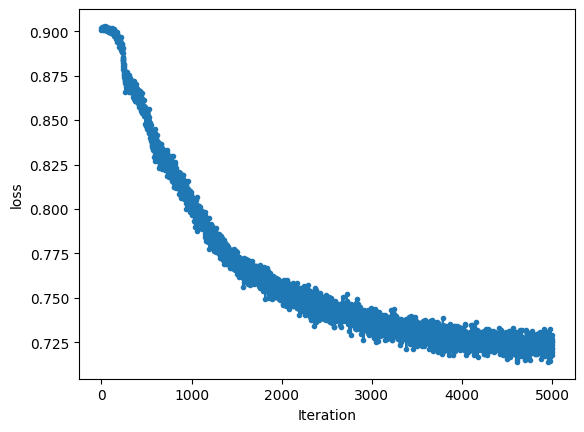

In [7]:
from cellulus.train import train
train(experiment_config)

In [8]:
dataset_config = {'container_path': name +'.zarr',
                  'dataset_name': dataset_name
                 }

In [9]:
prediction_dataset_config = {'container_path': name + '.zarr',
                             'dataset_name': 'embedding'
                            }

In [10]:
segmentation_dataset_config = {'container_path': name + '.zarr',
                               'dataset_name': 'segmentation'
                              }

In [11]:
post_processed_dataset_config = {'container_path': name + '.zarr',
                                 'dataset_name': 'post_processed_segmentation'
                                }

In [12]:
inference_config = {'dataset_config': dataset_config,
                    'prediction_dataset_config': prediction_dataset_config,
                    'segmentation_dataset_config': segmentation_dataset_config,
                    'post_processed_dataset_config': post_processed_dataset_config,
                    'device': 'mps',
                   }

In [13]:
model_config= {'num_fmaps': num_fmaps,
               'fmap_inc_factor': fmap_inc_factor,
               'checkpoint': 'models/best_loss.pth'
              }

In [14]:
from cellulus.configs.experiment_config import ExperimentConfig
experiment_config = ExperimentConfig(model_config = model_config,
                                    inference_config = inference_config)

In [15]:
from cellulus.infer import infer
infer(experiment_config)

ExperimentConfig(model_config=ModelConfig(num_fmaps=24, fmap_inc_factor=3, features_in_last_layer=64, downsampling_factors=[[2, 2]], checkpoint=PosixPath('models/best_loss.pth'), initialize=True), experiment_name='2023-10-12', object_size=26.0, train_config=None, inference_config=InferenceConfig(dataset_config=DatasetConfig(container_path=PosixPath('Fluo-N2DL-HeLa.zarr'), dataset_name='train/raw'), prediction_dataset_config=DatasetConfig(container_path=PosixPath('Fluo-N2DL-HeLa.zarr'), dataset_name='embedding'), segmentation_dataset_config=DatasetConfig(container_path=PosixPath('Fluo-N2DL-HeLa.zarr'), dataset_name='segmentation'), post_processed_dataset_config=DatasetConfig(container_path=PosixPath('Fluo-N2DL-HeLa.zarr'), dataset_name='post_processed_segmentation'), evaluation_dataset_config=None, device='mps', crop_size=[252, 252], p_salt_pepper=0.1, num_infer_iterations=16, bandwidth=None, reduction_probability=0.1, min_size=None, grow_distance=3, shrink_distance=6))


  0%|                                                                                           | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.53it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.52it/s]

  0%|                                                                                          | 0/15 [00:00<?, ?it/s]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:44, 11.57s/it]

 20%|████████████████▍                                                                 | 2/10 [00:23<01:32, 11.55s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.54s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:46<01:09, 11.55s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.50s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:08<00:45, 11.45s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.44s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:31<00:22, 11.46s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.47s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.48s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.49s/it]


  7%|█████▍                                                                           | 1/15 [01:54<26:48, 114.90s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:43, 11.47s/it]

 20%|████████████████▍                                                                 | 2/10 [00:22<01:31, 11.47s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.47s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:45<01:08, 11.49s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.49s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:08<00:45, 11.48s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.48s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:31<00:22, 11.49s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.50s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.50s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.49s/it]


 13%|██████████▊                                                                      | 2/15 [03:49<24:54, 114.93s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:44, 11.58s/it]

 20%|████████████████▍                                                                 | 2/10 [00:23<01:32, 11.59s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:21, 11.57s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:46<01:09, 11.56s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.54s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:09<00:46, 11.53s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.54s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:32<00:23, 11.54s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.52s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.51s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.53s/it]


 20%|████████████████▏                                                                | 3/15 [05:45<23:01, 115.13s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:43, 11.47s/it]

 20%|████████████████▍                                                                 | 2/10 [00:23<01:32, 11.52s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.52s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:46<01:09, 11.52s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.52s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:09<00:46, 11.54s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.54s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:32<00:23, 11.55s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.54s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.53s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.53s/it]


 27%|█████████████████████▌                                                           | 4/15 [07:40<21:07, 115.21s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:43, 11.51s/it]

 20%|████████████████▍                                                                 | 2/10 [00:23<01:32, 11.55s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.47s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:45<01:08, 11.45s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.51s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:09<00:46, 11.52s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.53s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:32<00:23, 11.53s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.53s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.53s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.52s/it]


 33%|███████████████████████████                                                      | 5/15 [09:35<19:12, 115.23s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:44, 11.58s/it]

 20%|████████████████▍                                                                 | 2/10 [00:23<01:32, 11.54s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.54s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:46<01:09, 11.53s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.54s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:09<00:46, 11.50s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.49s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:32<00:23, 11.52s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.53s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.55s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.53s/it]


 40%|████████████████████████████████▍                                                | 6/15 [11:31<17:17, 115.28s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:43, 11.55s/it]

 20%|████████████████▍                                                                 | 2/10 [00:23<01:32, 11.56s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.57s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:46<01:09, 11.56s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.58s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:09<00:46, 11.57s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.52s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:32<00:23, 11.54s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.53s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.52s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.54s/it]


 47%|█████████████████████████████████████▊                                           | 7/15 [13:26<15:22, 115.34s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:43, 11.48s/it]

 20%|████████████████▍                                                                 | 2/10 [00:22<01:31, 11.49s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.51s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:46<01:09, 11.55s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.49s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:08<00:45, 11.44s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.40s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:31<00:22, 11.37s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:42<00:11, 11.34s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.32s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.40s/it]


 53%|███████████████████████████████████████████▏                                     | 8/15 [15:20<13:24, 114.94s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:41, 11.29s/it]

 20%|████████████████▍                                                                 | 2/10 [00:22<01:30, 11.29s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:33<01:18, 11.29s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:45<01:07, 11.29s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:56<00:56, 11.28s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:07<00:45, 11.28s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:18<00:33, 11.28s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:30<00:22, 11.28s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:41<00:11, 11.28s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:52<00:00, 11.27s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:52<00:00, 11.28s/it]


 60%|████████████████████████████████████████████████▌                                | 9/15 [17:13<11:25, 114.29s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:41, 11.28s/it]

 20%|████████████████▍                                                                 | 2/10 [00:22<01:30, 11.27s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:33<01:18, 11.28s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:45<01:07, 11.28s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:56<00:56, 11.27s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:07<00:45, 11.28s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:19<00:33, 11.33s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:30<00:22, 11.38s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:42<00:11, 11.44s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:53<00:00, 11.48s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:53<00:00, 11.37s/it]


 67%|█████████████████████████████████████████████████████▎                          | 10/15 [19:07<09:30, 114.14s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:42, 11.41s/it]

 20%|████████████████▍                                                                 | 2/10 [00:22<01:31, 11.42s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:19, 11.40s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:45<01:08, 11.38s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:56<00:56, 11.38s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:08<00:45, 11.38s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:19<00:34, 11.38s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:31<00:22, 11.36s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:42<00:11, 11.36s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:53<00:00, 11.34s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:53<00:00, 11.37s/it]


 73%|██████████████████████████████████████████████████████████▋                     | 11/15 [21:01<07:36, 114.01s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:41, 11.25s/it]

 20%|████████████████▍                                                                 | 2/10 [00:22<01:30, 11.29s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:33<01:18, 11.27s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:45<01:07, 11.26s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:56<00:56, 11.25s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:07<00:45, 11.25s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:18<00:33, 11.27s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:30<00:22, 11.29s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:41<00:11, 11.38s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:53<00:00, 11.40s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:53<00:00, 11.32s/it]


 80%|████████████████████████████████████████████████████████████████                | 12/15 [22:54<05:41, 113.78s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:43, 11.47s/it]

 20%|████████████████▍                                                                 | 2/10 [00:22<01:31, 11.46s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.46s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:45<01:08, 11.50s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.50s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:08<00:45, 11.50s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.49s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:31<00:23, 11.51s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.51s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.51s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.50s/it]


 87%|█████████████████████████████████████████████████████████████████████▎          | 13/15 [24:49<03:48, 114.16s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:43, 11.55s/it]

 20%|████████████████▍                                                                 | 2/10 [00:23<01:32, 11.56s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.52s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:46<01:09, 11.53s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.51s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:09<00:45, 11.50s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.49s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:32<00:22, 11.49s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.50s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.49s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:55<00:00, 11.50s/it]


 93%|██████████████████████████████████████████████████████████████████████████▋     | 14/15 [26:44<01:54, 114.43s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 10%|████████▏                                                                         | 1/10 [00:11<01:43, 11.46s/it]

 20%|████████████████▍                                                                 | 2/10 [00:22<01:31, 11.46s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:34<01:20, 11.47s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:45<01:09, 11.50s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:57<00:57, 11.50s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [01:08<00:45, 11.49s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [01:20<00:34, 11.48s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [01:31<00:22, 11.49s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [01:43<00:11, 11.50s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.52s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.50s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [28:39<00:00, 114.61s/it]

100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [28:39<00:00, 114.63s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

/Users/lalitm/mambaforge/envs/cellulus/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
 10%|████████▏                                                                         | 1/10 [00:01<00:16,  1.87s/it]

 20%|████████████████▍                                                                 | 2/10 [00:03<00:15,  1.91s/it]

 30%|████████████████████████▌                                                         | 3/10 [00:05<00:13,  1.95s/it]

 40%|████████████████████████████████▊                                                 | 4/10 [00:07<00:12,  2.02s/it]

 50%|█████████████████████████████████████████                                         | 5/10 [00:09<00:09,  1.98s/it]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [00:11<00:08,  2.02s/it]

 70%|█████████████████████████████████████████████████████████▍                        | 7/10 [00:14<00:06,  2.08s/it]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [00:16<00:04,  2.16s/it]

 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [00:18<00:02,  2.20s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.27s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.12s/it]

  0%|                                                                                          | 0/10 [00:00<?, ?it/s]

 20%|████████████████▍                                                                 | 2/10 [00:00<00:00, 16.83it/s]

 40%|████████████████████████████████▊                                                 | 4/10 [00:00<00:00, 17.15it/s]

 60%|█████████████████████████████████████████████████▏                                | 6/10 [00:00<00:00, 17.06it/s]

 80%|█████████████████████████████████████████████████████████████████▌                | 8/10 [00:00<00:00, 16.97it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.05it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.02it/s]

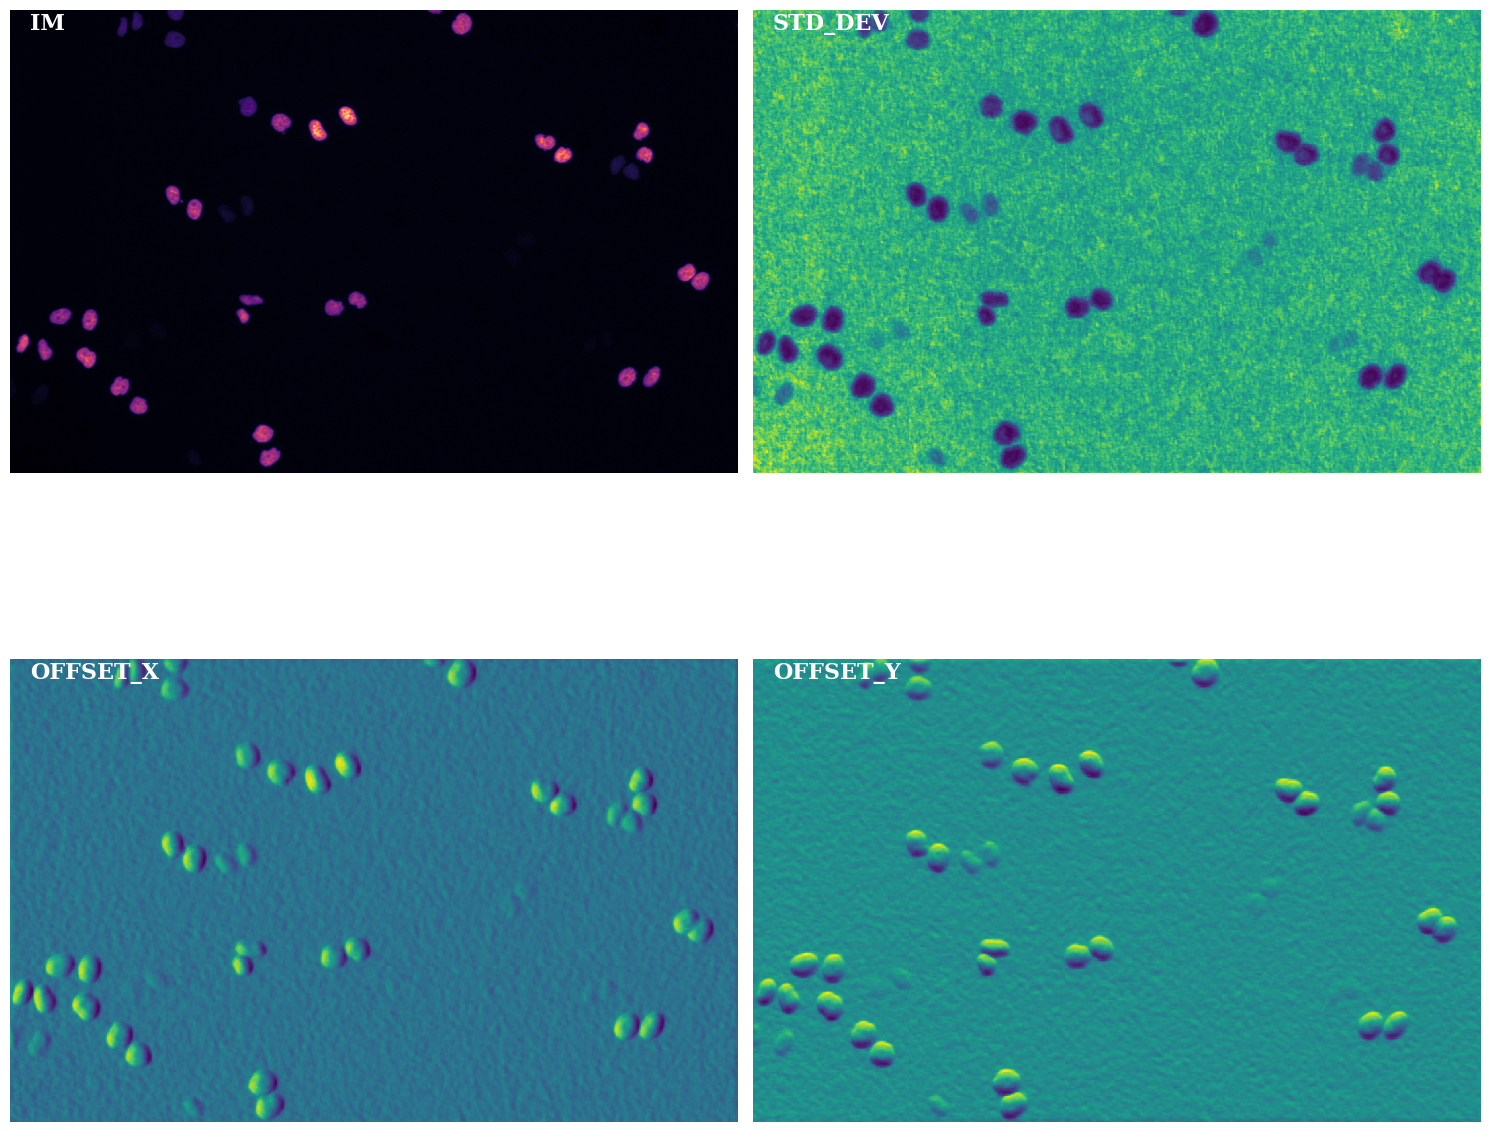

In [16]:
from cellulus.utils.misc import visualize_2d

index = 0

f = zarr.open(name+ '.zarr')
ds = f['train/raw']
ds2 = f['embedding']

image = ds[index, 0]
embedding = ds2[index]

visualize_2d(image, top_right = embedding[-1], bottom_left=embedding[0], bottom_right=embedding[1],
            top_right_label = "STD_DEV", bottom_left_label="OFFSET_X", bottom_right_label="OFFSET_Y")

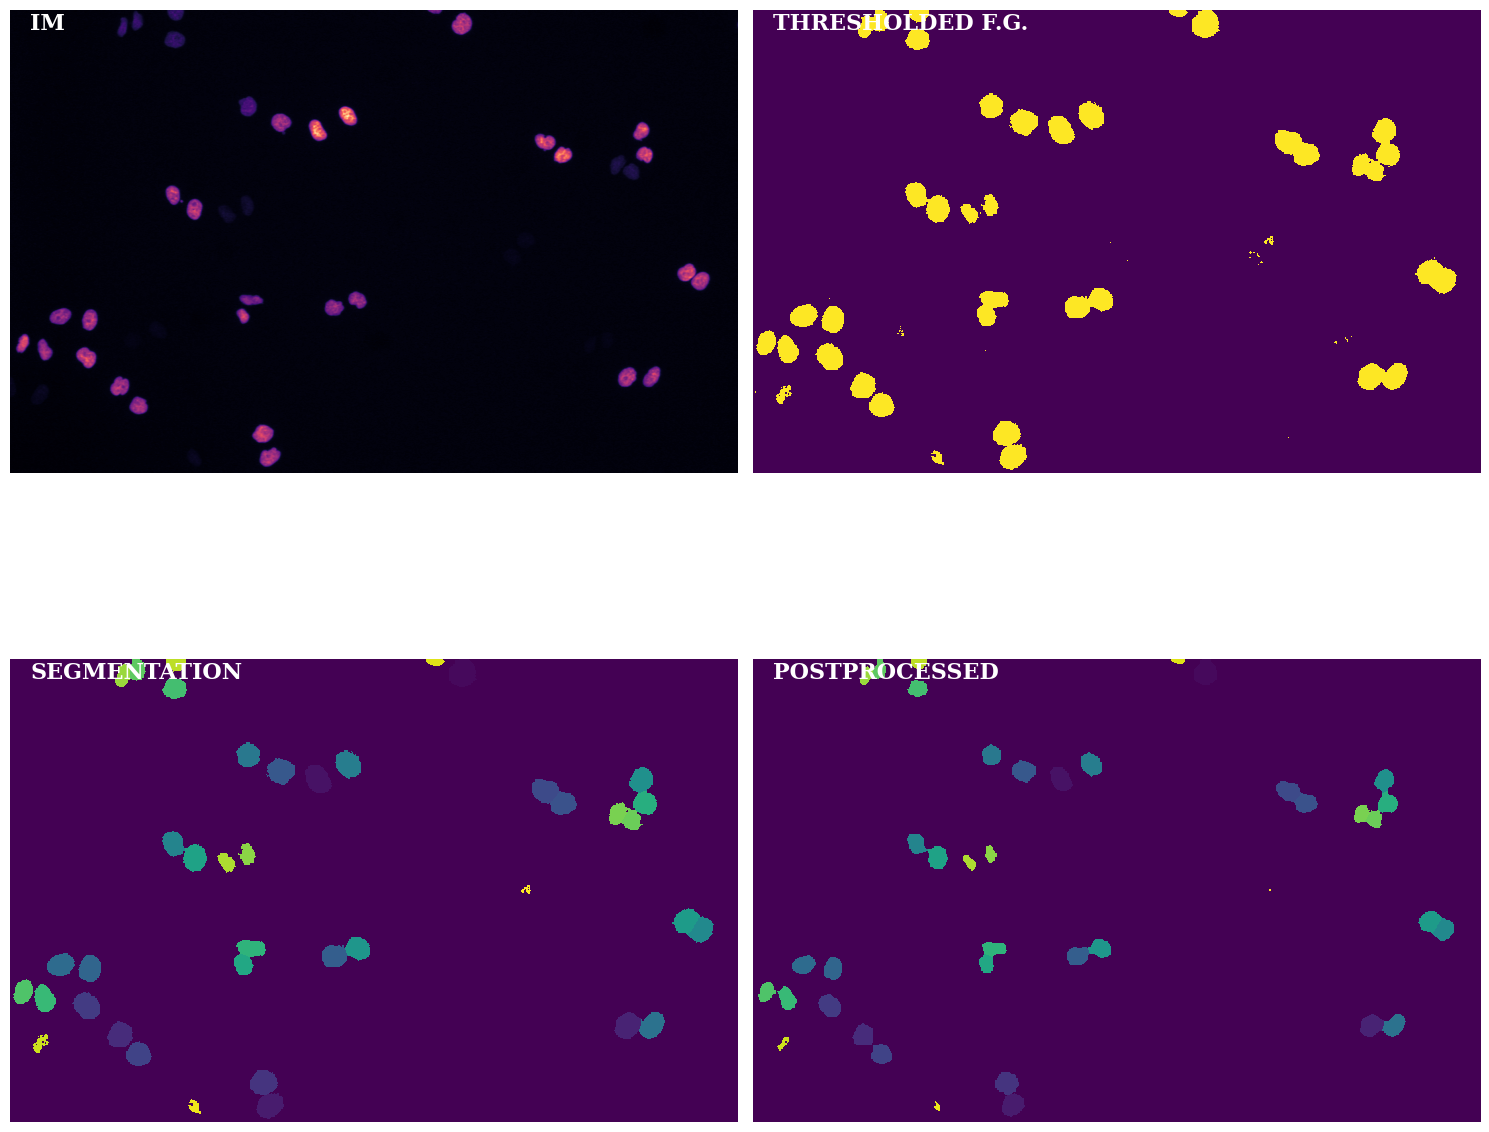

In [17]:
from cellulus.utils.misc import visualize_2d
import skimage

index = 0

f = zarr.open(name+ '.zarr')
ds = f['train/raw']
ds2 = f['segmentation']
ds3 = f['post_processed_segmentation']

visualize_2d(image, top_right = embedding[-1] < skimage.filters.threshold_otsu(embedding[-1]),
            bottom_left = ds2[0, 0], bottom_right = ds3[0, 0],
            top_right_label = "THRESHOLDED F.G.", bottom_left_label="SEGMENTATION",
            bottom_right_label="POSTPROCESSED")